In [2]:
# import packages
import glob
from pathlib import Path
import scipy.stats
import os
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pathos.threading import ThreadPool as Pool
from scipy.stats import gaussian_kde
import xarray as xr
from matplotlib import cm
from textwrap import wrap
import matplotlib
from collections import Counter

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from f_sr_calculation import *

In [5]:
# work_dir=Path("/scratch/fransjevanoors/global_sr")
work_dir=Path("/mnt/u/LSM root zone/global_sr")
fig_dir=Path('/mnt/c/Users/fransjevanoors/surfdrive - Fransje van Oorschot@surfdrive.surf.nl/Fransje/global_SR/irrigation_paper/figures')

In [6]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [7]:
#colors
a = 255/255
b = 220/255
c = 201/255
d = 133/255
e = 85/255
f = 70/255
g = 46/255

c1 = (e,0,0)
c2 = (c,0,0)
c3 = (a,g,0)
c4 = (a,d,0)
c5 = (a,b,0)
c6 = (a,a,f)
c7 = (f,a,a)
c8 = (0,b,a)
c9 = (0,d,a)
c10 = (0,g,a)
c11 = (0,0,c)
c12 = (0,0,e)

colors=[c12,c11,c10,c9,c8,c7,c6,c5,c4,c3,c2,c1]
cm_col = ListedColormap(colors)

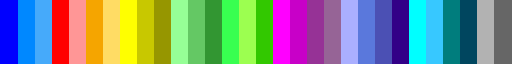

In [8]:
c1= [0/255,0/255,255/255]
c2= [0/255, 120,255/255]
c3= [70/255, 170/255, 250/255]
c4= [255/255,0/255,0/255]
c5= [255/255, 150/255, 150/255]
c6= [245/255, 165/255,0/255]
c7= [255/255, 220/255, 100/255]
c8= [255/255,255/255,0/255]
c9= [200/255, 200/255,0/255]
c10= [150/255, 150/255,0/255]
c11= [150/255,255/255, 150/255]
c12= [100/255, 200/255, 100/255]
c13= [50/255, 150/255 ,50/255]
c14= [200,255/255, 80/255]
c15= [100,255/255, 80/255]
c16= [50/255, 200/255,0/255]
c17= [255/255,0/255,255/255]
c18= [200/255,0/255 ,200/255]
c19= [150/255, 50/255 ,150/255]
c20= [150/255, 100/255 ,150/255]
c21= [170/255, 175/255 ,255/255]
c22= [90/255, 120/255 ,220/255]
c23= [75/255, 80/255, 180/255]
c24= [50/255 ,0/255, 135/255]
c25= [0/255 ,255/255,255/255]
c26= [55/255 ,200/255,255/255]
c27= [0/255 ,125/255, 125/255]
c28= [0/255, 70/255, 95/255]
c29= [178/255 ,178/255, 178/255]
c30= [102/255, 102/255, 102/255]

colors=[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30]
cm_kg = ListedColormap(colors)
cm_kg

In [9]:
c1 = '#4059AD'
c2 = '#6B9AC4'
c3 = '#F4B942'
c4 = '#97D8C4'

c1 = '#D81B60'
c2 = '#1E88E5'
c3 = '#FFC107'

In [10]:
from matplotlib.colors import LinearSegmentedColormap
colors2 =['white','white','white']
cmap_white = LinearSegmentedColormap.from_list('cm',colors2, N=3)
colors =['gainsboro','none']
cmap_grey2 = LinearSegmentedColormap.from_list('cm',colors, N=2)
colors =['gainsboro','gainsboro','gainsboro']
cmap_grey = LinearSegmentedColormap.from_list('cm',colors, N=3)

colors =['whitesmoke','whitesmoke','whitesmoke']
cmap_whitesmoke = LinearSegmentedColormap.from_list('cm',colors, N=3)

In [11]:
def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

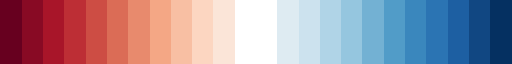

In [12]:
cmap = cm.get_cmap('RdBu', 24)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list[11] = '#ffffff'
color_list[12] = '#ffffff'
cmap_rdbu = ListedColormap(color_list)
cmap_rdbu

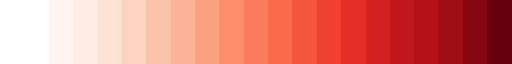

In [13]:
cmap = cm.get_cmap('Reds', 19)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []
color_list2.append('#ffffff')
color_list2.append('#ffffff')
for i in range(19):
    color_list2.append(color_list[i])
cmap_rd = ListedColormap(color_list2)
cmap_rd

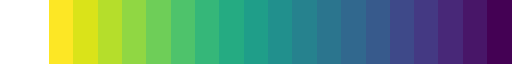

In [14]:
cmap = cm.get_cmap('viridis_r', 19)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []
color_list2.append('#ffffff')
color_list2.append('#ffffff')
for i in range(19):
    color_list2.append(color_list[i])
cmap_vd = ListedColormap(color_list2)
cmap_vd

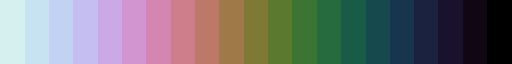

In [15]:
cmap = cm.get_cmap('cubehelix_r', 23)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []
# color_list2.append('#ffffff')
# color_list2.append('#ffffff')
for i in np.arange(2,23,1):
    color_list2.append(color_list[i])
cmap_ch = ListedColormap(color_list2)
cmap_ch

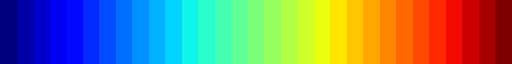

In [16]:
cmap_cv = cm.get_cmap('cividis_r', 19)
cmap_wi = cm.get_cmap('winter', 21)
cmap_cp = cm.get_cmap('copper', 21)
cmap_vd2 = cm.get_cmap('viridis_r', 21)
cmap_jet2 = cm.get_cmap('jet', 31)
cmap_jet2

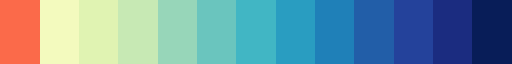

In [17]:
cmap = cm.get_cmap('YlGnBu', 13)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []
color_list2.append('#fb6a4a')
# color_list2.append('#fdcab5')

for i in range(12):
    color_list2.append(color_list[i+1])
cmap_srdiff = ListedColormap(color_list2)
# cmap_rd = cm.get_cmap('YlGnBu', 11)
cmap_srdiff


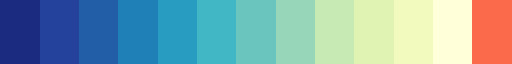

In [18]:
cmap = cm.get_cmap('YlGnBu_r', 13)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
color_list2 = []

# color_list2.append('#fdcab5')

for i in range(12):
    color_list2.append(color_list[i+1])
color_list2.append('#fb6a4a')
cmap_srdiff = ListedColormap(color_list2)
# cmap_rd = cm.get_cmap('YlGnBu', 11)
cmap_srdiff

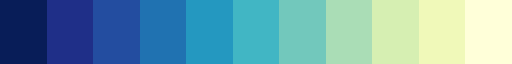

In [19]:
cmap_ylgnbu = cm.get_cmap('YlGnBu_r', 11)
cmap_ylgnbu

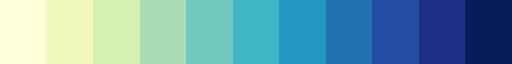

In [20]:
cmap_ylgnbu = cm.get_cmap('YlGnBu', 11)
cmap_ylgnbu

In [21]:
colors =['white','white','white']
cmap_grey = LinearSegmentedColormap.from_list('cm',colors, N=3)

In [22]:
ca0='br_0002791'
ca1='us_0006399'
ca5='es_0000742'
ca10='in_0000134'

In [23]:
#Europe
lat_min_e, lat_max_e = 35,63
lon_min_e, lon_max_e = -12,18

#Asia
lat_min_a, lat_max_a = -11,26
lon_min_a, lon_max_a = 65,120

#us
lat_min_u, lat_max_u = 20,55
lon_min_u, lon_max_u = -130,-70

#south america
lat_min_s, lat_max_s = -33,-4
lon_min_s, lon_max_s = -58,-32

## GRIDDED MAP IA AND IWU

In [23]:
iwu = xr.open_dataset(f'{work_dir}/data/IWU_irri_data/IWU_2011_2018_setyear.nc')

In [24]:
# from monthly mean values to mm/day and mm/year
dm = [31,28,31,30,31,30,31,31,30,31,30,31]
dm = dm*8

l=[]
for i in range(len(iwu.time)):
    p = iwu.IWUens[i,:,:]/dm[i]
    l.append(p)
iwu2 = xr.concat(l,dim='time')

iwu2m = iwu2.mean(dim='time')*365

KeyboardInterrupt: 

In [ ]:
iwu2m = iwu2m.transpose("lat", "lon")

In [ ]:
# from cmcrameri import cm
# cmapv = cm.lajolla_r

In [ ]:
lvls = np.linspace(0,100,11) 
lvls2 = np.linspace(0,100,11) 
cmapv = plt.cm.viridis_r  # define the colormap

z = iwu2m.where(iwu2m==0)

# fig with stats
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
cf = iwu2m.plot(ax=ax, cmap=cmapv, add_colorbar=False, vmin=0, vmax=5, levels=lvls)#plot all points
cf3 = z.plot(ax=ax, cmap=cmap_grey, add_colorbar=False, vmin=0, vmax=5, levels=[0,1])
cbar = plt.colorbar(cf, orientation='horizontal',extend='max', pad=0.02, ticks=lvls2,aspect=30)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_xticklabels(['>0','10','20','30','40','50','60','70','80','90','100'])
cbar.set_label(label='$I_\mathrm{w}$ ($\mathrm{mm}$ $\mathrm{year}^{-1}$)', size=14)
ax.set_title(f'',size=14)
ax.set_ylim(-60,90)
ax.set_xlim(-180,180)
fig.savefig(f'{fig_dir}/map_mean_iwu_gridded.jpg',dpi=300,bbox_inches='tight')


In [ ]:
ia = xr.open_dataset(f'{work_dir}/data/irrigated_area/AEI_HYDE_FINAL_IR_2005_fraction.nc')
ia = ia.AEI_HYDE_FINAL_IR_2005[0,:,:]
ia

In [ ]:
lvls = np.linspace(0,0.5,11) 
lvls2 = np.linspace(0,0.5,11) 
cmapv = plt.cm.viridis_r  # define the colormap

z = ia.where(ia==0)

# fig with stats
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
cf = ia.plot(ax=ax, cmap=cmapv, add_colorbar=False, vmin=0, vmax=5, levels=lvls)#plot all points
cf3 = z.plot(ax=ax, cmap=cmap_grey, add_colorbar=False, vmin=0, vmax=5, levels=[0,1])
cbar = plt.colorbar(cf, orientation='horizontal',extend='max', pad=0.02, ticks=lvls2,aspect=30)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_xticklabels(['>0','0.05','0.10','0.15','0.20','0.25','0.30','0.35','0.40','0.45','0.50'])
cbar.set_label(label='$I_\mathrm{a}$ (-)', size=14)
ax.set_title(f'',size=12)
ax.set_ylim(-60,90)
ax.set_xlim(-180,180)
fig.savefig(f'{fig_dir}/map_mean_ia_gridded.jpg',dpi=300,bbox_inches='tight')

## Method figure

In [ ]:
# catch_id = 'in_0000134'
# catch_id = 'de_0000251'
catch_id = 'de_0000055'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f1.85ia/sd/{catch_id}_f1.85ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)

# se_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/se/{catch_id}.csv',index_col=0)
se_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/se/{catch_id}_fiwu2.csv',index_col=0)
# se_f0.index = pd.to_datetime(sd_f0.index)
se_fiwu.index = pd.to_datetime(se_fiwu.index)

In [ ]:
sd_fiwu2 = sd_fiwu.loc['1990-09-01':'1993-03-31']
sd_fiwu3 = sd_fiwu.loc['1990-09-01':'1993-03-31']
# sd_fiwu2 = sd_fiwu.loc['2005-01-01':'2006-12-31']
sd_fiwu2.index = pd.to_datetime(sd_fiwu2.index)
b1 = sd_fiwu.loc['2004-11-19':'2005-12-15'].se2.cumsum()
b2 = sd_fiwu.loc['2005-12-15':'2006-12-29'].se2.cumsum()
b3 = sd_fiwu.loc['2006-12-29':'2007-02-28'].se2.cumsum()
b4 = pd.concat([b1,b2,b3])
# b.index = b['index']
# b.loc['2005-12-15':'2005-12-31'].se2 = [b.loc['2005-06-30'].values[1]]*17
# b.se2.plot()

sd_fiwu.p_irri.loc['1990-09-10':'1990-09-30']= np.zeros(21)

# add irrigation Ss decline in Se-cum variable for the two irrigation periods
sd_fiwu4 = sd_fiwu3.loc['1991-02-16':'1991-12-17']
ini = sd_fiwu4.loc['1991-02-16'].se_cum
rate = sd_fiwu4.loc['1991-02-18'].p_irri
se_cum2=np.zeros(len(sd_fiwu4))
for i in range(len(sd_fiwu4)-1):
    se_cum2[i] = ini - i*rate
len(se_cum2)
sd_fiwu4['se_cum2'] = se_cum2
sd_fiwu3['se_cum2'] = sd_fiwu3['se_cum']
sd_fiwu3.loc['1991-02-16':'1991-12-17']['se_cum2'] = sd_fiwu4['se_cum2']

sd_fiwu5 = sd_fiwu3.loc['1992-04-25':'1992-11-10']
ini = sd_fiwu5.loc['1992-04-25'].se_cum
rate = sd_fiwu5.loc['1992-04-27'].p_irri
se_cum2=np.zeros(len(sd_fiwu5))
for i in range(len(sd_fiwu5)-2):
    se_cum2[i] = ini - i*rate
len(se_cum2)
sd_fiwu5['se_cum2'] = se_cum2
sd_fiwu3.loc['1992-04-26':'1992-11-10']['se_cum2'] = sd_fiwu5['se_cum2']


fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.hlines(0,pd.to_datetime('1990-09-15'),pd.to_datetime('1993-02-01'),color='k',linestyle=':',linewidth=0.7)
ax.vlines(pd.to_datetime('1992-04-26'),-400,400,color='k',linestyle='--',linewidth=1)
ax.vlines(pd.to_datetime('1992-11-10'),-400,400,color='k',linestyle='--',linewidth=1)
ax.vlines(pd.to_datetime('1991-02-16'),-400,400,color='k',linestyle='--',linewidth=1)
ax.vlines(pd.to_datetime('1991-12-17'),-400,400,color='k',linestyle='--',linewidth=1)
# ax.plot(sd_fiwu.index,sd_fiwu.se2, label='$S_{\mathrm{s}$')
# ax.plot(b1.index, b1, color='tab:blue',linewidth=2.5, label='$S_{\mathrm{s}}$')
# ax.plot(b2.index, b2, color='tab:blue',linewidth=2.5)
# ax.plot(b3.index, b3, color='tab:blue',linewidth=2.5)
# ax.plot(b4.index, b4, color=c1, linewidth=2.5, label='$S_{\mathrm{s}}$')
ax.plot(sd_fiwu3.index,sd_fiwu3['se_cum2'], color=c2, linewidth=2.5, label='$S_{\mathrm{s}}$')
ax.plot(sd_fiwu.index,sd_fiwu.Sd, color=c3, linewidth=2.5,label='$S_{\mathrm{d}}$')
ax2.plot(sd_fiwu2.index,sd_fiwu2.p_irri, color=c1, linewidth=2.5,label='$I$')

ax.set_yticks([-200,-100,0,100,200,300])
ax.set_yticklabels([200,100,0,100,200,300])
    # 50,100,150,200,250,0,-50,-100,-150,-200,-250])
# ax2.set_yticks([0,50,100,150,200,250])
ax.set_ylim(-250,370)
ax2.set_ylim(0,1)
# ax.set_xlim(pd.to_datetime('1988-11-25'),pd.to_datetime('1990-12-15'))
ax.set_xlim(pd.to_datetime('1990-09-15'),pd.to_datetime('1993-02-01'))
ax.set_xticks(['1991-01-01','1991-07-01','1992-01-01','1992-07-01','1993-01-01'])
ax.set_xticklabels(['1991-01','','1992-01','','1993-01'])

# ax.text('1991-01-08',-85,'$t_{\mathrm{d},0}$',size=14,rotation=90)
# ax.text('1991-01-08',55,'$t_{\mathrm{s},1}$',size=14,rotation=90)
# ax.text('1991-11-05',-85,'$t_{\mathrm{d},1}$',size=14,rotation=90)
# ax.text('1991-11-05',55,'$t_{\mathrm{s},0}$',size=14,rotation=90)
# ax.text('1992-03-15',-85,'$t_{\mathrm{d},0}$',size=14,rotation=90)
# ax.text('1992-03-15',55,'$t_{\mathrm{s},1}$',size=14,rotation=90)
# ax.text('1992-09-25',-85,'$t_{\mathrm{d},1}$',size=14,rotation=90)
# ax.text('1992-09-25',55,'$t_{\mathrm{s},0}$',size=14,rotation=90)
# ax.text('1992-09-25',55,'$t_{\mathrm{s},0}$',size=14,rotation=90)

ax.text('1990-04-08',105,'$S_\mathrm{s}$ (mm)',size=14,rotation=90)
ax.text('1990-04-08',-240,'$S_\mathrm{d}$ (mm)',size=14,rotation=90)
ax.annotate('', xy=(-0.16,0.54), xycoords='axes fraction', xytext=(-0.16,0.43),arrowprops=dict(arrowstyle="->", color='k'))
ax.annotate('', xy=(-0.16,0.38), xycoords='axes fraction', xytext=(-0.16,0.27),arrowprops=dict(arrowstyle="<-", color='k'))
ax.annotate('', xy=(-0.185,0.405), xycoords='axes fraction', xytext=(-0.135,0.405),arrowprops=dict(arrowstyle="-", color='k'))
# ax.set_ylabel('Storage (mm)', size=14)
ax2.set_ylabel('$I$ ($\mathrm{mm}$ $\mathrm{day}^{-1}$)', size=14)
ax.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax.legend(ncol=2, fontsize=15,loc='upper left')
ax2.legend(ncol=1, fontsize=15,loc='upper right')
fig.savefig(f'{fig_dir}/sd_ss_timeseries_zoom.jpg',dpi=200,bbox_inches='tight')

## optimization of beta

In [25]:
df = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
d = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f_optimization2.csv',index_col=0)

In [26]:
# MINIMIZE ABSOLUTE ERROR
f_min=0
f_max=4
nmax=10000
b = np.linspace(0,2.5,1000)
A=np.zeros((len(b),8))

for n in range(1,len(b)+1):
    f = b[n-1]
    o = f*d['ia']
    er = o-d['fiwu']
    er_m = er.mean()
    er_mse = np.mean(er**2)
    er_mae = np.mean(np.abs(er))
    er_std =er.std()
    er_med = er.median()
    er_iqr =er.quantile(0.75) - er.quantile(0.25)
    er_rmse = np.sqrt(np.mean((o-d['fiwu'])**2))
    
    A[n-1,:] = [f,er_m,er_mse,er_mae,er_std,er_med,er_iqr,er_rmse]

ind=find_nearest(A[:,1],0)
fopt_mean=np.round(A[ind,0],3)
    
ind=np.argmin(A[:,2],0)
fopt_mse=np.round(A[ind,0],3)

ind=np.argmin(A[:,3],0)
fopt_mae=np.round(A[ind,0],3)

ind=np.argmin(A[:,4])
fopt_std=np.round(A[ind,0],3)

ind=find_nearest(A[:,5],0)
fopt_median=np.round(A[ind,0],3)

ind=np.argmin(A[:,6])
fopt_iqr=np.round(A[ind,0],3)

ind=np.argmin(A[:,7])
fopt_rmse=np.round(A[ind,0],3)

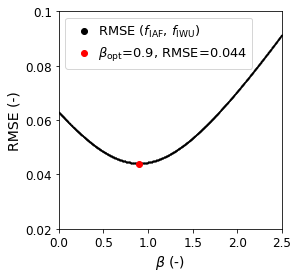

In [29]:
# RMSE figure optimization
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(A[:,0], A[:,7],'o',color='k',markersize=0.5)
ax.plot(1,1,'o',color='k',markersize=6,label=r'RMSE ($f_{\mathrm{IAF}}$, $f_{\mathrm{IWU}}$)')
ax.plot(fopt_rmse,0.044,'o',color='r',markersize=6,label=r'$\beta_{\mathrm{opt}}$='+str(np.round(fopt_rmse,1))+', RMSE=0.044')
ax.set_xlim(0,2.5)
ax.set_ylim(0.02,0.10)
ax.set_yticks([0.02,0.04,0.06,0.08,0.10])
ax.set_yticklabels([0.02,0.04,0.06,0.08,0.10],size=12)
ax.set_xticklabels([0.0,0.5,1.0,1.5,2.0,2.5],size=12)
ax.set_xlabel(r'$\beta$ (-)',fontsize=14)
ax.set_ylabel('RMSE (-)',fontsize=14)
# ax.set_title('min(RMSE) for $f_{\mathrm{i,opt}}$='+str(fopt_rmse),size=14)
ax.legend(fontsize=13,loc='upper left',handletextpad=0.1)
fig.savefig(f'{fig_dir}/monte_carlo_rmse.jpg',dpi=300,bbox_inches='tight')

In [28]:
b=0.9
f = b
o = f*d['ia']
er = o-d['fiwu']
er_m = er.mean()
er_mse = np.mean(er**2)
er_mae = np.mean(np.abs(er))
er_std =er.std()
er_med = er.median()
er_iqr =er.quantile(0.75) - er.quantile(0.25)
er_rmse = np.sqrt(np.mean((o-d['fiwu'])**2))

In [ ]:
d['er'] = er
d

In [ ]:
d[['ia','er']].boxplot()

In [ ]:
plt.plot(d.ia, d.er,'mo',markersize=2)

In [ ]:
cz = pd.read_csv(f'{work_dir}/data/koppen_climates/all_catch_table_kg_climates.csv',index_col=0)
cz['cl'] = np.zeros(len(cz))
# tropical
ix = cz[(cz['kg']=='Af')|(cz['kg']=='Aw')|(cz['kg']=='Am')].index
cz.loc[ix,'cl'] = 1

# arid
ix = cz[(cz['kg']=='BWh')|(cz['kg']=='BWk')|(cz['kg']=='BSh')|(cz['kg']=='BSk')].index
cz.loc[ix,'cl'] = 2

# mediterranean
ix = cz[(cz['kg']=='Csa')|(cz['kg']=='Csb')|(cz['kg']=='Csc')].index
cz.loc[ix,'cl'] = 3

# temperate
ix = cz[(cz['kg']=='Cfa')|(cz['kg']=='Cfb')|(cz['kg']=='Cfc')].index
cz.loc[ix,'cl'] = 4

# continental
ix = cz[(cz['kg']=='Dfa')|(cz['kg']=='Dfb')|(cz['kg']=='Dfc')|(cz['kg']=='Dfd')].index
cz.loc[ix,'cl'] = 5

d['cl'] = cz['cl']
d

In [ ]:
colors=['green','tomato','goldenrod','dodgerblue','darkviolet']
cm_cl = ListedColormap(colors)
bounds = np.linspace(1,6,6)
bounds2 = np.linspace(1,6,6)
norm = mpl.colors.BoundaryNorm(bounds, cm_cl.N)
d = d[d.ia>0.05]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
s = ax.scatter(d.ia,d.er,c=d.cl,s=8,cmap=cm_cl, norm=norm)
cbar = plt.colorbar(s, orientation='vertical',spacing='proportional',extend='neither', pad=0.02, norm=norm,ticks=bounds2,aspect=30)
cbar.set_ticks(np.arange(1.5,6.5,1))
cbar.set_ticklabels(['Tropical','Arid','Mediterranean','Temperate','Continental'],rotation=0,size=10)
ax.set_xlabel('Ia')
ax.set_ylabel('fiaf - fiwu')

In [ ]:
d

In [ ]:
t1,t2 = 'lightgreen','darkgreen'
boxpropst1 = dict(facecolor=t1,color="black",linewidth=0.8)
boxpropst2 = dict(facecolor=t2,color="black",linewidth=0.8)

t1,t2 = 'tomato','darkred'
boxpropsa1 = dict(facecolor=t1,color="black",linewidth=0.8)
boxpropsa2 = dict(facecolor=t2,color="black",linewidth=0.8)

t1,t2 = 'khaki','darkgoldenrod'
boxpropsm1 = dict(facecolor=t1,color="black",linewidth=0.8)
boxpropsm2 = dict(facecolor=t2,color="black",linewidth=0.8)

t1,t2 = 'lightblue','mediumblue'
boxpropstm1 = dict(facecolor=t1,color="black",linewidth=0.8)
boxpropstm2 = dict(facecolor=t2,color="black",linewidth=0.8)

t1,t2 = 'pink','mediumvioletred'
boxpropsc1 = dict(facecolor=t1,color="black",linewidth=0.8)
boxpropsc2 = dict(facecolor=t2,color="black",linewidth=0.8)

# d['er'] = (o-d['fiwu'])/d['fiwu']

medianprops = dict(color="black",linewidth=1.5)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

d = d[d.ia>0.05]
dtr = d[d.cl==1]
da = d[d.cl==2]
dm = d[d.cl==3]
dtm = d[d.cl==4]
dc = d[d.cl==5]

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.boxplot(dtr['er'],positions=[1.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxpropst1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(da['er'],positions=[2.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxpropsa1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(dm['er'],positions=[3.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxpropsm1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(dtm['er'],positions=[4.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxpropstm1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(dc['er'],positions=[5.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxpropsc1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.hlines(0,0,6,color='k',linestyle=':',linewidth=0.7)
ax.set_xlim(0.5,5.5)
# ax.set_ylim(-2.5,10)
ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(['Tropical','Arid','Mediterranean','Temperate','Continental'],size=16)
ax.set_ylabel('f-IAF - f-IWU',size=16)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(231)
ax.plot(dtr['fiwu'],0.9*dtr['ia'],'o',markersize=3,label='tropical',color='green')
ax.plot(da['fiwu'],0.9*da['ia'],'o',markersize=3,label='arid',color='red')
ax.plot(dm['fiwu'],0.9*dm['ia'],'o',markersize=3,label='mediterranean',color='yellow')
ax.plot(dtm['fiwu'],0.9*dtm['ia'],'o',markersize=3,label='temperate',color='blue')
ax.plot(dc['fiwu'],0.9*dc['ia'],'o',markersize=3,label='continental',color='magenta')
ax.plot([0,1],[0,1],'k--')
ax.set_xlim(-0.05,0.8)
ax.set_ylim(-0.05,0.8)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('f-IAF',size=16)
ax.legend()

ax = fig.add_subplot(232)
ax.plot(dtr['fiwu'],0.9*dtr['ia'],'o',markersize=3,label='tropical',color='green')
ax.plot([0,1],[0,1],'k--')
ax.set_xlim(-0.05,0.8)
ax.set_ylim(-0.05,0.8)
ax.tick_params(axis='both', which='major', labelsize=16)

ax = fig.add_subplot(233)
ax.plot(da['fiwu'],0.9*da['ia'],'o',markersize=3,label='arid',color='red')
ax.plot([0,1],[0,1],'k--')
ax.set_xlim(-0.05,0.8)
ax.set_ylim(-0.05,0.8)
ax.tick_params(axis='both', which='major', labelsize=16)

ax = fig.add_subplot(234)
ax.plot(dm['fiwu'],0.9*dm['ia'],'o',markersize=3,label='mediterranean',color='yellow')
ax.plot([0,1],[0,1],'k--')
ax.set_xlim(-0.05,0.8)
ax.set_ylim(-0.05,0.8)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('f-IAF',size=16)
ax.set_xlabel('f-IWU',size=16)

ax = fig.add_subplot(235)
ax.plot(dtm['fiwu'],0.9*dtm['ia'],'o',markersize=3,label='temperate',color='blue')
ax.plot([0,1],[0,1],'k--')
ax.set_xlim(-0.05,0.8)
ax.set_ylim(-0.05,0.8)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('f-IWU',size=16)

ax = fig.add_subplot(236)
ax.plot(dc['fiwu'],0.9*dc['ia'],'o',markersize=3,label='continental',color='magenta')
ax.plot([0,1],[0,1],'k--')
ax.set_xlim(-0.05,0.8)
ax.set_ylim(-0.05,0.8)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('f-IWU',size=16)

In [ ]:
dtr

## Sd TIMESERIES

In [ ]:
def plot_sd_timeseries(catch_id,region):
    sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
    sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
    sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
    sd_f0.index = pd.to_datetime(sd_f0.index)
    sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
    sd_fopt.index = pd.to_datetime(sd_fopt.index)    
   
    sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
    sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
    sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

    sr_df = pd.DataFrame(index=sr_df_ni.index)
    sr_f0 = int(sr_df_ni['k3'].loc[catch_id])
    sr_fiwu = int(sr_df_fiwu2['k3'].loc[catch_id])
    sr_fopt = int(sr_df_f09ia['k3'].loc[catch_id])
    
    iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed2/monthly_mean/{catch_id}.csv',index_col=0) # read iwu data
    iwu_mean = np.int(iwu.mean().values[0]*365) # annual mean IWU
    ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) #read ia data
    ir_area = np.round(ir2.loc[catch_id].hi,3) # irrigated area fraction 

    fig = plt.figure(figsize=(18,4))
    ax = fig.add_subplot(111)
    ax.plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='-', label='$S_\mathrm{d}$-NI, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
    # ax.plot(sd_fiwu.index,sd_fiwu.sd2, color=c3, label='$S_\mathrm{d}$-IWU, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=1.5)
    ax.plot(sd_fopt.index,sd_fopt.sd2, color=c2, label='$S_\mathrm{d}$-IA, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=1.5)
    ax.set_xlim(sd_f0.index[0],sd_f0.index[-10])
    ax.set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
    ax.tick_params(axis='both', labelsize=15)
    ax.legend(ncol=3, fontsize=16, loc='lower left')
    ax.set_title('Catchment ID: '+str(region)+', $\mathrm{IWU}_{\mathrm{mean}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$, IA = '+str(ir_area),size=16)
    
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    ca = catch_id
    d1 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{ca}_points.csv',index_col=0)
    d2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{ca}_fiwu2_points.csv',index_col=0)
    d3 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{ca}_f0.9ia_points.csv',index_col=0)
    ax.vlines(2,-350,350,'k',linestyle='--',linewidth=0.8)
    ax.hlines(0,0,30,color='k',linestyle=':',linewidth=0.7)
    ax.plot(d1['T'], d1['sd']*-1,'x',color='k', markersize=7,markeredgewidth=1.3, label='NI')
    ax.plot(d2['T'], d2['sd']*-1,'x',color=c3, markersize=7,markeredgewidth=1.3, label='IWU')
    ax.plot(d3['T'], d3['sd']*-1,'x',color=c2, markersize=7,markeredgewidth=1.3, label='IAF')
    ax.set_ylim(-350,40)
    ax.set_ylabel('$S_\mathrm{d,M}$ (mm)', size=15)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xscale('log')
    ax.set_xlim(0,30)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.legend(loc='best',framealpha=0.5,fontsize=16)
    # fig.savefig(f'{fig_dir}/timeseries_sd_{catch_id}.jpg', dpi=300, bbox_inches='tight')


In [ ]:
ca0='br_0002356'
ca1='ca_0000689'
ca2='es_0000742'
ca3='in_0000252'

In [ ]:
# c2 = '#D81B60'
# c3 = '#39B185'

# c2 = '#003366'
# c3 = '#E31B23'
c2= '#00A4CCFF'
c3 = '#F95700FF'

In [ ]:
# plot timeseries catchments in subplots
cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
ai = cc.ai

#South-America
catch_id = ca0
region = f'{catch_id} (South-America)'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)    

sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points2.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_f0 = int(sr_df_ni['k3'].loc[catch_id])
sr_fiwu = int(sr_df_fiwu2['k3'].loc[catch_id])
sr_fopt = int(sr_df_f09ia['k3'].loc[catch_id])

iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed2/monthly_mean/{catch_id}.csv',index_col=0) # read iwu data
iwu_mean = np.round((iwu.mean().values[0]*365),1) # annual mean IWU
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) #read ia data
ir_area = np.round(ir2.loc[catch_id].hi,3) # irrigated area fraction 

fig, ax = plt.subplots(nrows=4,ncols=2,figsize=(18,16),gridspec_kw={'width_ratios': [4, 1],'hspace': 0.2,'wspace':0.02})
# plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})
# fig = plt.figure(figsize=(14,20))
# ax = fig.add_subplot(421)
# plt.subplots()
# plt.subplots_adjust(hspace=0.32)
ax[0,0].plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='-', label='NI, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
ax[0,0].plot(sd_fiwu.index,sd_fiwu.sd2, color=c3, label='IWU, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=1.5)
ax[0,0].plot(sd_fopt.index,sd_fopt.sd2, color=c2, label='IAF, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=1.5)
ax[0,0].hlines(0,sd_f0.index[0],sd_f0.index[-10],color='k',linestyle=':',linewidth=0.7)
ax[0,0].set_xlim(sd_f0.index[0],sd_f0.index[-10])
ax[0,0].annotate('(a)',(sd_f0.index[0]+timedelta(days=10),6),size=16)
ax[0,0].set_ylim(-200,20)
ax[0,0].set_yticks([-150,-100,-50,0])
ax[0,0].set_yticklabels([150,100,50,0])
ax[0,0].set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
ax[0,0].tick_params(axis='both', labelsize=15)
ax[0,0].legend(ncol=3, fontsize=16, loc='lower left')
textstr = '\n'.join((
    '$I_\mathrm{a}$ = '+str(ir_area),
    ' $\overline{I_\mathrm{w}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$'))
props = dict(boxstyle='round', facecolor='white', alpha=0.5, linewidth=0.3)
ax[0,0].text('2000-02-01', -133, textstr, fontsize=16,verticalalignment='top', bbox=props)

# plt.figtext(0.5, 0.89, 'Catchment ID: '+str(region)+'; $\overline{I_\mathrm{w}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$; $I_\mathrm{a}$ = '+str(ir_area)+'; AI= '+str(np.round(ai.loc[catch_id],2)), ha='center', va='center',size=17)

#North-America
catch_id = ca1
region = f'{catch_id} (North-America)'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)    

sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points2.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_f0 = int(sr_df_ni['k3'].loc[catch_id])
sr_fiwu = int(sr_df_fiwu2['k3'].loc[catch_id])
sr_fopt = int(sr_df_f09ia['k3'].loc[catch_id])

iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed2/monthly_mean/{catch_id}.csv',index_col=0) # read iwu data
iwu_mean = np.int(iwu.mean().values[0]*365) # annual mean IWU
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) #read ia data
ir_area = np.round(ir2.loc[catch_id].hi,2) # irrigated area fraction 

# ax = fig.add_subplot(423)
ax[1,0].plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='-', label='NI, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
ax[1,0].plot(sd_fiwu.index,sd_fiwu.sd2, color=c3, label='IWU, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=1.5)
ax[1,0].plot(sd_fopt.index,sd_fopt.sd2, color=c2, label='IAF, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=1.5)
ax[1,0].hlines(0,sd_f0.index[0],sd_f0.index[-10],color='k',linestyle=':',linewidth=0.7)
ax[1,0].set_xlim(sd_f0.index[0],sd_f0.index[-10])
ax[1,0].annotate('(c)',(sd_f0.index[0]+timedelta(days=10),6),size=16)
ax[1,0].set_ylim(-380,40)
ax[1,0].set_yticks([-300,-200,-100,0])
ax[1,0].set_yticklabels([300,200,100,0])
ax[1,0].set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
ax[1,0].tick_params(axis='both', labelsize=15)
ax[1,0].legend(ncol=3, fontsize=16, loc='lower left')
textstr = '\n'.join((
    '$I_\mathrm{a}$ = '+str(ir_area),
    ' $\overline{I_\mathrm{w}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$'))
props = dict(boxstyle='round', facecolor='white', alpha=0.5, linewidth=0.3)
ax[1,0].text('2004-06-01', -253, textstr, fontsize=16,verticalalignment='top', bbox=props)

#Europe
catch_id = ca2
region = f'{catch_id} (Europe)'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)    

sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points2.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_f0 = int(sr_df_ni['k3'].loc[catch_id])
sr_fiwu = int(sr_df_fiwu2['k3'].loc[catch_id])
sr_fopt = int(sr_df_f09ia['k3'].loc[catch_id])

iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed2/monthly_mean/{catch_id}.csv',index_col=0) # read iwu data
iwu_mean = np.int(iwu.mean().values[0]*365) # annual mean IWU
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) #read ia data
ir_area = np.round(ir2.loc[catch_id].hi,2) # irrigated area fraction 

ax[2,0].plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='-', label='NI, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
ax[2,0].plot(sd_fiwu.index,sd_fiwu.sd2, color=c3, label='IWU, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=1.5)
ax[2,0].plot(sd_fopt.index,sd_fopt.sd2, color=c2, label='IAF, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=1.5)
ax[2,0].hlines(0,sd_f0.index[0],sd_f0.index[-10],color='k',linestyle=':',linewidth=0.7)
ax[2,0].set_xlim(sd_f0.index[0],sd_f0.index[-10])
ax[2,0].annotate('(e)',(sd_f0.index[0]+timedelta(days=10),6),size=16)
ax[2,0].set_ylim(-250,25)
ax[2,0].set_yticks([-200,-100,0])
ax[2,0].set_yticklabels([200,100,0])
ax[2,0].set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
ax[2,0].tick_params(axis='both', labelsize=15)
ax[2,0].legend(ncol=3, fontsize=16, loc='lower left')
textstr = '\n'.join((
    '$I_\mathrm{a}$ = '+str(ir_area),
    ' $\overline{I_\mathrm{w}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$'))
props = dict(boxstyle='round', facecolor='white', alpha=0.5, linewidth=0.3)
ax[2,0].text('2006-03-15', -168, textstr, fontsize=16,verticalalignment='top', bbox=props)

#Asia
catch_id = ca3
region = f'{catch_id} (Asia)'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)    

sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points2.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_f0 = int(sr_df_ni['k3'].loc[catch_id])
sr_fiwu = int(sr_df_fiwu2['k3'].loc[catch_id])
sr_fopt = int(sr_df_f09ia['k3'].loc[catch_id])

iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed2/monthly_mean/{catch_id}.csv',index_col=0) # read iwu data
iwu_mean = np.int(iwu.mean().values[0]*365) # annual mean IWU
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) #read ia data
ir_area = np.round(ir2.loc[catch_id].hi,2) # irrigated area fraction 

ax[3,0].plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='-', label='NI, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
ax[3,0].plot(sd_fiwu.index,sd_fiwu.sd2, color=c3, label='IWU, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=1.5)
ax[3,0].plot(sd_fopt.index,sd_fopt.sd2, color=c2, label='IAF, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=1.5)
ax[3,0].hlines(0,sd_f0.index[0],sd_f0.index[-10],color='k',linestyle=':',linewidth=0.7)
ax[3,0].set_xlim(sd_f0.index[0],sd_f0.index[-10])
ax[3,0].annotate('(g)',(sd_f0.index[0]+timedelta(days=10),10),size=16)
ax[3,0].set_ylim(-950,90)
ax[3,0].set_yticks([-800,-600,-400,-200,0])
ax[3,0].set_yticklabels([800,600,400,200,0])
ax[3,0].set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
ax[3,0].tick_params(axis='both', labelsize=15)
ax[3,0].legend(ncol=3, fontsize=16, loc='lower left')
textstr = '\n'.join((
    '$I_\mathrm{a}$ = '+str(ir_area),
    ' $\overline{I_\mathrm{w}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$'))
props = dict(boxstyle='round', facecolor='white', alpha=0.5, linewidth=0.3)
ax[3,0].text('2007-01-01', -630, textstr, fontsize=16,verticalalignment='top', bbox=props)

# plot gumbel distribution
ca=ca0
d1 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{ca}_points.csv',index_col=0)
d2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{ca}_fiwu2_points.csv',index_col=0)
d3 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{ca}_f0.9ia_points.csv',index_col=0)
ax[0,1].vlines(2,-350,350,'k',linestyle='--',linewidth=0.8)
ax[0,1].hlines(0,0,30,color='k',linestyle=':',linewidth=0.7)
ax[0,1].plot(d1['T_a'], d1['sd']*-1,'x',color='k', markersize=7,markeredgewidth=1.3, label='NI')
ax[0,1].plot(d2['T_a'], d2['sd']*-1,'x',color=c3, markersize=7,markeredgewidth=1.3, label='IWU')
ax[0,1].plot(d3['T_a'], d3['sd']*-1,'x',color=c2, markersize=7,markeredgewidth=1.3, label='IAF')
ax[0,1].annotate('(b)',(0.95,4),size=16)
ax[0,1].set_ylim(-200,20)
ax[0,1].set_yticks([-150,-100,-50,0])
ax[0,1].set_yticklabels([150,100,50,0])
ax[0,1].set_ylabel('$S_\mathrm{d,M}$ (mm)', size=15)
ax[0,1].tick_params(axis='both', labelsize=15)
ax[0,1].set_xscale('log')
ax[0,1].set_xlim(0,35)
ax[0,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[0,1].legend(loc='upper right',framealpha=0.5,fontsize=16)

ca=ca1
d1 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{ca}_points.csv',index_col=0)
d2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{ca}_fiwu2_points.csv',index_col=0)
d3 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{ca}_f0.9ia_points.csv',index_col=0)
ax[1,1].vlines(2,-390,350,'k',linestyle='--',linewidth=0.8)
ax[1,1].hlines(0,0,30,color='k',linestyle=':',linewidth=0.7)
ax[1,1].plot(d1['T_a'], d1['sd']*-1,'x',color='k', markersize=7,markeredgewidth=1.3, label='NI')
ax[1,1].plot(d2['T_a'], d2['sd']*-1,'x',color=c3, markersize=7,markeredgewidth=1.3, label='IWU')
ax[1,1].plot(d3['T_a'], d3['sd']*-1,'x',color=c2, markersize=7,markeredgewidth=1.3, label='IAF')
ax[1,1].annotate('(d)',(0.95,6),size=16)
ax[1,1].set_ylim(-380,40)
ax[1,1].set_yticks([-300,-200,-100,0])
ax[1,1].set_yticklabels([300,200,100,0])
ax[1,1].set_ylabel('$S_\mathrm{d,M}$ (mm)', size=15)
ax[1,1].tick_params(axis='both', labelsize=15)
ax[1,1].set_xscale('log')
ax[1,1].set_xlim(0,35)
ax[1,1].yaxis.tick_right()
ax[1,1].yaxis.set_label_position("right")
ax[1,1].legend(loc='upper right',framealpha=0.5,fontsize=16)

ca=ca2
d1 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{ca}_points.csv',index_col=0)
d2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{ca}_fiwu2_points.csv',index_col=0)
d3 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{ca}_f0.9ia_points.csv',index_col=0)
# ix11 = find_nearest(d1['T_a'],2)
# ix12 = ix11-1
# ix13 = ix11+1
# ix21 = find_nearest(d2['T_a'],2)
# ix22 = ix21-1
# ix23 = ix21+1
# ix31 = find_nearest(d3['T_a'],2)
# ix32 = ix31-1
# ix33 = ix31+1
ax[2,1].vlines(2,-350,350,'k',linestyle='--',linewidth=0.8)
ax[2,1].hlines(0,0,30,color='k',linestyle=':',linewidth=0.7)
ax[2,1].plot(d1['T_a'], d1['sd']*-1,'x',color='k', markersize=7,markeredgewidth=1.3, label='NI')
ax[2,1].plot(d2['T_a'], d2['sd']*-1,'x',color=c3, markersize=7,markeredgewidth=1.3, label='IWU')
ax[2,1].plot(d3['T_a'], d3['sd']*-1,'x',color=c2, markersize=7,markeredgewidth=1.3, label='IAF')
# ax[2,1].plot(d1['T_a'].iloc[[ix11,ix12,ix13]], d1['sd'].iloc[[ix11,ix12,ix13]]*-1,'o',color='k', markersize=7,markeredgewidth=1.3,markerfacecolor='None')
# ax[2,1].plot(d2['T_a'].iloc[[ix21,ix22,ix23]], d2['sd'].iloc[[ix21,ix22,ix23]]*-1,'o',color=c3, markersize=7,markeredgewidth=1.3,markerfacecolor='None')
# ax[2,1].plot(d3['T_a'].iloc[[ix31,ix32,ix33]], d3['sd'].iloc[[ix31,ix32,ix33]]*-1,'o',color=c2, markersize=7,markeredgewidth=1.3,markerfacecolor='None')
ax[2,1].annotate('(f)',(0.95,4),size=16)
ax[2,1].set_ylim(-250,25)
ax[2,1].set_yticks([-200,-100,0])
ax[2,1].set_yticklabels([200,100,0])
ax[2,1].set_ylabel('$S_\mathrm{d,M}$ (mm)', size=15)
ax[2,1].tick_params(axis='both', labelsize=15)
ax[2,1].set_xscale('log')
ax[2,1].set_xlim(0,35)
ax[2,1].yaxis.tick_right()
ax[2,1].yaxis.set_label_position("right")
ax[2,1].legend(loc='upper right',framealpha=0.5,fontsize=16)

ca=ca3
d1 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr/{ca}_points.csv',index_col=0)
d2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr/{ca}_fiwu2_points.csv',index_col=0)
d3 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr/{ca}_f0.9ia_points.csv',index_col=0)
# ix11 = find_nearest(d1['T_a'],2)
# ix12 = ix11-1
# ix13 = ix11+1
# ix21 = find_nearest(d2['T_a'],2)
# ix22 = ix21-1
# ix23 = ix21+1
# ix31 = find_nearest(d3['T_a'],2)
# ix32 = ix31-1
# ix33 = ix31+1
ax[3,1].vlines(2,-950,350,'k',linestyle='--',linewidth=0.8)
ax[3,1].hlines(0,0,30,color='k',linestyle=':',linewidth=0.7)
ax[3,1].plot(d1['T_a'], d1['sd']*-1,'x',color='k', markersize=7,markeredgewidth=1.3, label='NI')
ax[3,1].plot(d2['T_a'], d2['sd']*-1,'x',color=c3, markersize=7,markeredgewidth=1.3, label='IWU')
ax[3,1].plot(d3['T_a'], d3['sd']*-1,'x',color=c2, markersize=7,markeredgewidth=1.3, label='IAF')
# ax[3,1].plot(d1['T_a'].iloc[[ix11,ix12,ix13]], d1['sd'].iloc[[ix11,ix12,ix13]]*-1,'o',color='k', markersize=7,markeredgewidth=1.3,markerfacecolor='None')
# ax[3,1].plot(d2['T_a'].iloc[[ix21,ix22,ix23]], d2['sd'].iloc[[ix21,ix22,ix23]]*-1,'o',color=c3, markersize=7,markeredgewidth=1.3,markerfacecolor='None')
# ax[3,1].plot(d3['T_a'].iloc[[ix31,ix32,ix33]], d3['sd'].iloc[[ix31,ix32,ix33]]*-1,'o',color=c2, markersize=7,markeredgewidth=1.3,markerfacecolor='None')
ax[3,1].annotate('(h)',(0.95,10),size=16)
ax[3,1].set_ylim(-950,90)
ax[3,1].set_yticks([-800,-600,-400,-200,0])
ax[3,1].set_yticklabels([800,600,400,200,0])
ax[3,1].set_xlabel('$T$ (years)',size=15)
ax[3,1].set_ylabel('$S_\mathrm{d,M}$ (mm)', size=15)
ax[3,1].tick_params(axis='both', labelsize=15)
ax[3,1].set_xscale('log')
ax[3,1].set_xlim(0,35)
ax[3,1].yaxis.tick_right()
ax[3,1].legend(loc='upper right',framealpha=0.5,fontsize=16)
ax[3,1].yaxis.set_label_position("right")
fig.savefig(f'{fig_dir}/timeseries_sd_gumbel2.jpg', dpi=300, bbox_inches='tight')


In [ ]:
#Asia
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
catch_id = ca3
region = f'{catch_id} (Asia)'
sd_f0 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{catch_id}.csv',index_col=0)
sd_fiwu = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sd/{catch_id}_fiwu2.csv',index_col=0)
sd_fopt = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sd/{catch_id}_f0.9ia.csv',index_col=0)
sd_f0.index = pd.to_datetime(sd_f0.index)
sd_fiwu.index = pd.to_datetime(sd_fiwu.index)
sd_fopt.index = pd.to_datetime(sd_fopt.index)    

sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points2.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_f0 = int(sr_df_ni['k3'].loc[catch_id])
sr_fiwu = int(sr_df_fiwu2['k3'].loc[catch_id])
sr_fopt = int(sr_df_f09ia['k3'].loc[catch_id])

iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed2/monthly_mean/{catch_id}.csv',index_col=0) # read iwu data
iwu_mean = np.int(iwu.mean().values[0]*365) # annual mean IWU
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) #read ia data
ir_area = np.round(ir2.loc[catch_id].hi,2) # irrigated area fraction 

ax.plot(sd_f0.index,sd_f0.Sd,color='black',linestyle='-', label='NI, $S_\mathrm{r}$='+str(sr_f0)+' mm',linewidth=1)
ax.plot(sd_fiwu.index,sd_fiwu.sd2, color=c3, label='IWU, $S_\mathrm{r}$='+str(sr_fiwu)+' mm',linewidth=1.5)
ax.plot(sd_fopt.index,sd_fopt.sd2, color=c2, label='IAF, $S_\mathrm{r}$='+str(sr_fopt)+' mm',linewidth=1.5)
ax.hlines(0,sd_f0.index[0],sd_f0.index[-10],color='k',linestyle=':',linewidth=0.7)
ax.set_xlim(sd_f0.index[0],sd_f0.index[-10])
# ax.annotate('(g)',(sd_f0.index[0]+timedelta(days=10),10),size=16)
ax.set_ylim(-950,90)
ax.set_yticks([-800,-600,-400,-200,0])
ax.set_yticklabels([800,600,400,200,0])
ax.set_ylabel('$S_\mathrm{d}$ (mm)', size=15)
ax.tick_params(axis='both', labelsize=15)
ax.legend(ncol=3, fontsize=16, loc='lower left')
# textstr = '\n'.join((
#     '$I_\mathrm{a}$ = '+str(ir_area),
#     ' $\overline{I_\mathrm{w}}$ = '+str(iwu_mean)+' $\mathrm{mm}$ $\mathrm{year}^{-1}$'))
# props = dict(boxstyle='round', facecolor='white', alpha=0.5, linewidth=0.3)
# ax.text('2007-01-01', -630, textstr, fontsize=16,verticalalignment='top', bbox=props)
fig.savefig(f'{fig_dir}/timeseries_test.jpg', dpi=300, bbox_inches='tight')


In [ ]:
sd_f0.index

In [ ]:
# ca0='br_0002791'
# ca1='us_0006399'
# ca5='es_0000742'
# ca10='in_0000134'

## SR PLOTS

In [24]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points2.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

sr_df = sr_df.astype(int) #int values
                
sr_df = sr_df.dropna()
# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)
fopt_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_fopt,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
fopt_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt ,4) 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e

e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

In [ ]:
# max Sr
sr_df.sr_2_f0.max()

In [ ]:
e_df[e_df['f0_fiwu']>0]

In [ ]:
e_df[e_df['f0_fopt']>0]

In [ ]:
e_df.loc[['us_0006081','br_0000699','us_0005876','us_0005128','br_0002709']]#.iloc[:,0:2].mean()

In [ ]:
(2+3+2+12+6+1+1)/7

In [ ]:
sr_df['sr_2_f0'].min()

In [ ]:
sr_df['sr_2_f0'].max()

In [ ]:
er_df.mean()

In [ ]:
er_df.std()

In [ ]:
er_df.quantile(0.75) - er_df.quantile(0.25) 

In [ ]:
er_df.quantile(0.75)

In [ ]:
er_df.quantile(0.25) 

In [ ]:
er_df.median()

In [ ]:
er_df['f0_fiwu'].max()
er_df['f0_fiwu'].min()

In [ ]:
er_df.quantile(0.01)

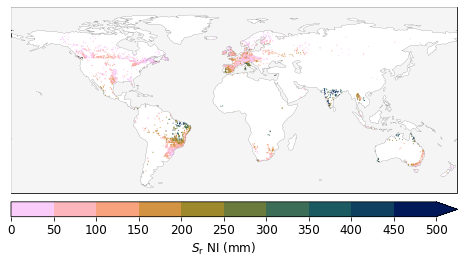

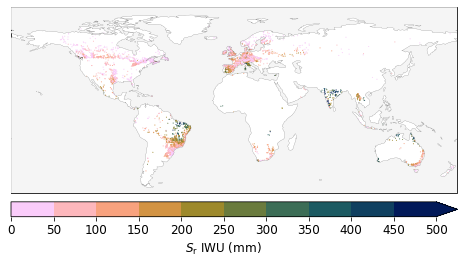

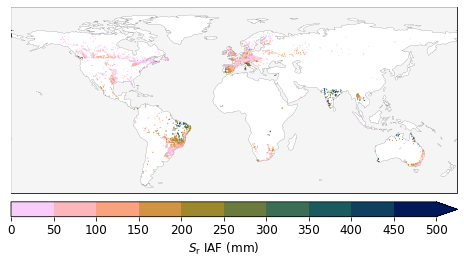

In [25]:
from cmcrameri import cm
data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)

cmap_vd2 = cm.batlow_r

sr_df['lat'] = c.lat
sr_df['lon'] = c.lon

bounds = np.linspace(0,500,11)
bounds2 = np.linspace(0,500,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,s=0.8,c=sr_df['sr_2_f0'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='$S_\mathrm{r}$ NI (mm)', size=12)
ax.set_title('',size=14)
fig.savefig(f'{fig_dir}/sr_map_T2_irrigation_NI.jpg',bbox_inches='tight',dpi=600)

# irrigation fiwu
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['sr_2_fiwu'],s=0.8,cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='$S_\mathrm{r}$ IWU (mm)', size=12)
fig.savefig(f'{fig_dir}/sr_map_T2_irrigation_IWU.jpg',bbox_inches='tight',dpi=300)

# irrigation fopt
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['sr_2_fopt'],s=0.8,cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='$S_\mathrm{r}$ IAF (mm)', size=12)
fig.savefig(f'{fig_dir}/sr_map_T2_irrigation_IAF.jpg',bbox_inches='tight',dpi=300)

k3     73.446613
k5     72.568030
lat    50.760400
lon     4.616650
dtype: float64


Text(0.5, 1.0, '')

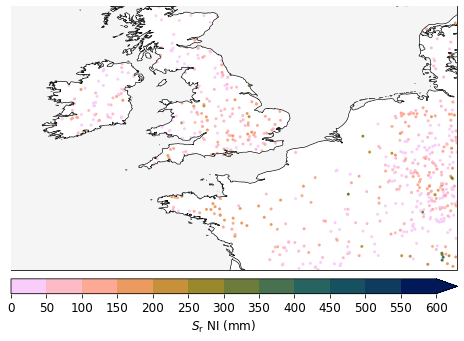

In [26]:
# western europe
lat_min_we, lat_max_we = 45,58
lon_min_we, lon_max_we = -12,10

data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)

sr_df_ni['lat'] = c.lat
sr_df_ni['lon'] = c.lon

sr_df_ni_we = sr_df_ni[(sr_df_ni.lat<lat_max_we)&(sr_df_ni.lat>lat_min_we)&(sr_df_ni.lon<lon_max_we)&(sr_df_ni.lon>lon_min_we)]
print(sr_df_ni_we.median())

bounds = np.linspace(0,600,13)
bounds2 = np.linspace(0,600,13)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(lon_min_we,lon_max_we)
ax.set_ylim(lat_min_we,lat_max_we)
s = ax.scatter(sr_df_ni_we.lon,sr_df_ni_we.lat,s=8,c=sr_df_ni_we['k3'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='$S_\mathrm{r}$ NI (mm)', size=12)
ax.set_title('',size=14)


k3     40.503292
k5     40.622241
lat    48.518700
lon   -83.287500
dtype: float64


Text(0.5, 1.0, '')

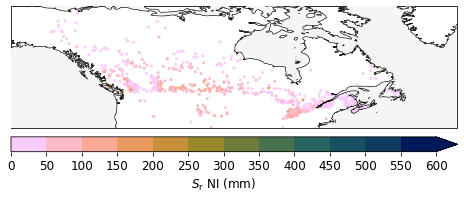

In [27]:
# canada
lat_min_we, lat_max_we = 40,70
lon_min_we, lon_max_we = -150,-40

data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)

sr_df_ni['lat'] = c.lat
sr_df_ni['lon'] = c.lon

sr_df_ni_we = sr_df_ni[(sr_df_ni.lat<lat_max_we)&(sr_df_ni.lat>lat_min_we)&(sr_df_ni.lon<lon_max_we)&(sr_df_ni.lon>lon_min_we)]
print(sr_df_ni_we.median())

bounds = np.linspace(0,600,13)
bounds2 = np.linspace(0,600,13)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(lon_min_we,lon_max_we)
ax.set_ylim(lat_min_we,lat_max_we)
s = ax.scatter(sr_df_ni_we.lon,sr_df_ni_we.lat,s=8,c=sr_df_ni_we['k3'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='$S_\mathrm{r}$ NI (mm)', size=12)
ax.set_title('',size=14)

k3     245.939183
k5     246.101134
lat     -7.206300
lon    -37.285400
dtype: float64


Text(0.5, 1.0, '')

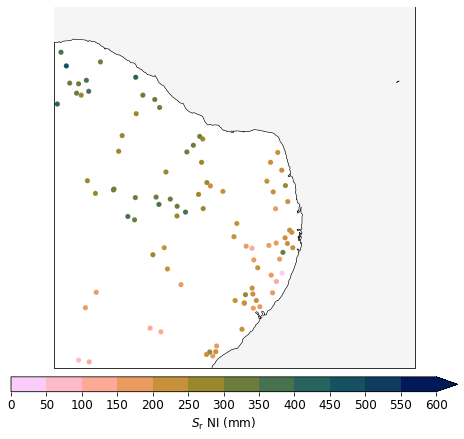

In [28]:
# NE brazil
lat_min_we, lat_max_we = -11,-2
lon_min_we, lon_max_we = -41,-32

data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)

sr_df_ni['lat'] = c.lat
sr_df_ni['lon'] = c.lon

sr_df_ni_we = sr_df_ni[(sr_df_ni.lat<lat_max_we)&(sr_df_ni.lat>lat_min_we)&(sr_df_ni.lon<lon_max_we)&(sr_df_ni.lon>lon_min_we)]
print(sr_df_ni_we.median())

bounds = np.linspace(0,600,13)
bounds2 = np.linspace(0,600,13)
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(lon_min_we,lon_max_we)
ax.set_ylim(lat_min_we,lat_max_we)
s = ax.scatter(sr_df_ni_we.lon,sr_df_ni_we.lat,s=25,c=sr_df_ni_we['k3'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='$S_\mathrm{r}$ NI (mm)', size=12)
ax.set_title('',size=14)

k3     436.259635
k5     436.049516
lat     21.443750
lon     82.218700
dtype: float64


Text(0.5, 1.0, '')

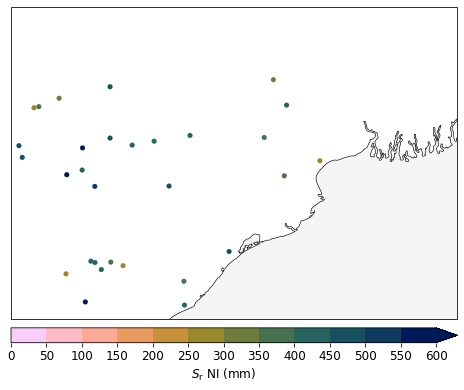

In [29]:
# India
lat_min_we, lat_max_we = 18,25
lon_min_we, lon_max_we = 80,90

data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)

sr_df_ni['lat'] = c.lat
sr_df_ni['lon'] = c.lon

sr_df_ni_we = sr_df_ni[(sr_df_ni.lat<lat_max_we)&(sr_df_ni.lat>lat_min_we)&(sr_df_ni.lon<lon_max_we)&(sr_df_ni.lon>lon_min_we)]
print(sr_df_ni_we.median())

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(lon_min_we,lon_max_we)
ax.set_ylim(lat_min_we,lat_max_we)
s = ax.scatter(sr_df_ni_we.lon,sr_df_ni_we.lat,s=25,c=sr_df_ni_we['k3'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='$S_\mathrm{r}$ NI (mm)', size=12)
ax.set_title('',size=14)

k3     350.394053
k5     350.197715
lat    -14.463333
lon    142.637778
dtype: float64


Text(0.5, 1.0, '')

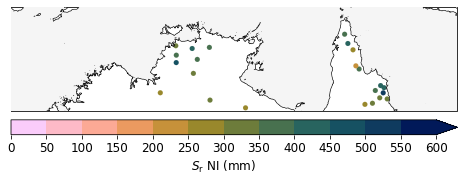

In [30]:
# Northern Australia
lat_min_we, lat_max_we = -17,-10
lon_min_we, lon_max_we = 120,150

data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)

sr_df_ni['lat'] = c.lat
sr_df_ni['lon'] = c.lon

sr_df_ni_we = sr_df_ni[(sr_df_ni.lat<lat_max_we)&(sr_df_ni.lat>lat_min_we)&(sr_df_ni.lon<lon_max_we)&(sr_df_ni.lon>lon_min_we)]
print(sr_df_ni_we.median())

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.2)
ax.set_global()
ax.set_xlim(lon_min_we,lon_max_we)
ax.set_ylim(lat_min_we,lat_max_we)
s = ax.scatter(sr_df_ni_we.lon,sr_df_ni_we.lat,s=25,c=sr_df_ni_we['k3'],cmap=cmap_vd2, norm=norm,edgecolors='face',marker='o',linewidths=0.1)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='$S_\mathrm{r}$ NI (mm)', size=12)
ax.set_title('',size=14)

In [31]:
#Europe
lat_min_e, lat_max_e = 35,63
lon_min_e, lon_max_e = -12,18

#Asia
lat_min_a, lat_max_a = -11,26
lon_min_a, lon_max_a = 65,120

#us
lat_min_u, lat_max_u = 20,55
lon_min_u, lon_max_u = -130,-70

#south america
lat_min_s, lat_max_s = -33,-4
lon_min_s, lon_max_s = -58,-32

In [32]:
# cmap_ylgnbu = cm.navia_r
# cmap_ylgnbu

NameError: name 'ca3' is not defined

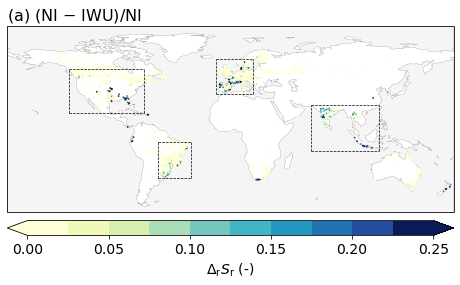

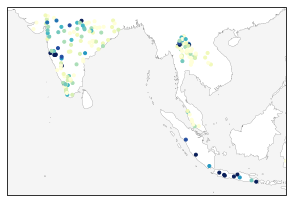

In [33]:
# RELATIVE DIFFERENCES IN SR
data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)

er_df['lat'] = c.lat
er_df['lon'] = c.lon

er_df_a = er_df[(er_df.lat<lat_max_a)&(er_df.lat>lat_min_a)&(er_df.lon<lon_max_a)&(er_df.lon>lon_min_a)]
er_df_e = er_df[(er_df.lat<lat_max_e)&(er_df.lat>lat_min_e)&(er_df.lon<lon_max_e)&(er_df.lon>lon_min_e)]
er_df_u = er_df[(er_df.lat<lat_max_u)&(er_df.lat>lat_min_u)&(er_df.lon<lon_max_u)&(er_df.lon>lon_min_u)]
er_df_s = er_df[(er_df.lat<lat_max_s)&(er_df.lat>lat_min_s)&(er_df.lon<lon_max_s)&(er_df.lon>lon_min_s)]

# bounds = np.linspace(-0.25,0,11)
bounds = np.linspace(0,0.25,11)
# bounds=[-0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,-0.02,  0.00]
bounds2 = np.linspace(0.0,0.25,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap_ylgnbu.N)

# no irrigation vs fiwu
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
# ax.coastlines(linewidth=0.001)
# ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()

ax.plot([lon_min_a,lon_max_a],[lat_max_a,lat_max_a],'k--',zorder=2,linewidth=0.7)
ax.plot([lon_min_a,lon_max_a],[lat_min_a,lat_min_a],'k--',zorder=2,linewidth=0.7)
ax.plot([lon_min_a,lon_min_a],[lat_min_a,lat_max_a],'k--',zorder=2,linewidth=0.7)
ax.plot([lon_max_a,lon_max_a],[lat_min_a,lat_max_a],'k--',zorder=2,linewidth=0.7)

ax.plot([lon_min_e,lon_max_e],[lat_max_e,lat_max_e],'k--',linewidth=0.7)
ax.plot([lon_min_e,lon_max_e],[lat_min_e,lat_min_e],'k--',linewidth=0.7)
ax.plot([lon_min_e,lon_min_e],[lat_min_e,lat_max_e],'k--',linewidth=0.7)
ax.plot([lon_max_e,lon_max_e],[lat_min_e,lat_max_e],'k--',linewidth=0.7)

ax.plot([lon_min_u,lon_max_u],[lat_max_u,lat_max_u],'k--',linewidth=0.7)
ax.plot([lon_min_u,lon_max_u],[lat_min_u,lat_min_u],'k--',linewidth=0.7)
ax.plot([lon_min_u,lon_min_u],[lat_min_u,lat_max_u],'k--',linewidth=0.7)
ax.plot([lon_max_u,lon_max_u],[lat_min_u,lat_max_u],'k--',linewidth=0.7)

ax.plot([lon_min_s,lon_max_s],[lat_max_s,lat_max_s],'k--',linewidth=0.7)
ax.plot([lon_min_s,lon_max_s],[lat_min_s,lat_min_s],'k--',linewidth=0.7)
ax.plot([lon_min_s,lon_min_s],[lat_min_s,lat_max_s],'k--',linewidth=0.7)
ax.plot([lon_max_s,lon_max_s],[lat_min_s,lat_max_s],'k--',linewidth=0.7)

ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fiwu']*-1,s=0.5,cmap=cmap_ylgnbu,norm=norm)
# ax.annotate(f'Median: {np.round(er_df.f0_fiwu.median(),1)} %',(-170,-50),size=14)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2,aspect=30)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$\Delta_\mathrm{r} S_\mathrm{r}$ (-)', size=14)
ax.set_title('(a) (NI $-$ IWU)/NI',loc='left',size=16)
# ax.set_title('(a) ($S_\mathrm{r}$-IWU $-$ $S_\mathrm{r}$-NI)/$S_\mathrm{r}$-NI',loc='left',size=16)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fiwu.jpg',bbox_inches='tight',dpi=300)

# asia
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min_a,lon_max_a)
ax.set_ylim(lat_min_a,lat_max_a)
s = ax.scatter(er_df.lon,er_df.lat,c=er_df['f0_fiwu']*-1,s=9,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca3]['lon'],er_df.loc[ca3]['lat'],'d',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fiwu_asia.jpg',bbox_inches='tight',dpi=300)

# EUROPE
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min_e,lon_max_e)
ax.set_ylim(lat_min_e,lat_max_e)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fiwu']*-1,s=9,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca2]['lon'],er_df.loc[ca2]['lat'],'s',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fiwu_europe.jpg',bbox_inches='tight',dpi=300)

# USA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min_u,lon_max_u)
ax.set_ylim(lat_min_u,lat_max_u)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fiwu']*-1,s=10,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca1]['lon'],er_df.loc[ca1]['lat'],'o',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fiwu_us.jpg',bbox_inches='tight',dpi=300)

# SOUTH AMERICA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min_s,lon_max_s)
ax.set_ylim(lat_min_s,lat_max_s)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fiwu']*-1,s=10,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca0]['lon'],er_df.loc[ca0]['lat'],'^',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fiwu_sa.jpg',bbox_inches='tight',dpi=300)


# no irrigation vs fia
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()

ax.plot([lon_min_a,lon_max_a],[lat_max_a,lat_max_a],'k--',zorder=2,linewidth=0.7)
ax.plot([lon_min_a,lon_max_a],[lat_min_a,lat_min_a],'k--',zorder=2,linewidth=0.7)
ax.plot([lon_min_a,lon_min_a],[lat_min_a,lat_max_a],'k--',zorder=2,linewidth=0.7)
ax.plot([lon_max_a,lon_max_a],[lat_min_a,lat_max_a],'k--',zorder=2,linewidth=0.7)

ax.plot([lon_min_e,lon_max_e],[lat_max_e,lat_max_e],'k--',linewidth=0.7)
ax.plot([lon_min_e,lon_max_e],[lat_min_e,lat_min_e],'k--',linewidth=0.7)
ax.plot([lon_min_e,lon_min_e],[lat_min_e,lat_max_e],'k--',linewidth=0.7)
ax.plot([lon_max_e,lon_max_e],[lat_min_e,lat_max_e],'k--',linewidth=0.7)

ax.plot([lon_min_u,lon_max_u],[lat_max_u,lat_max_u],'k--',linewidth=0.7)
ax.plot([lon_min_u,lon_max_u],[lat_min_u,lat_min_u],'k--',linewidth=0.7)
ax.plot([lon_min_u,lon_min_u],[lat_min_u,lat_max_u],'k--',linewidth=0.7)
ax.plot([lon_max_u,lon_max_u],[lat_min_u,lat_max_u],'k--',linewidth=0.7)

ax.plot([lon_min_s,lon_max_s],[lat_max_s,lat_max_s],'k--',linewidth=0.7)
ax.plot([lon_min_s,lon_max_s],[lat_min_s,lat_min_s],'k--',linewidth=0.7)
ax.plot([lon_min_s,lon_min_s],[lat_min_s,lat_max_s],'k--',linewidth=0.7)
ax.plot([lon_max_s,lon_max_s],[lat_min_s,lat_max_s],'k--',linewidth=0.7)

ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fopt']*-1,s=0.5,cmap=cmap_ylgnbu,norm=norm)
# ax.annotate(f'Median: {np.round(er_df.f0_fiwu.median(),1)} %',(-170,-50),size=14)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02,norm=norm,ticks=bounds2,aspect=30)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='$\Delta_\mathrm{r} S_\mathrm{r}$ (-)', size=14)
ax.set_title('(b) (NI $-$ IAF)/NI',loc='left',size=16)
# ax.set_title('(b) ($S_\mathrm{r}$-IAF $-$ $S_\mathrm{r}$-NI)/$S_\mathrm{r}$-NI',loc='left',size=16)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fia.jpg',bbox_inches='tight',dpi=300)

# asia
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min_a,lon_max_a)
ax.set_ylim(lat_min_a,lat_max_a)
s = ax.scatter(er_df.lon,er_df.lat,c=er_df['f0_fopt']*-1,s=9,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca3]['lon'],er_df.loc[ca3]['lat'],'d',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fia_asia.jpg',bbox_inches='tight',dpi=300)

# EUROPE
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min_e,lon_max_e)
ax.set_ylim(lat_min_e,lat_max_e)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fopt']*-1,s=9,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca2]['lon'],er_df.loc[ca2]['lat'],'s',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fia_europe.jpg',bbox_inches='tight',dpi=300)

# USA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min_u,lon_max_u)
ax.set_ylim(lat_min_u,lat_max_u)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fopt']*-1,s=10,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca1]['lon'],er_df.loc[ca1]['lat'],'o',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=12)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fia_us.jpg',bbox_inches='tight',dpi=300)

# SOUTH AMERICA
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=1,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min_s,lon_max_s)
ax.set_ylim(lat_min_s,lat_max_s)
s = ax.scatter(sr_df.lon,sr_df.lat,c=er_df['f0_fopt']*-1,s=10,cmap=cmap_ylgnbu,norm=norm)
ax.plot(er_df.loc[ca0]['lon'],er_df.loc[ca0]['lat'],'^',markeredgecolor='red',markeredgewidth=2,markerfacecolor='None',markersize=13)
fig.savefig(f'{fig_dir}/srreldiff_map_T2_no_irrigation_fia_sa.jpg',bbox_inches='tight',dpi=300)


## IA STRATIFICATION

In [ ]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points2.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

# sr_df = sr_df.astype(int) #int values
sr_df = sr_df.round(2)               
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)
fopt_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_fopt,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
fopt_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt ,4) 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

# drop pos catchments
# ix_drop = ['us_0006081','br_0000699','za_0000167','us_0005876','us_0004753','ca_0000774'] natchments with sr increasing with irri compared to no-irri
# sr_df = sr_df.drop(index=ix_drop)
# e_df = e_df.drop(index=ix_drop)
# er_df = er_df.drop(index=ix_drop)

# MAKE MAP OF AI
ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc = cc.loc[e_df.index]

ir2['lat'] = cc.lat
ir2['lon'] = cc.lon

ir2 = ir2.loc[e_df.index]
ir = ir2.hi
iwu = cc.iwu

bounds = [0,0.0100001,0.0500001,0.100001,0.15]
bounds2 =[0,0.01,0.05,0.1]
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cc.lon,cc.lat,c=(ir),s=0.2,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='$I_\mathrm{a}$ (-)', size=12)
fig.savefig(f'{fig_dir}/ia_map.jpg',bbox_inches='tight',dpi=300)

In [ ]:
# no irrigation
lvls = np.linspace(0,0.1,11) 
lvls2 = np.linspace(0,0.1,11) 
cmapv = plt.cm.viridis_r  # define the colormap
norm = mpl.colors.BoundaryNorm(lvls, cmapv.N)
# z = ia.where(ia==0)

# # fig with stats
# fig = plt.figure(figsize=(8,8))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.coastlines(linewidth=0.001)
# ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
# ax.set_global()
# cf = ia.plot(ax=ax, cmap=cmapv, add_colorbar=False, vmin=0, vmax=5, levels=lvls)#plot all points
# cf3 = z.plot(ax=ax, cmap=cmap_grey, add_colorbar=False, vmin=0, vmax=5, levels=[0,1])
# cbar = plt.colorbar(cf, orientation='horizontal',extend='max', pad=0.02, ticks=lvls2,aspect=30)
# cbar.ax.tick_params(labelsize=14)
# cbar.ax.set_xticklabels(['>0','0.05','0.10','0.15','0.20','0.25','0.30','0.35','0.40','0.45','0.50'])
# cbar.set_label(label='$I_\mathrm{a}$ (-)', size=14)
# ax.set_title(f'',size=12)
# ax.set_ylim(-60,90)
# ax.set_xlim(-180,180)
# fig.savefig(f'{fig_dir}/map_mean_ia_gridded.jpg',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cc.lon,cc.lat,c=(ir),s=0.2,cmap=cmapv, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal',extend='max', pad=0.02, ticks=lvls2,aspect=30)
cbar.ax.tick_params(labelsize=14)
# cbar.ax.set_xticklabels(['>0','0.05','0.10','0.15','0.20','0.25','0.30','0.35','0.40','0.45','0.50'])
cbar.set_label(label='$I_\mathrm{a}$ (-)', size=14)
# cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=12)
# cbar.set_label(label='$I_\mathrm{a}$ (-)', size=12)
fig.savefig(f'{fig_dir}/ia_map2.jpg',bbox_inches='tight',dpi=300)

lvls = np.linspace(0,50,11) 
lvls2 = np.linspace(0,50,11) 
cmapv = plt.cm.viridis_r  # define the colormap
norm = mpl.colors.BoundaryNorm(lvls, cmapv.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cc.lon,cc.lat,c=(iwu*365),s=0.2,cmap=cmapv, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal',extend='max', pad=0.02, ticks=lvls2,aspect=30)
cbar.ax.tick_params(labelsize=14)
# cbar.ax.set_xticklabels(['>0','0.05','0.10','0.15','0.20','0.25','0.30','0.35','0.40','0.45','0.50'])
cbar.set_label(label='$\overline{I_\mathrm{w}}$ (-)', size=14)
# cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
# cbar.ax.tick_params(labelsize=12)
# cbar.set_label(label='$I_\mathrm{a}$ (-)', size=12)
fig.savefig(f'{fig_dir}/iwu_map2.jpg',bbox_inches='tight',dpi=300)

In [ ]:
iwu

In [ ]:
# boxplots of absolute errors between different Sr
e_df = e_df.dropna()
er_df = er_df.dropna()
e_df=e_df.iloc[:,0:2]
er_df=er_df.iloc[:,0:2]

#abs - IA bins
e_df0 = e_df[(ir<=0.01)]
e_df1 = e_df[(ir>0.01)&(ir<=0.05)]
e_df5 = e_df[(ir>0.05)&(ir<=0.1)]
e_df10 = e_df[(ir>0.1)]

#rel - IA bins
er_df0 = er_df[(ir<=0.01)]
er_df1 = er_df[(ir>0.01)&(ir<=0.05)]
er_df5 = er_df[(ir>0.05)&(ir<=0.1)]
er_df10 = er_df[(ir>0.1)]

# histogram with natchments
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax.bar(0,e_df0.count()[0])
ax.bar(1,e_df1.count()[0])
ax.bar(2,e_df5.count()[0])
ax.bar(3,e_df10.count()[0])
ax.annotate(f'{e_df0.count()[0]}',(-0.2,e_df0.count()[0]+50),size=14)
ax.annotate(f'{e_df1.count()[0]}',(0.9,e_df1.count()[0]+50),size=14)
ax.annotate(f'{e_df5.count()[0]}',(1.9,e_df5.count()[0]+50),size=14)
ax.annotate(f'{e_df10.count()[0]}',(2.9,e_df10.count()[0]+50),size=14)
# ax.set_ylim(0,2800)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['IA<=0.01','0.01<IA<=0.05','0.05<IA<=0.1','IA>0.1'])
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylabel(f'natchments',size=14)
ax.set_title(f'IA distribution',size=16)
fig.savefig(f'{work_dir}/output/figures/irrigation/histogram_bins.jpg', dpi=300, bbox_inches='tight')



In [ ]:
ca1='br_0002356'
ca2='ca_0000689'
ca3='es_0000742'
ca4='in_0000252'

In [ ]:
edft = pd.concat([e_df5,e_df10])
dm=np.round(edft.median(),2).values
d25=np.round((edft.quantile(0.25)),2).values
d75=np.round((edft.quantile(0.75)),2).values
print(dm,d25,d75)

In [ ]:
edft = pd.concat([er_df5,er_df10])
dm=np.round(edft.median(),2).values
d25=np.round((edft.quantile(0.25)),2).values
d75=np.round((edft.quantile(0.75)),2).values
print(dm,d25,d75)

In [ ]:
# h = input('Enter hex: ').lstrip('#')
# print('RGB =', tuple(int(h[i:i+2], 16) for i in (0, 2, 4)))

In [47]:
e_df0 = e_df0*-1
e_df1 = e_df1*-1
e_df5 = e_df5*-1
e_df10 = e_df10*-1

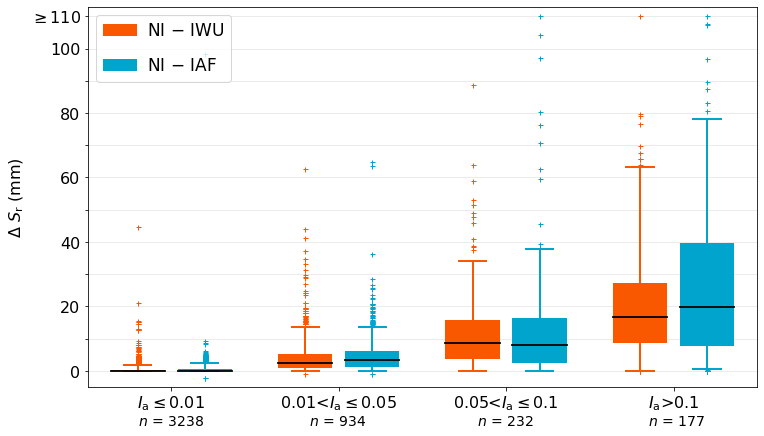

In [51]:
g1 = 'lightgrey'
g2 = 'dimgrey'
c2= '#00A4CCFF'
c3 = '#F95700FF'
c2f = (0, 164/255, 204/255)
c3f = (249/255, 87/255, 0)
c2e = (0, 164/255, 204/255,0)
c3e = (249/255, 87/255, 0,0)

# boxprops1 = dict(facecolor=c3f,edgecolor='k',linewidth=0.8)
# boxprops2 = dict(facecolor=c2f,edgecolor='k',linewidth=0.8)
# # medianprops = dict(color="black",linewidth=1.8)
# medianprops1 = dict(color='k',linewidth=1.8)
# medianprops2 = dict(color='k',linewidth=1.8)
# meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
# flierprops1 = dict(marker='+',markeredgecolor='k',markersize=5)
# flierprops2 = dict(marker='+',markeredgecolor='k',markersize=5)
# capprops1 = dict(linestyle='-', linewidth=1.0, color='k')
# capwidths = 1
# whiskerprops1 = dict(linestyle='--', linewidth=1.0, color='k')
# capprops2 = dict(linestyle='-', linewidth=1.0, color='k')
# whiskerprops2 = dict(linestyle='--', linewidth=1.0, color='k')

boxprops1 = dict(facecolor=c3f,edgecolor=c3e,linewidth=2.5)
boxprops2 = dict(facecolor=c2f,edgecolor=c2e,linewidth=2.5)
# medianprops = dict(color="black",linewidth=1.8)
medianprops1 = dict(color='k',linewidth=1.8)
medianprops2 = dict(color='k',linewidth=1.8)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops1 = dict(marker='+',markeredgecolor=c3,markersize=5)
flierprops2 = dict(marker='+',markeredgecolor=c2,markersize=5)
capprops1 = dict(linestyle='-', linewidth=2.0, color=c3)
whiskerprops1 = dict(linestyle='-', linewidth=2.0, color=c3)
capprops2 = dict(linestyle='-', linewidth=2.0, color=c2)
whiskerprops2 = dict(linestyle='-', linewidth=2.0, color=c2)

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(12,7))
p1 = ax.plot(1,-200, marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
p2 = ax.plot(1,-200,marker='^',linestyle='None', markeredgecolor='black',markerfacecolor='w',markersize=9)
p3 = ax.plot(1,-200,marker='o',linestyle='None', markeredgecolor='black',markerfacecolor='w',markersize=9)
p4 = ax.plot(1,-200,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='w',markersize=9)
p5 = ax.plot(1,-200,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='w',markersize=9)
p0 = ax.plot(1,-200,marker='^',linestyle='None', markeredgecolor='white',markerfacecolor='w',markersize=9)

ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(axis='y', color='0.9',zorder=0)
plt.subplots_adjust(wspace=0.05)
ax.boxplot(e_df0.iloc[:,0],positions=[1.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
ax.boxplot(e_df0.iloc[:,1],positions=[1.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
ax.plot([1.1],e_df0.loc[ca1].values[0],marker='^',linestyle='None', markeredgecolor=c3,markerfacecolor='w',markersize=9,zorder=2)
ax.plot([1.9],e_df0.loc[ca1].values[1],marker='^',linestyle='None', markeredgecolor=c2,markerfacecolor='w',markersize=9,zorder=2)

ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
ax.plot([3.1],e_df1.loc[ca2].values[0],marker='o',linestyle='None', markeredgecolor=c3,markerfacecolor='w',markersize=9,zorder=2)
ax.plot([3.9],e_df1.loc[ca2].values[1],marker='o',linestyle='None', markeredgecolor=c2,markerfacecolor='w',markersize=9,zorder=2)

ax.boxplot(e_df5.iloc[:,0],positions=[5.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
ax.boxplot(e_df5.iloc[:,1],positions=[5.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
ax.plot([5.1],e_df5.loc[ca3].values[0],marker='s',linestyle='None', markeredgecolor=c3,markerfacecolor='w',markersize=9,zorder=2)
ax.plot([5.9],e_df5.loc[ca3].values[1],marker='s',linestyle='None', markeredgecolor=c2,markerfacecolor='w',markersize=9,zorder=2)

bp1=ax.boxplot(e_df10.iloc[:,0],positions=[7.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df10.iloc[:,1],positions=[7.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
ax.plot([7.1],e_df10.loc[ca4].values[0],marker='d',linestyle='None', markeredgecolor=c3,markerfacecolor='w',markersize=9,zorder=2)
ax.plot([7.9],e_df10.loc[ca4].values[1],marker='d',linestyle='None', markeredgecolor=c2,markerfacecolor='w',markersize=9,zorder=2)

ax.set_ylim(-5,113)
ax.set_xlim(0.5,8.5)
ax.set_xticks([1.5,3.5,5.5,7.5])
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
ax.set_yticklabels(['0','','20','','40','','60','','80','','100','$\geq$110'])
# ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)
ax.set_xticklabels(['$I_\mathrm{a}$$\leq$0.01','0.01<$I_\mathrm{a}$$\leq$0.05','0.05<$I_\mathrm{a}$$\leq$0.1','$I_\mathrm{a}$>0.1'],size=16)

# ax.hlines(0,0,10,color='grey',linestyle=':',linewidth=0.7)
# ax.hlines(-110,0,10,color='grey',linestyle=':',linewidth=0.7)
# ax.vlines(2.5,-200,20,color='grey',linestyle='--',linewidth=1)
# ax.vlines(4.5,-200,20,color='grey',linestyle='--',linewidth=1)
# ax.vlines(6.5,-200,20,color='grey',linestyle='--',linewidth=1)

# ax.annotate('$n$ = '+str(e_df0.count()[0]),(0.55,-108),size=14)
# ax.annotate('$n$ = '+str(e_df1.count()[0]),(2.55,-108),size=14)
# ax.annotate('$n$ = '+str(e_df5.count()[0]),(4.55,-108),size=14)
# ax.annotate('$n$ = '+str(e_df10.count()[0]),(6.55,-108),size=14)

ax.text(1.1,-17,'$n$ = '+str(e_df0.count()[0]),size=14)
ax.text(3.15,-17,'$n$ = '+str(e_df1.count()[0]),size=14)
ax.text(5.15,-17,'$n$ = '+str(e_df5.count()[0]),size=14)
ax.text(7.2,-17,'$n$ = '+str(e_df10.count()[0]),size=14)

# plot values <-100 at -100
ax.plot(5.9,110,color=c2,marker='+',markersize=5)
ax.plot(7.1,110,color=c3,marker='+',markersize=5)
ax.plot(7.9,110,color=c2,marker='+',markersize=5)

ax.legend([bp1["boxes"][0], bp2["boxes"][0],p2[0],p3[0],p4[0],p5[0]],
          ['NI $-$ IWU','NI $-$ IAF',
           '\n'.join(wrap(f'Fig. 5a', 10)),'\n'.join(wrap(f'Fig. 5b', 10)),'\n'.join(wrap(f'Fig. 5c', 10)),'\n'.join(wrap(f'Fig. 5d', 10))],
          ncol=1,fontsize= 17,loc='lower center',bbox_to_anchor=(1.12, 0.2),handletextpad=0.6,labelspacing=1,columnspacing = 0.5)


# ax.legend([bp1["boxes"][0], bp2["boxes"][0]],
#           ['NI $-$ IWU','NI $-$ IAF'],ncol=1,fontsize= 17,loc='upper left',handletextpad=0.6,labelspacing=1,columnspacing = 0.5)

# ax.legend([bp1["boxes"][0], bp2["boxes"][0],p2[0],p3[0],p4[0],p5[0]],
#           ['NI $-$ IWU','NI $-$ IAF',
#            '\n'.join(wrap(f'Fig. 4a', 10)),'\n'.join(wrap(f'Fig. 4b', 10)),'\n'.join(wrap(f'Fig. 4c', 10)),'\n'.join(wrap(f'Fig. 4d', 10))],
#           ncol=6,fontsize= 17,loc='lower center',bbox_to_anchor=(0.5, -0.23),handletextpad=0.2,labelspacing=0.5,columnspacing = 1.2)


fig.savefig(f'{fig_dir}/box_abs_diff_ia.jpg', dpi=300, bbox_inches='tight')


In [247]:
for i in range(10):
    l = range(len(e_df10))
    rd = (random.sample(l,10))
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    bp1=ax.boxplot(e_df10.iloc[:,0],positions=[7.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
    bp2=ax.boxplot(e_df10.iloc[:,1],positions=[7.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
    ax.plot([7.1,7.9],e_df10.iloc[rd[0]].values,marker='d',linestyle='-', markersize=9,zorder=1)
    ax.plot([7.1,7.9],e_df10.iloc[rd[1]].values,marker='d',linestyle='-', markersize=9,zorder=1)
    ax.plot([7.1,7.9],e_df10.iloc[rd[2]].values,marker='d',linestyle='-',markersize=9,zorder=1)
    ax.plot([7.1,7.9],e_df10.iloc[rd[3]].values,marker='d',linestyle='-', markersize=9,zorder=1)
    ax.plot([7.1,7.9],e_df10.iloc[rd[4]].values,marker='d',linestyle='-', markersize=9,zorder=1)
    ax.plot([7.1,7.9],e_df10.iloc[rd[5]].values,marker='d',linestyle='-',markersize=9,zorder=1)
    ax.plot([7.1,7.9],e_df10.iloc[rd[6]].values,marker='d',linestyle='-',markersize=9,zorder=1)
    ax.plot([7.1,7.9],e_df10.iloc[rd[7]].values,marker='d',linestyle='-', markersize=9,zorder=1)
    ax.plot([7.1,7.9],e_df10.iloc[rd[8]].values,marker='d',linestyle='-', markersize=9,zorder=1)
    ax.plot([7.1,7.9],e_df10.iloc[rd[9]].values,marker='d',linestyle='-', markersize=9,zorder=1)


NameError: name 'random' is not defined

In [ ]:
e_df10[e_df10['f0_fiwu']<e_df10['f0_fopt']]

In [ ]:
e_df10.median()

In [119]:
p=e_df10[e_df10['f0_fiwu']>-16.78]
len(p[p['f0_fiwu']==p['f0_fopt']])

22

In [120]:
p=e_df10[e_df10['f0_fiwu']<-16.78]
len(p[p['f0_fiwu']<p['f0_fopt']])
# p[p['f0_fiwu']>p['f0_fopt']]

43

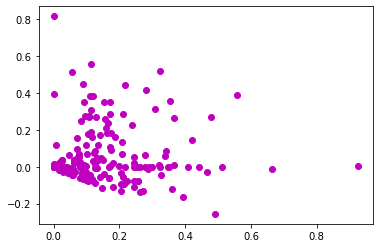

In [174]:
plt.plot(-er_df10['f0_fiwu'],-er_df10['f0_fopt']--er_df10['f0_fiwu'],'mo')

In [93]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
# d['std0']=np.round(e_df0.std(),2).values
# d['iqr0']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values
d['q250']=np.round((e_df0.quantile(0.25)),2).values
d['q750']=np.round((e_df0.quantile(0.75)),2).values


d['med1']=np.round(e_df1.median(),2).values
# d['std1']=np.round(e_df1.std(),2).values
# d['iqr1']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values
d['q251']=np.round((e_df1.quantile(0.25)),2).values
d['q751']=np.round((e_df1.quantile(0.75)),2).values

d['med5']=np.round(e_df5.median(),2).values
# d['std5']=np.round(e_df5.std(),2).values
# d['iqr5']=np.round((e_df5.quantile(0.75)-e_df5.quantile(0.25)),2).values
d['q255']=np.round((e_df5.quantile(0.25)),2).values
d['q755']=np.round((e_df5.quantile(0.75)),2).values

d['med10']=np.round(e_df10.median(),2).values
# d['std10']=np.round(e_df10.std(),2).values
# d['iqr10']=np.round((e_df10.quantile(0.75)-e_df10.quantile(0.25)),2).values
d['q2510']=np.round((e_df10.quantile(0.25)),2).values
d['q7510']=np.round((e_df10.quantile(0.75)),2).values

d

,med0,q250,q750,med1,q251,q751,med5,q255,q755,med10,q2510,q7510
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,0.00,-0.18,0.0,-2.54,-5.30,-0.99,-8.77,-15.94,-3.63,-16.78,-27.28,-8.75
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-0.09,-0.72,0.0,-3.30,-6.07,-1.22,-8.13,-16.47,-2.51,-19.71,-39.57,-7.79


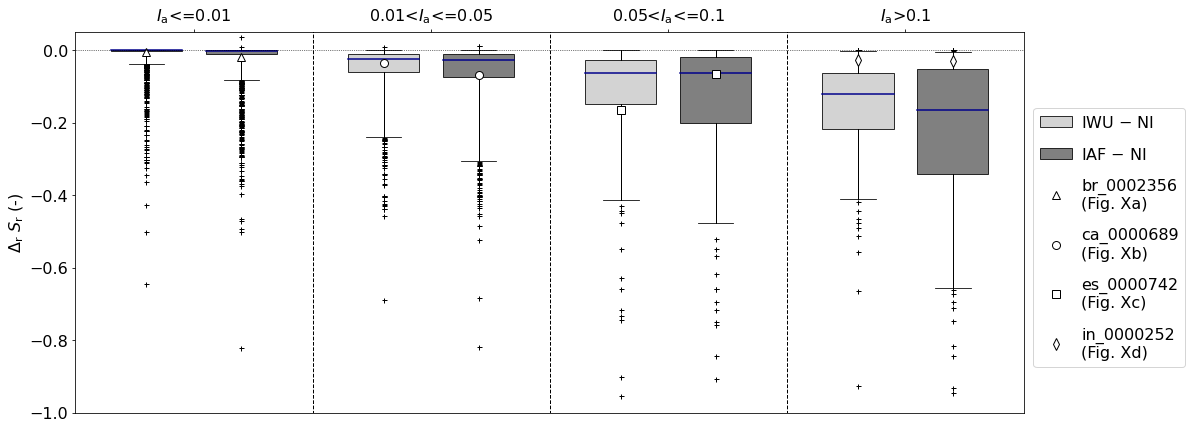

In [94]:
g1 = 'lightgrey'
g2 = 'grey'

boxprops1 = dict(facecolor=g1,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=g2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
# meanpointprops = dict(marker='^', markeredgecolor='black',markerfacecolor='white',markersize=7.5)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)

flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(17,7))
p1 = ax.plot(1,-200, marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
p2 = ax.plot(1,-200,marker='^',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8)
p3 = ax.plot(1,-200,marker='o',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8)
p4 = ax.plot(1,-200,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8)
p5 = ax.plot(1,-200,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8)
p0 = ax.plot(1,-200,marker='^',linestyle='None', markeredgecolor='white',markerfacecolor='white',markersize=8)

ax = fig.add_subplot(111)
plt.subplots_adjust(wspace=0.05)
ax.boxplot(er_df0.iloc[:,0],positions=[1.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(er_df0.iloc[:,1],positions=[1.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([1.1,1.9],er_df0.loc[ca1].values,marker='^',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

ax.boxplot(er_df1.iloc[:,0],positions=[3.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(er_df1.iloc[:,1],positions=[3.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([3.1,3.9],er_df1.loc[ca2].values,marker='o',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

ax.boxplot(er_df5.iloc[:,0],positions=[5.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(er_df5.iloc[:,1],positions=[5.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([5.1,5.9],er_df5.loc[ca3].values,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

bp1=ax.boxplot(er_df10.iloc[:,0],positions=[7.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(er_df10.iloc[:,1],positions=[7.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.plot([7.1,7.9],er_df10.loc[ca4].values,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.set_ylim(-1,0.05)
ax.set_xlim(0.5,8.5)
ax.set_xticks([1.5,3.5,5.5,7.5])
# ax.set_yticks([0,-20,-40,-60,-80,-100])
# ax.set_yticklabels([0,-20,-40,-60,-80,'< -100'])
ax.set_xticklabels(['$I_\mathrm{a}$<=0.01','0.01<$I_\mathrm{a}$<=0.05','0.05<$I_\mathrm{a}$<=0.1','$I_\mathrm{a}$>0.1'],size=18)
ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta_\mathrm{r}$ $S_\mathrm{r}$ (-)',size=16)

ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-100,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)

ax.annotate('$n$='+str(e_df0.count()[0]),(1.9,-98),size=14)
ax.annotate('$n$='+str(e_df1.count()[0]),(4.0,-98),size=14)
ax.annotate('$n$='+str(e_df5.count()[0]),(6.0,-98),size=14)
ax.annotate('$n$='+str(e_df10.count()[0]),(8.0,-98),size=14)

# ax.legend([bp1["boxes"][0], bp2["boxes"][0]],['IWU $-$ NI','IAF $-$ NI'],ncol=1,fontsize= 17,loc='lower left',handletextpad=0.8,columnspacing = 0.5)


ax.legend([bp1["boxes"][0], bp2["boxes"][0],p2[0],p3[0],p4[0],p5[0]],
          ['IWU $-$ NI','IAF $-$ NI',
           '\n'.join(wrap(f'{ca1} (Fig. Xa)', 10)),'\n'.join(wrap(f'{ca2} (Fig. Xb)', 10)),'\n'.join(wrap(f'{ca3} (Fig. Xc)', 10)),'\n'.join(wrap(f'{ca4} (Fig. Xd)', 10))],
          ncol=1,fontsize= 16,loc='lower center',bbox_to_anchor=(1.09, 0.10),handletextpad=0.6,labelspacing=1,columnspacing = 0.5)

fig.savefig(f'{fig_dir}/box_rel_diff_ia.jpg', dpi=300, bbox_inches='tight')


In [95]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(er_df0.median(),2).values
# d['std0']=np.round(er_df0.std(),2).values
# d['iqr0']=np.round((er_df0.quantile(0.75)-er_df0.quantile(0.25)),2).values
d['q250']=np.round((er_df0.quantile(0.25)),2).values
d['q750']=np.round((er_df0.quantile(0.75)),2).values


d['med1']=np.round(er_df1.median(),2).values
# d['std1']=np.round(er_df1.std(),2).values
# d['iqr1']=np.round((er_df1.quantile(0.75)-er_df1.quantile(0.25)),2).values
d['q251']=np.round((er_df1.quantile(0.25)),2).values
d['q751']=np.round((er_df1.quantile(0.75)),2).values

d['med5']=np.round(er_df5.median(),2).values
# d['std5']=np.round(er_df5.std(),2).values
# d['iqr5']=np.round((er_df5.quantile(0.75)-er_df5.quantile(0.25)),2).values
d['q255']=np.round((er_df5.quantile(0.25)),2).values
d['q755']=np.round((er_df5.quantile(0.75)),2).values

d['med10']=np.round(er_df10.median(),2).values
# d['std10']=np.round(er_df10.std(),2).values
# d['iqr10']=np.round((er_df10.quantile(0.75)-er_df10.quantile(0.25)),2).values
d['q2510']=np.round((er_df10.quantile(0.25)),2).values
d['q7510']=np.round((er_df10.quantile(0.75)),2).values
d

,med0,q250,q750,med1,q251,q751,med5,q255,q755,med10,q2510,q7510
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,0.0,-0.00,0.0,-0.02,-0.06,-0.01,-0.06,-0.15,-0.03,-0.12,-0.22,-0.06
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-0.0,-0.01,0.0,-0.03,-0.07,-0.01,-0.06,-0.20,-0.02,-0.17,-0.34,-0.05


## STRATIFY REGIONS

In [377]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points2.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

# sr_df = sr_df.astype(int) #int values
                
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)
fopt_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_fopt,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
fopt_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt ,4) 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

# drop pos catchments
# ix_drop = ['us_0006081','br_0000699','za_0000167','us_0005876','us_0004753','ca_0000774'] natchments with sr increasing with irri compared to no-irri
# sr_df = sr_df.drop(index=ix_drop)
# e_df = e_df.drop(index=ix_drop)
# er_df = er_df.drop(index=ix_drop)

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

In [378]:
e_df = e_df*-1

In [379]:
data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)

er_df['lat'] = c.lat
er_df['lon'] = c.lon
e_df['lat'] = c.lat
e_df['lon'] = c.lon

e_df_a = e_df[(e_df.lat<lat_max_a)&(e_df.lat>lat_min_a)&(e_df.lon<lon_max_a)&(e_df.lon>lon_min_a)]
e_df_e = e_df[(e_df.lat<lat_max_e)&(e_df.lat>lat_min_e)&(e_df.lon<lon_max_e)&(e_df.lon>lon_min_e)]
e_df_u = e_df[(e_df.lat<lat_max_u)&(e_df.lat>lat_min_u)&(e_df.lon<lon_max_u)&(e_df.lon>lon_min_u)]
e_df_s = e_df[(e_df.lat<lat_max_s)&(e_df.lat>lat_min_s)&(e_df.lon<lon_max_s)&(e_df.lon>lon_min_s)]

er_df_a = er_df[(er_df.lat<lat_max_a)&(er_df.lat>lat_min_a)&(er_df.lon<lon_max_a)&(er_df.lon>lon_min_a)]
er_df_e = er_df[(er_df.lat<lat_max_e)&(er_df.lat>lat_min_e)&(er_df.lon<lon_max_e)&(er_df.lon>lon_min_e)]
er_df_u = er_df[(er_df.lat<lat_max_u)&(er_df.lat>lat_min_u)&(er_df.lon<lon_max_u)&(er_df.lon>lon_min_u)]
er_df_s = er_df[(er_df.lat<lat_max_s)&(er_df.lat>lat_min_s)&(er_df.lon<lon_max_s)&(er_df.lon>lon_min_s)]

e_df_a = e_df_a.dropna()
er_df_a = er_df_a.dropna()
e_df_a=e_df_a.iloc[:,0:2]
er_df_a=er_df_a.iloc[:,0:2]

e_df_e = e_df_e.dropna()
er_df_e = er_df_e.dropna()
e_df_e=e_df_e.iloc[:,0:2]
er_df_e=er_df_e.iloc[:,0:2]

e_df_s = e_df_s.dropna()
er_df_s = er_df_s.dropna()
e_df_s=e_df_s.iloc[:,0:2]
er_df_s=er_df_s.iloc[:,0:2]

e_df_u = e_df_u.dropna()
er_df_u = er_df_u.dropna()
e_df_u=e_df_u.iloc[:,0:2]
er_df_u=er_df_u.iloc[:,0:2]

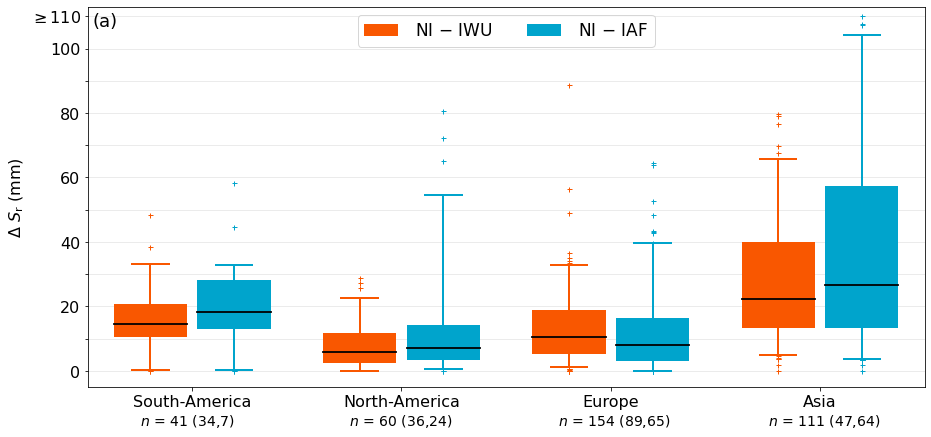

In [380]:
g1 = 'lightgrey'
g2 = 'dimgrey'

c2= '#00A4CCFF'
c3 = '#F95700FF'

# boxprops1 = dict(facecolor=c2,color="black",linewidth=0.8)
# boxprops2 = dict(facecolor=c3,color="black",linewidth=0.8)
# medianprops = dict(color="black",linewidth=1.5)
# meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
# flierprops = dict(color='black',marker='+',markersize=5)
# capprops = dict(linestyle='-', linewidth=0.8, color='Black')

boxprops1 = dict(facecolor=c3f,edgecolor=c3e,linewidth=2.5)
boxprops2 = dict(facecolor=c2f,edgecolor=c2e,linewidth=2.5)
# medianprops = dict(color="black",linewidth=1.8)
medianprops1 = dict(color='k',linewidth=1.8)
medianprops2 = dict(color='k',linewidth=1.8)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops1 = dict(marker='+',markeredgecolor=c3,markersize=5)
flierprops2 = dict(marker='+',markeredgecolor=c2,markersize=5)
capprops1 = dict(linestyle='-', linewidth=2.0, color=c3)
whiskerprops1 = dict(linestyle='-', linewidth=2.0, color=c3)
capprops2 = dict(linestyle='-', linewidth=2.0, color=c2)
whiskerprops2 = dict(linestyle='-', linewidth=2.0, color=c2)

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(15,7))

# south america
e_df = e_df_s
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(axis='y', color='0.9',zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[1.1],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[1.9],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(0.55,-108),size=14)
ax.text(1,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# north america
e_df = e_df_u
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(2.55,-108),size=14)
ax.text(3,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)
p2 = ax.plot(1,-200,'r*',markersize=9)

# europe
e_df = e_df_e
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[5.1],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[5.9],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(4.55,-108),size=14)
ax.text(5,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)
p2 = ax.plot(1,-200,'r*',markersize=9)

# asia
e_df = e_df_a
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
# e_df1.loc[['in_0000052','in_0000053'],'f0_fopt']=-100
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[7.1],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[7.9],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(6.55,-108),size=14)
ax.text(7,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)
ax.set_ylim(-5,113)
ax.set_xlim(0.5,8.5)
ax.set_xticks([1.5,3.5,5.5,7.5])
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
ax.set_yticklabels(['0','','20','','40','','60','','80','','100','$\geq$110'])
# ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(['South-America','North-America','Europe','Asia'],size=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)

# ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
# ax.hlines(-110,0,10,color='k',linestyle=':',linewidth=0.7)
# ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)

# ax.text(1.1,-17,'$n$ = '+str(e_df0.count()[0]),size=14)
# ax.text(3.15,-17,'$n$ = '+str(e_df1.count()[0]),size=14)
# ax.text(5.15,-17,'$n$ = '+str(e_df5.count()[0]),size=14)
# ax.text(7.2,-17,'$n$ = '+str(e_df10.count()[0]),size=14)

# plot values <-110 at -110
ax.plot(7.9,110,color=c2,marker='+',markersize=5)
ax.text(0.55,107,'(a)',size=18)

ax.legend([bpp1["boxes"][0], bpp2["boxes"][0]],
          ['NI $-$ IWU','NI $-$ IAF'],
          ncol=2,fontsize= 17,loc='upper center',handletextpad=1,labelspacing=1,columnspacing = 2)

fig.savefig(f'{fig_dir}/box_abs_diff_ia_regions.jpg', dpi=300, bbox_inches='tight')

In [381]:
#south america
e_df = e_df_s
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
# d['std0']=np.round(e_df0.std(),2).values
# d['iqr0']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values
d['q250']=np.round((e_df0.quantile(0.25)),2).values
d['q750']=np.round((e_df0.quantile(0.75)),2).values


d['med1']=np.round(e_df1.median(),2).values
# d['std1']=np.round(e_df1.std(),2).values
# d['iqr1']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values
d['q251']=np.round((e_df1.quantile(0.25)),2).values
d['q751']=np.round((e_df1.quantile(0.75)),2).values

d

,med0,q250,q750,med1,q251,q751
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,0.57,0.02,2.24,14.64,10.60,20.89
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,1.34,0.41,3.55,18.31,12.86,28.17


In [152]:
#north america
e_df = e_df_u
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
# d['std0']=np.round(e_df0.std(),2).values
# d['iqr0']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values
d['q250']=np.round((e_df0.quantile(0.25)),2).values
d['q750']=np.round((e_df0.quantile(0.75)),2).values


d['med1']=np.round(e_df1.median(),2).values
# d['std1']=np.round(e_df1.std(),2).values
# d['iqr1']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values
d['q251']=np.round((e_df1.quantile(0.25)),2).values
d['q751']=np.round((e_df1.quantile(0.75)),2).values

d

,med0,q250,q750,med1,q251,q751
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-0.05,-0.77,0.00,-5.92,-11.78,-2.38
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-0.35,-1.43,-0.04,-7.17,-14.23,-3.33


In [153]:
#europe
e_df = e_df_e
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
# d['std0']=np.round(e_df0.std(),2).values
# d['iqr0']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values
d['q250']=np.round((e_df0.quantile(0.25)),2).values
d['q750']=np.round((e_df0.quantile(0.75)),2).values


d['med1']=np.round(e_df1.median(),2).values
# d['std1']=np.round(e_df1.std(),2).values
# d['iqr1']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values
d['q251']=np.round((e_df1.quantile(0.25)),2).values
d['q751']=np.round((e_df1.quantile(0.75)),2).values

d

,med0,q250,q750,med1,q251,q751
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-0.32,-1.92,0.00,-10.51,-18.98,-5.14
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-0.72,-2.07,-0.12,-8.18,-16.29,-3.04


In [154]:
#asia
e_df = e_df_a
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
# d['std0']=np.round(e_df0.std(),2).values
# d['iqr0']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values
d['q250']=np.round((e_df0.quantile(0.25)),2).values
d['q750']=np.round((e_df0.quantile(0.75)),2).values


d['med1']=np.round(e_df1.median(),2).values
# d['std1']=np.round(e_df1.std(),2).values
# d['iqr1']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values
d['q251']=np.round((e_df1.quantile(0.25)),2).values
d['q751']=np.round((e_df1.quantile(0.75)),2).values

d

,med0,q250,q750,med1,q251,q751
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-3.86,-8.55,-1.12,-22.39,-39.86,-13.27
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-6.91,-13.79,-2.51,-26.53,-57.48,-13.24


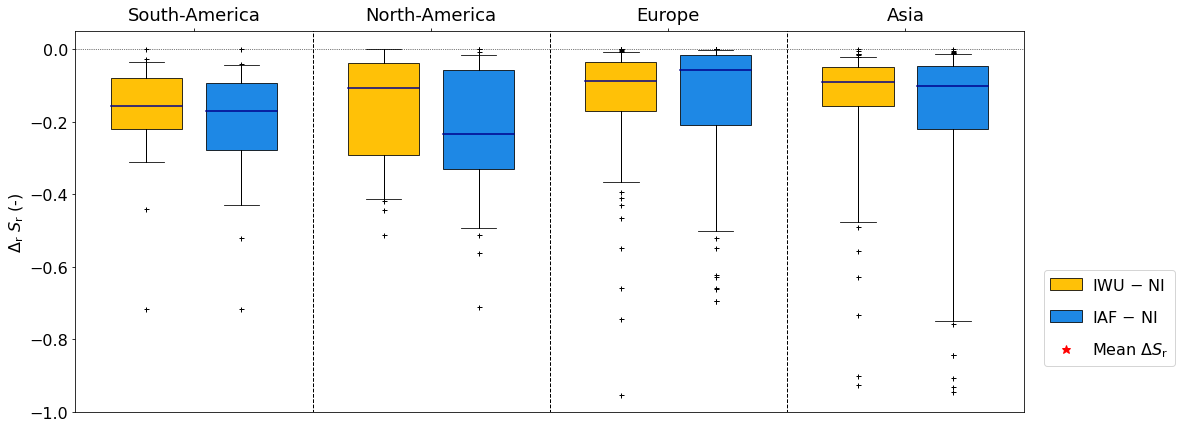

In [155]:
boxprops1 = dict(facecolor=c3,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=c2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(17,7))

# south america
e_df = er_df_s
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
ax = fig.add_subplot(111)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[1.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[1.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
# ax.plot([1.1,1.9],e_df0.loc[ca1].values,marker='^',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.annotate('$n$='+str(e_df1.count()[0]),(2.05,-98),size=14)

# north america
e_df = er_df_u
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
# ax.plot([3.1,3.9],e_df0.loc[ca2].values,marker='o',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.annotate('$n$='+str(e_df1.count()[0]),(4.05,-98),size=14)
p1 = ax.plot(1,-200, marker='o', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([p1[0]], [f'{ca2} (Fig. Xb)'], loc='lower left',ncol=1,fontsize= 16)

# europe
e_df = er_df_e
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[5.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[5.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
# ax.plot([5.1,5.9],e_df1.loc[ca3].values,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.annotate('$n$='+str(e_df1.count()[0]),(5.95,-98),size=14)
p1 = ax.plot(1,-200, marker='s', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([p1[0]], [f'{ca3} (Fig. Xc)'], loc='lower left',ncol=1,fontsize= 16)

# asia
e_df = er_df_a
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
# e_df1.loc['in_0000026']['f0_fiwu']=-100.1
# e_df1.loc['id_0000009']['f0_fopt']=-100.001
# e_df1.loc['in_0000117']['f0_fopt']=-100.1
# e_df1.loc['in_0000269']['f0_fopt']=-100.1
# e_df1.loc['in_0000053']['f0_fopt']=-100.1
# e_df1.loc['in_0000039']['f0_fopt']=-100.1
# e_df1.loc['in_0000052']['f0_fopt']=-100.1
# e_df1.loc['in_0000281']['f0_fopt']=-100.1
# e_df1.loc['id_0000019']['f0_fopt']=-100.1
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[7.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[7.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
# ax.plot([7.1,7.9],e_df1.loc[ca4].values,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)
ax.annotate('$n$='+str(e_df1.count()[0]),(7.95,-98),size=14)
ax.set_ylim(-1,0.05)
ax.set_xlim(0.5,8.5)
ax.set_xticks([1.5,3.5,5.5,7.5])
# ax.set_yticks([0,-20,-40,-60,-80,-100])
# ax.set_yticklabels([0,-20,-40,-60,-80,'< -100'])
ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(['South-America','North-America','Europe','Asia'],size=18)
ax.set_ylabel('$\Delta_\mathrm{r}$ $S_\mathrm{r}$ (-)',size=16)

ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-100,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)

p2 = ax.plot(1,-200, marker='d', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p1 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0]],
          ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$'],
          ncol=1,fontsize= 16,loc='lower center',bbox_to_anchor=(1.09, 0.10),handletextpad=0.6,labelspacing=1,columnspacing = 0.5)

fig.savefig(f'{fig_dir}/box_rel_diff_ia_regions.jpg', dpi=300, bbox_inches='tight')

In [156]:
#south america
e_df = er_df_s
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
# d['std0']=np.round(e_df0.std(),2).values
# d['iqr0']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values
d['q250']=np.round((e_df0.quantile(0.25)),2).values
d['q750']=np.round((e_df0.quantile(0.75)),2).values


d['med1']=np.round(e_df1.median(),2).values
# d['std1']=np.round(e_df1.std(),2).values
# d['iqr1']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values
d['q251']=np.round((e_df1.quantile(0.25)),2).values
d['q751']=np.round((e_df1.quantile(0.75)),2).values

d

,med0,q250,q750,med1,q251,q751
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-0.00,-0.02,-0.0,-0.16,-0.22,-0.08
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-0.01,-0.04,-0.0,-0.17,-0.28,-0.09


In [157]:
#north america
e_df = er_df_u
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
# d['std0']=np.round(e_df0.std(),2).values
# d['iqr0']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values
d['q250']=np.round((e_df0.quantile(0.25)),2).values
d['q750']=np.round((e_df0.quantile(0.75)),2).values


d['med1']=np.round(e_df1.median(),2).values
# d['std1']=np.round(e_df1.std(),2).values
# d['iqr1']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values
d['q251']=np.round((e_df1.quantile(0.25)),2).values
d['q751']=np.round((e_df1.quantile(0.75)),2).values

d

,med0,q250,q750,med1,q251,q751
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-0.00,-0.02,0.0,-0.11,-0.29,-0.04
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-0.01,-0.03,-0.0,-0.23,-0.33,-0.06


In [158]:
#europe
e_df = er_df_e
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
# d['std0']=np.round(e_df0.std(),2).values
# d['iqr0']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values
d['q250']=np.round((e_df0.quantile(0.25)),2).values
d['q750']=np.round((e_df0.quantile(0.75)),2).values


d['med1']=np.round(e_df1.median(),2).values
# d['std1']=np.round(e_df1.std(),2).values
# d['iqr1']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values
d['q251']=np.round((e_df1.quantile(0.25)),2).values
d['q751']=np.round((e_df1.quantile(0.75)),2).values

d

,med0,q250,q750,med1,q251,q751
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-0.00,-0.02,0.0,-0.09,-0.17,-0.03
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-0.01,-0.03,-0.0,-0.06,-0.21,-0.02


In [159]:
#asia
e_df = er_df_a
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
# d['std0']=np.round(e_df0.std(),2).values
# d['iqr0']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values
d['q250']=np.round((e_df0.quantile(0.25)),2).values
d['q750']=np.round((e_df0.quantile(0.75)),2).values


d['med1']=np.round(e_df1.median(),2).values
# d['std1']=np.round(e_df1.std(),2).values
# d['iqr1']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values
d['q251']=np.round((e_df1.quantile(0.25)),2).values
d['q751']=np.round((e_df1.quantile(0.75)),2).values

d

,med0,q250,q750,med1,q251,q751
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-0.02,-0.04,-0.00,-0.09,-0.16,-0.05
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-0.03,-0.06,-0.01,-0.10,-0.22,-0.05


## STRATIFY CLIMATE ZONES

In [322]:
cz = pd.read_csv(f'{work_dir}/data/koppen_climates/all_catch_table_kg_climates.csv',index_col=0)

data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)
cz = cz.loc[c.index]
cz = cz.loc[er_df.index]
cz['lat'] = c.lat
cz['lon'] = c.lon

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi
cz['ir'] = ir
cz['med'] = cz['med']-1
cz

,kg,med,lat,lon,ir
at_0000061,Dfb,25,47.3854,16.0021,0.001540
ca_0002247,BSk,6,49.9687,-110.3688,0.028788
de_0000760,Dfb,25,48.8854,11.1979,0.002392
br_0000837,Cwa,10,-20.4063,-44.0229,0.005775
ca_0005460,Dfc,26,49.1062,-116.4354,0.005130
...,...,...,...,...,...
fr_0000804,Cfb,14,47.4146,3.4937,0.003098
de_0000538,Dfb,25,50.1854,11.5271,0.000000
gb_0000177,Cfb,14,54.9312,-3.8396,0.000000
de_0000348,Dfb,25,49.8812,6.4604,0.000000


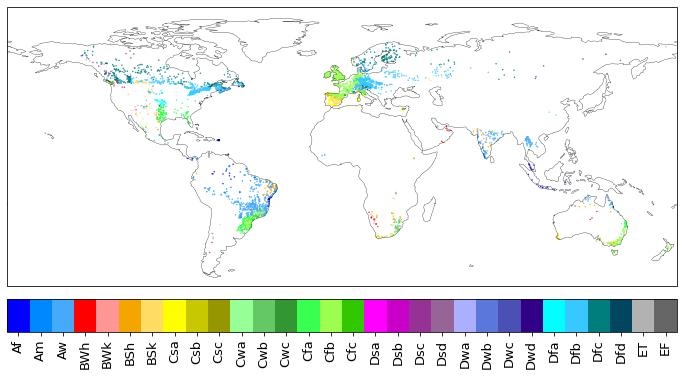

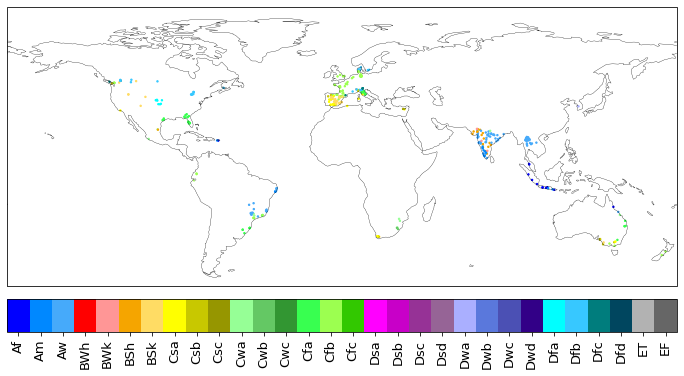

In [323]:
c=['Af','Am','Aw','BWh','BWk','BSh','BSk','Csa','Csb','Csc','Cwa','Cwb','Cwc','Cfa','Cfb','Cfc','Dsa','Dsb','Dsc','Dsd','Dwa','Dwb','Dwc','Dwd','Dfa','Dfb','Dfc','Dfd','ET','EF']

bounds = np.linspace(0,30,31)
bounds2 = np.linspace(0,30,31)
norm = mpl.colors.BoundaryNorm(bounds, cm_kg.N)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cz.lon,cz.lat,c=cz.med,s=0.2,cmap=cm_kg, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02, norm=norm,ticks=bounds2)
cbar.set_ticks(np.arange(0.5,30,1))
cbar.set_ticklabels(c,rotation=90,size=13)
fig.savefig(f'{fig_dir}/koppen_figures/all_catchments_kg.jpg',bbox_inches='tight',dpi=300)


cz2 = cz[cz.ir>0.05]
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cz2.lon,cz2.lat,c=cz2.med,s=2,cmap=cm_kg, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02, norm=norm,ticks=bounds2)
cbar.set_ticks(np.arange(0.5,30,1))
cbar.set_ticklabels(c,rotation=90,size=13)
fig.savefig(f'{fig_dir}/koppen_figures/all_catchments_kg_Ia.jpg',bbox_inches='tight',dpi=300)

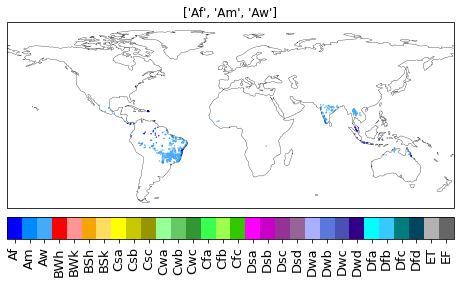

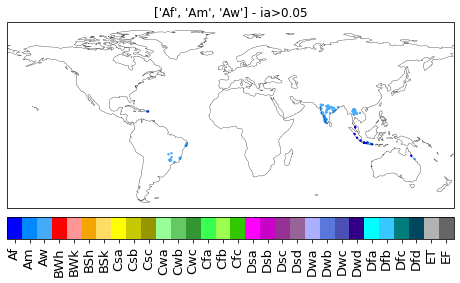

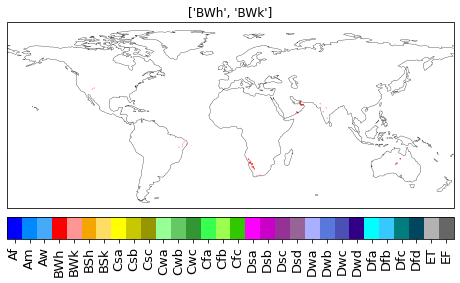

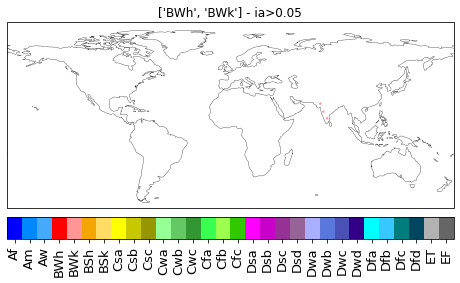

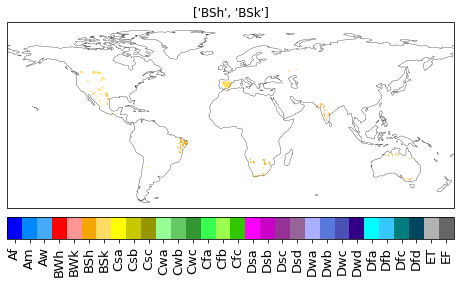

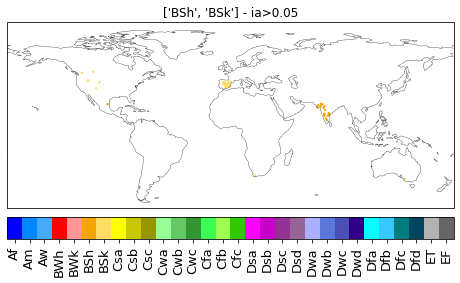

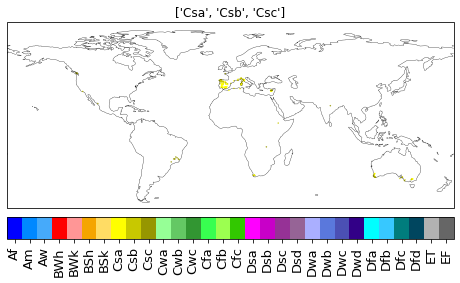

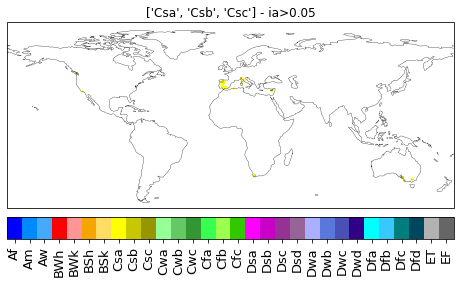

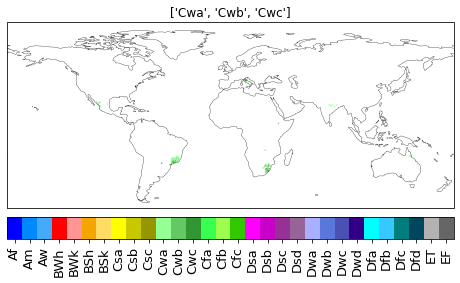

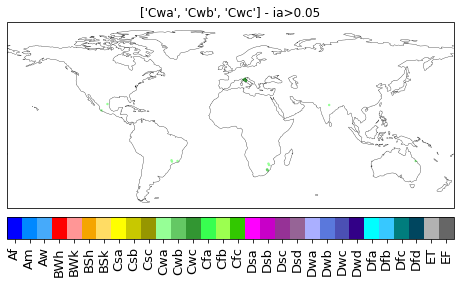

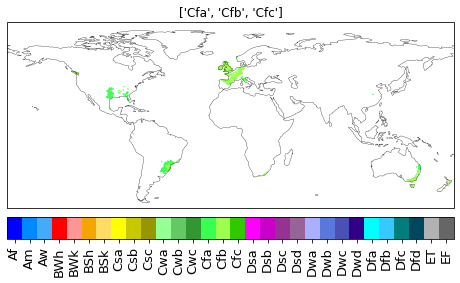

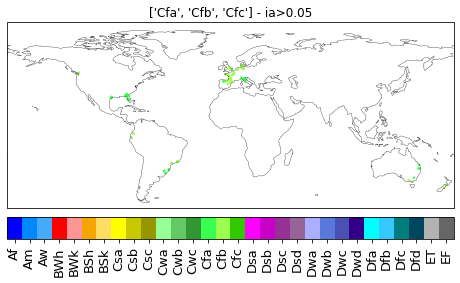

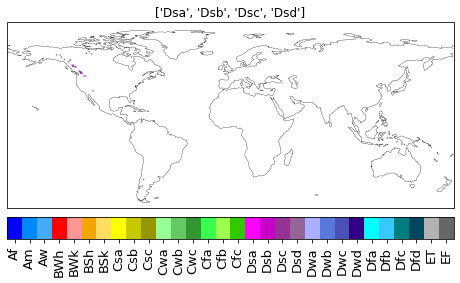

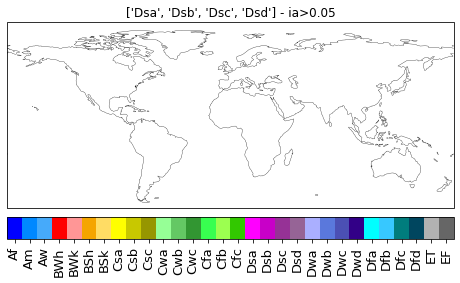

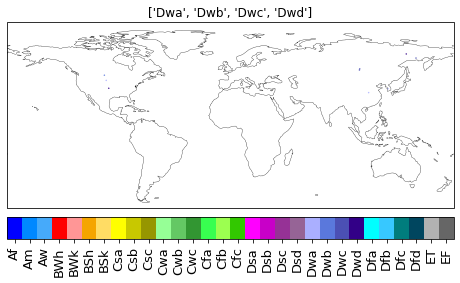

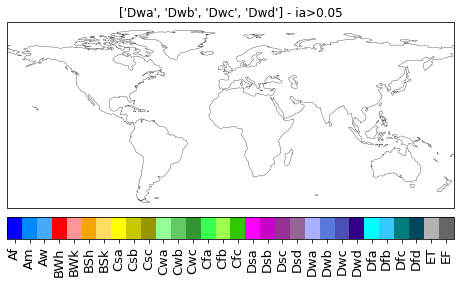

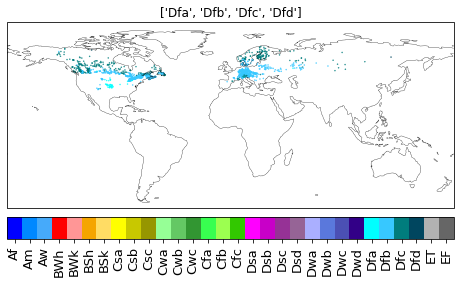

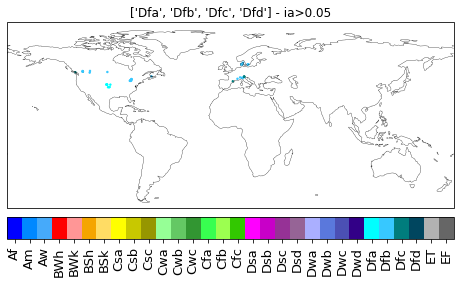

In [324]:
c=['Af','Am','Aw','BWh','BWk','BSh','BSk','Csa','Csb','Csc','Cwa','Cwb','Cwc','Cfa','Cfb','Cfc','Dsa','Dsb','Dsc','Dsd','Dwa','Dwb','Dwc','Dwd','Dfa','Dfb','Dfc','Dfd','ET','EF']
a = ['Af','Am','Aw']
b1 = ['BWh','BWk']
b2 = ['BSh','BSk']
c1 = ['Csa','Csb','Csc']
c2 = ['Cwa','Cwb','Cwc']
c3 = ['Cfa','Cfb','Cfc']
d1 = ['Dsa','Dsb','Dsc','Dsd']
d2 = ['Dwa','Dwb','Dwc','Dwd']
d3 = ['Dfa','Dfb','Dfc','Dfd']
e = [a,b1,b2,c1,c2,c3,d1,d2,d3]
for i in range(len(e)):
    k = e[i]
    if (len(k)==2):
        czz = cz[(cz.kg==k[0])|(cz.kg==k[1])]
    if (len(k)==3):
        czz = cz[(cz.kg==k[0])|(cz.kg==k[1])|(cz.kg==k[2])]
    if (len(k)==4):
        czz = cz[(cz.kg==k[0])|(cz.kg==k[1])|(cz.kg==k[2])|(cz.kg==k[3])]
    bounds = np.linspace(0,30,31)
    bounds2 = np.linspace(0,30,31)
    norm = mpl.colors.BoundaryNorm(bounds, cm_kg.N)

    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(linewidth=0.3)
    ax.set_xlim(-180,180)
    ax.set_ylim(-60,90)
    s = ax.scatter(czz.lon,czz.lat,c=czz.med,s=0.2,cmap=cm_kg, norm=norm)
    cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02, norm=norm,ticks=bounds2)
    cbar.set_ticks(np.arange(0.5,30,1))
    cbar.set_ticklabels(c,rotation=90,size=13)
    ax.set_title(f'{k}')
    fig.savefig(f'{fig_dir}/koppen_figures/kg_subgroups_{k}.jpg',bbox_inches='tight',dpi=300)

    cz2 = czz[czz.ir>0.05]
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(linewidth=0.3)
    ax.set_xlim(-180,180)
    ax.set_ylim(-60,90)
    s = ax.scatter(cz2.lon,cz2.lat,c=cz2.med,s=2,cmap=cm_kg, norm=norm)
    cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02, norm=norm,ticks=bounds2)
    cbar.set_ticks(np.arange(0.5,30,1))
    cbar.set_ticklabels(c,rotation=90,size=13)
    ax.set_title(f'{k} - ia>0.05')
    fig.savefig(f'{fig_dir}/koppen_figures/kg_subgroups_Ia_{k}.jpg',bbox_inches='tight',dpi=300)

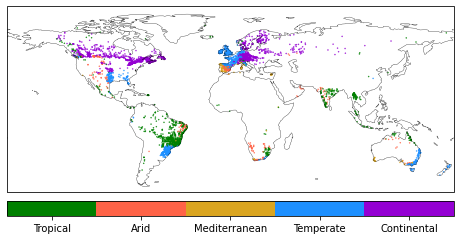

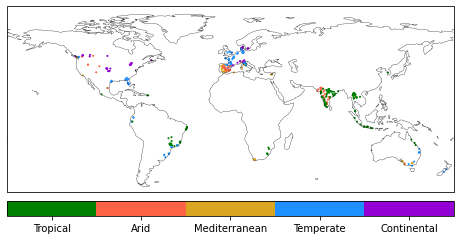

In [325]:
cz['cl'] = np.zeros(len(cz))
# tropical
ix = cz[(cz['kg']=='Af')|(cz['kg']=='Aw')|(cz['kg']=='Am')].index
cz.loc[ix,'cl'] = 1

# arid
ix = cz[(cz['kg']=='BWh')|(cz['kg']=='BWk')|(cz['kg']=='BSh')|(cz['kg']=='BSk')].index
cz.loc[ix,'cl'] = 2

# mediterranean
ix = cz[(cz['kg']=='Csa')|(cz['kg']=='Csb')|(cz['kg']=='Csc')].index
cz.loc[ix,'cl'] = 3

# temperate
ix = cz[(cz['kg']=='Cfa')|(cz['kg']=='Cfb')|(cz['kg']=='Cfc')].index
cz.loc[ix,'cl'] = 4

# continental
ix = cz[(cz['kg']=='Dfa')|(cz['kg']=='Dfb')|(cz['kg']=='Dfc')|(cz['kg']=='Dfd')].index
cz.loc[ix,'cl'] = 5

colors=['green','tomato','goldenrod','dodgerblue','darkviolet']
cm_cl = ListedColormap(colors)
bounds = np.linspace(1,6,6)
bounds2 = np.linspace(1,6,6)
norm = mpl.colors.BoundaryNorm(bounds, cm_cl.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cz.lon,cz.lat,c=cz.cl,s=0.2,cmap=cm_cl, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02, norm=norm,ticks=bounds2,aspect=30)
cbar.set_ticks(np.arange(1.5,6.5,1))
cbar.set_ticklabels(['Tropical','Arid','Mediterranean','Temperate','Continental'],rotation=0,size=10)
fig.savefig(f'{fig_dir}/climate_zones_map_allcatch.jpg',bbox_inches='tight',dpi=300)

cz2 = cz[cz.ir>0.05]
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cz2.lon,cz2.lat,c=cz2.cl,s=1,cmap=cm_cl, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02, norm=norm,ticks=bounds2,aspect=30)
cbar.set_ticks(np.arange(1.5,6.5,1))
cbar.set_ticklabels(['Tropical','Arid','Mediterranean','Temperate','Continental'],rotation=0,size=10)
fig.savefig(f'{fig_dir}/climate_zones_map_ia05.jpg',bbox_inches='tight',dpi=300)


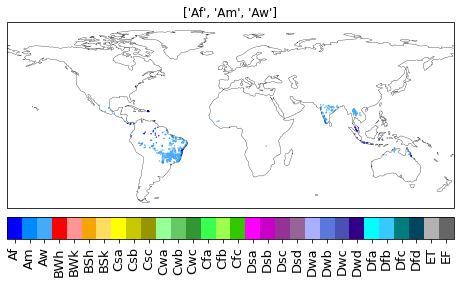

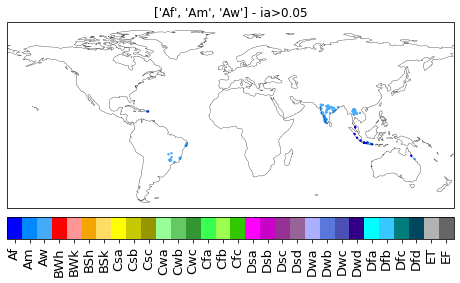

In [326]:
c=['Af','Am','Aw','BWh','BWk','BSh','BSk','Csa','Csb','Csc','Cwa','Cwb','Cwc','Cfa','Cfb','Cfc','Dsa','Dsb','Dsc','Dsd','Dwa','Dwb','Dwc','Dwd','Dfa','Dfb','Dfc','Dfd','ET','EF']
a = ['Af','Am','Aw']
b1 = ['BWh','BWk']
b2 = ['BSh','BSk']
c1 = ['Csa','Csb','Csc']
c2 = ['Cwa','Cwb','Cwc']
c3 = ['Cfa','Cfb','Cfc']
d1 = ['Dsa','Dsb','Dsc','Dsd']
d2 = ['Dwa','Dwb','Dwc','Dwd']
d3 = ['Dfa','Dfb','Dfc','Dfd']
e = [a]#,b1,b2,c1,c2,c3,d1,d2,d3]
for i in range(len(e)):
    k = e[i]
    if (len(k)==2):
        czz = cz[(cz.kg==k[0])|(cz.kg==k[1])]
    if (len(k)==3):
        czz = cz[(cz.kg==k[0])|(cz.kg==k[1])|(cz.kg==k[2])]
    if (len(k)==4):
        czz = cz[(cz.kg==k[0])|(cz.kg==k[1])|(cz.kg==k[2])|(cz.kg==k[3])]
    bounds = np.linspace(0,30,31)
    bounds2 = np.linspace(0,30,31)
    norm = mpl.colors.BoundaryNorm(bounds, cm_kg.N)

    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(linewidth=0.3)
    ax.set_xlim(-180,180)
    ax.set_ylim(-60,90)
    s = ax.scatter(czz.lon,czz.lat,c=czz.med,s=0.2,cmap=cm_kg, norm=norm)
    cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02, norm=norm,ticks=bounds2)
    cbar.set_ticks(np.arange(0.5,30,1))
    cbar.set_ticklabels(c,rotation=90,size=13)
    ax.set_title(f'{k}')
    # fig.savefig(f'{fig_dir}/koppen_figures/kg_subgroups_{k}.jpg',bbox_inches='tight',dpi=300)

    cz2 = czz[czz.ir>0.05]
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(linewidth=0.3)
    ax.set_xlim(-180,180)
    ax.set_ylim(-60,90)
    s = ax.scatter(cz2.lon,cz2.lat,c=cz2.med,s=2,cmap=cm_kg, norm=norm)
    cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02, norm=norm,ticks=bounds2)
    cbar.set_ticks(np.arange(0.5,30,1))
    cbar.set_ticklabels(c,rotation=90,size=13)
    ax.set_title(f'{k} - ia>0.05')
    # fig.savefig(f'{fig_dir}/koppen_figures/kg_subgroups_Ia_{k}.jpg',bbox_inches='tight',dpi=300)


In [327]:
# c1 = '#4059AD'
# c2 = '#6B9AC4'
# c3 = '#F4B942'
# c4 = '#97D8C4'

# c1 = '#D81B60'
# c2 = '#1E88E5'
# c3 = '#FFC107'

c2= '#00A4CCFF'
c3 = '#F95700FF'

In [347]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points2.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

# sr_df = sr_df.astype(int) #int values
                
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)
fopt_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_fopt,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
fopt_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt ,4) 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

e_df = e_df*-1

In [348]:
data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)

er_df['lat'] = c.lat
er_df['lon'] = c.lon
e_df['lat'] = c.lat
e_df['lon'] = c.lon
e_df['cz'] =cz.kg
er_df['cz'] =cz.kg

a = ['Af','Am','Aw']
b1 = ['BWh','BWk']
b2 = ['BSh','BSk']
cz1 = ['Csa','Csb','Csc']
cz2 = ['Cwa','Cwb','Cwc']
cz3 = ['Cfa','Cfb','Cfc']
d1 = ['Dsa','Dsb','Dsc','Dsd']
d2 = ['Dwa','Dwb','Dwc','Dwd']
d3 = ['Dfa','Dfb','Dfc','Dfd']

e_df_tr = e_df[(e_df.cz==a[0])|(e_df.cz==a[1])|(e_df.cz==a[2])]
e_df_a = e_df[(e_df.cz==b1[0])|(e_df.cz==b1[1])|(e_df.cz==b2[0])|(e_df.cz==b2[1])]
e_df_tm = e_df[(e_df.cz==cz3[0])|(e_df.cz==cz3[1])|(e_df.cz==cz3[2])]
e_df_m = e_df[(e_df.cz==cz1[0])|(e_df.cz==cz1[1])|(e_df.cz==cz1[2])]
e_df_c = e_df[(e_df.cz==d3[0])|(e_df.cz==d3[1])|(e_df.cz==d3[2])|(e_df.cz==d3[3])]

er_df_tr = er_df[(er_df.cz==a[0])|(er_df.cz==a[1])|(er_df.cz==a[2])]
er_df_a = er_df[(er_df.cz==b1[0])|(er_df.cz==b1[1])|(er_df.cz==b2[0])|(er_df.cz==b2[1])]
er_df_tm = er_df[(er_df.cz==cz3[0])|(er_df.cz==cz3[1])|(er_df.cz==cz3[2])]
er_df_m = er_df[(er_df.cz==cz1[0])|(er_df.cz==cz1[1])|(er_df.cz==cz1[2])]
er_df_c = er_df[(er_df.cz==d3[0])|(er_df.cz==d3[1])|(er_df.cz==d3[2])|(er_df.cz==d3[3])]

e_df_a = e_df_a.dropna()
er_df_a = er_df_a.dropna()
e_df_a=e_df_a.iloc[:,0:2]
er_df_a=er_df_a.iloc[:,0:2]

e_df_tr = e_df_tr.dropna()
er_df_tr = er_df_tr.dropna()
e_df_tr=e_df_tr.iloc[:,0:2]
er_df_tr=er_df_tr.iloc[:,0:2]

e_df_tm = e_df_tm.dropna()
er_df_tm = er_df_tm.dropna()
e_df_tm=e_df_tm.iloc[:,0:2]
er_df_tm=er_df_tm.iloc[:,0:2]

e_df_m = e_df_m.dropna()
er_df_m = er_df_m.dropna()
e_df_m=e_df_m.iloc[:,0:2]
er_df_m=er_df_m.iloc[:,0:2]

e_df_c = e_df_c.dropna()
er_df_c = er_df_c.dropna()
e_df_c=e_df_c.iloc[:,0:2]
er_df_c=er_df_c.iloc[:,0:2]

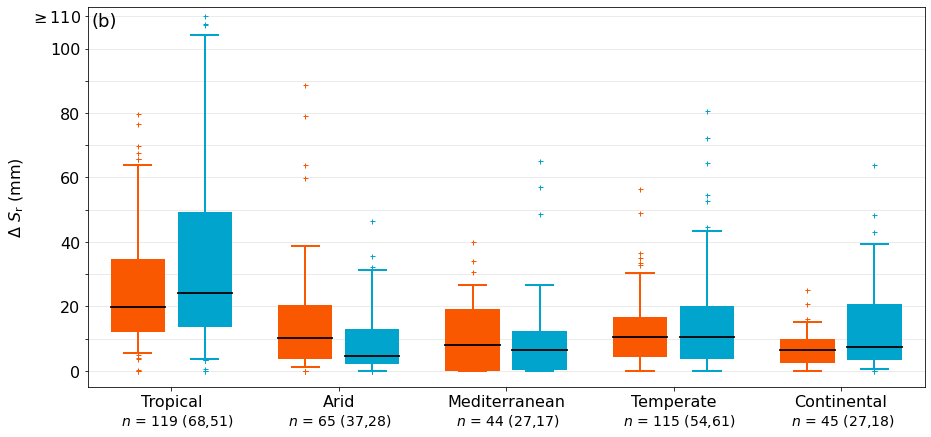

In [375]:
t1= '#00A4CCFF'
t2 = '#F95700FF'

# # t1,t2 = 'lightgreen','darkgreen'
# boxpropst1 = dict(facecolor=t1,color="black",linewidth=0.8)
# boxpropst2 = dict(facecolor=t2,color="black",linewidth=0.8)

# # t1,t2 = 'tomato','darkred'
# boxpropsa1 = dict(facecolor=t1,color="black",linewidth=0.8)
# boxpropsa2 = dict(facecolor=t2,color="black",linewidth=0.8)

# # t1,t2 = 'khaki','darkgoldenrod'
# boxpropsm1 = dict(facecolor=t1,color="black",linewidth=0.8)
# boxpropsm2 = dict(facecolor=t2,color="black",linewidth=0.8)

# # t1,t2 = 'lightblue','mediumblue'
# boxpropstm1 = dict(facecolor=t1,color="black",linewidth=0.8)
# boxpropstm2 = dict(facecolor=t2,color="black",linewidth=0.8)

# # t1,t2 = 'pink','mediumvioletred'
# boxpropsc1 = dict(facecolor=t1,color="black",linewidth=0.8)
# boxpropsc2 = dict(facecolor=t2,color="black",linewidth=0.8)



# medianprops = dict(color="black",linewidth=1.5)
# meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
# flierprops = dict(color='black',marker='+',markersize=5)
# capprops = dict(linestyle='-', linewidth=0.8, color='Black')

boxprops1 = dict(facecolor=c3f,edgecolor=c3e,linewidth=2.5)
boxprops2 = dict(facecolor=c2f,edgecolor=c2e,linewidth=2.5)
# medianprops = dict(color="black",linewidth=1.8)
medianprops1 = dict(color='k',linewidth=1.8)
medianprops2 = dict(color='k',linewidth=1.8)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops1 = dict(marker='+',markeredgecolor=c3,markersize=5)
flierprops2 = dict(marker='+',markeredgecolor=c2,markersize=5)
capprops1 = dict(linestyle='-', linewidth=2.0, color=c3)
whiskerprops1 = dict(linestyle='-', linewidth=2.0, color=c3)
capprops2 = dict(linestyle='-', linewidth=2.0, color=c2)
whiskerprops2 = dict(linestyle='-', linewidth=2.0, color=c2)

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(15,7))

# tropical
e_df = e_df_tr
e_df0 = e_df[(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(axis='y', color='0.9',zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[1.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[1.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(0.55,-108),size=14)
ax.text(0.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# t1,t2 = 'lightgrey','dimgrey'
# boxprops1 = dict(facecolor=t1,color="black",linewidth=0.8)
# boxprops2 = dict(facecolor=t2,color="black",linewidth=0.8)
bpp1=ax.boxplot(e_df1.iloc[:,0],positions=[-9.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bpp2=ax.boxplot(e_df1.iloc[:,1],positions=[-9.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)

# arid
e_df = e_df_a
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(2.55,-108),size=14)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.text(2.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# mediterranean
e_df = e_df_m
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[5.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[5.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(4.55,-108),size=14)
ax.text(4.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# temperate
e_df = e_df_tm
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[7.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[7.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(6.55,-108),size=14)
ax.text(6.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# continental
e_df = e_df_c
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[9.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[9.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(8.55,-108),size=14)
ax.text(8.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)
ax.set_ylim(-5,113)
ax.set_xlim(0.5,10.5)
ax.set_xticks([1.5,3.5,5.5,7.5,9.5])
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
ax.set_yticklabels(['0','','20','','40','','60','','80','','100','$\geq$110'])
# ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(['Tropical','Arid','Mediterranean','Temperate','Continental'],size=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)

# ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
# ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
# ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(8.5,-200,20,color='k',linestyle='--',linewidth=1)

# plot values <-100 at -100
ax.plot(1.9,110,color=c2,marker='+',markersize=5)

p2 = ax.plot(1,-200, marker='d', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p1 = ax.plot(1,-200,'r*',markersize=9)
# ax.legend([bpp1["boxes"][0], bpp2["boxes"][0]],
#           ['IWU $-$ NI','IAF $-$ NI'],
#           ncol=2,fontsize= 17,loc='lower center',bbox_to_anchor=(0.5, -0.18),handletextpad=1,labelspacing=1,columnspacing = 2)
# ax.legend([bpp1["boxes"][0], bpp2["boxes"][0]],
#           ['IWU $-$ NI','IAF $-$ NI'],
#           ncol=2,fontsize= 17,loc='upper center',handletextpad=1,labelspacing=1,columnspacing = 2)
ax.text(0.55,107,'(b)',size=18)

fig.savefig(f'{fig_dir}/box_abs_diff_ia_climates.jpg', dpi=300, bbox_inches='tight')

## COMBINED FIGURE REGIONS AND CLIMATES

In [37]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points2.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

# sr_df = sr_df.astype(int) #int values
                
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)
fopt_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_fopt,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
fopt_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt ,4) 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

# drop pos catchments
# ix_drop = ['us_0006081','br_0000699','za_0000167','us_0005876','us_0004753','ca_0000774'] natchments with sr increasing with irri compared to no-irri
# sr_df = sr_df.drop(index=ix_drop)
# e_df = e_df.drop(index=ix_drop)
# er_df = er_df.drop(index=ix_drop)

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

e_df = e_df*-1

data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)

er_df['lat'] = c.lat
er_df['lon'] = c.lon
e_df['lat'] = c.lat
e_df['lon'] = c.lon

e_df_a = e_df[(e_df.lat<lat_max_a)&(e_df.lat>lat_min_a)&(e_df.lon<lon_max_a)&(e_df.lon>lon_min_a)]
e_df_e = e_df[(e_df.lat<lat_max_e)&(e_df.lat>lat_min_e)&(e_df.lon<lon_max_e)&(e_df.lon>lon_min_e)]
e_df_u = e_df[(e_df.lat<lat_max_u)&(e_df.lat>lat_min_u)&(e_df.lon<lon_max_u)&(e_df.lon>lon_min_u)]
e_df_s = e_df[(e_df.lat<lat_max_s)&(e_df.lat>lat_min_s)&(e_df.lon<lon_max_s)&(e_df.lon>lon_min_s)]

er_df_a = er_df[(er_df.lat<lat_max_a)&(er_df.lat>lat_min_a)&(er_df.lon<lon_max_a)&(er_df.lon>lon_min_a)]
er_df_e = er_df[(er_df.lat<lat_max_e)&(er_df.lat>lat_min_e)&(er_df.lon<lon_max_e)&(er_df.lon>lon_min_e)]
er_df_u = er_df[(er_df.lat<lat_max_u)&(er_df.lat>lat_min_u)&(er_df.lon<lon_max_u)&(er_df.lon>lon_min_u)]
er_df_s = er_df[(er_df.lat<lat_max_s)&(er_df.lat>lat_min_s)&(er_df.lon<lon_max_s)&(er_df.lon>lon_min_s)]

e_df_as = e_df_a.dropna()
er_df_as = er_df_a.dropna()
e_df_as=e_df_as.iloc[:,0:2]
er_df_as=er_df_as.iloc[:,0:2]

e_df_e = e_df_e.dropna()
er_df_e = er_df_e.dropna()
e_df_e=e_df_e.iloc[:,0:2]
er_df_e=er_df_e.iloc[:,0:2]

e_df_s = e_df_s.dropna()
er_df_s = er_df_s.dropna()
e_df_s=e_df_s.iloc[:,0:2]
er_df_s=er_df_s.iloc[:,0:2]

e_df_u = e_df_u.dropna()
er_df_u = er_df_u.dropna()
e_df_u=e_df_u.iloc[:,0:2]
er_df_u=er_df_u.iloc[:,0:2]

In [38]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points2.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

# sr_df = sr_df.astype(int) #int values
                
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)
fopt_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_fopt,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
fopt_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt ,4) 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

e_df = e_df*-1

data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)
cz = pd.read_csv(f'{work_dir}/data/koppen_climates/all_catch_table_kg_climates.csv',index_col=0)

er_df['lat'] = c.lat
er_df['lon'] = c.lon
e_df['lat'] = c.lat
e_df['lon'] = c.lon
e_df['cz'] =cz.kg
er_df['cz'] =cz.kg

a = ['Af','Am','Aw']
b1 = ['BWh','BWk']
b2 = ['BSh','BSk']
cz1 = ['Csa','Csb','Csc']
cz2 = ['Cwa','Cwb','Cwc']
cz3 = ['Cfa','Cfb','Cfc']
d1 = ['Dsa','Dsb','Dsc','Dsd']
d2 = ['Dwa','Dwb','Dwc','Dwd']
d3 = ['Dfa','Dfb','Dfc','Dfd']

e_df_tr = e_df[(e_df.cz==a[0])|(e_df.cz==a[1])|(e_df.cz==a[2])]
e_df_a = e_df[(e_df.cz==b1[0])|(e_df.cz==b1[1])|(e_df.cz==b2[0])|(e_df.cz==b2[1])]
e_df_tm = e_df[(e_df.cz==cz3[0])|(e_df.cz==cz3[1])|(e_df.cz==cz3[2])]
e_df_m = e_df[(e_df.cz==cz1[0])|(e_df.cz==cz1[1])|(e_df.cz==cz1[2])]
e_df_c = e_df[(e_df.cz==d3[0])|(e_df.cz==d3[1])|(e_df.cz==d3[2])|(e_df.cz==d3[3])]

er_df_tr = er_df[(er_df.cz==a[0])|(er_df.cz==a[1])|(er_df.cz==a[2])]
er_df_a = er_df[(er_df.cz==b1[0])|(er_df.cz==b1[1])|(er_df.cz==b2[0])|(er_df.cz==b2[1])]
er_df_tm = er_df[(er_df.cz==cz3[0])|(er_df.cz==cz3[1])|(er_df.cz==cz3[2])]
er_df_m = er_df[(er_df.cz==cz1[0])|(er_df.cz==cz1[1])|(er_df.cz==cz1[2])]
er_df_c = er_df[(er_df.cz==d3[0])|(er_df.cz==d3[1])|(er_df.cz==d3[2])|(er_df.cz==d3[3])]

e_df_a = e_df_a.dropna()
er_df_a = er_df_a.dropna()
e_df_a=e_df_a.iloc[:,0:2]
er_df_a=er_df_a.iloc[:,0:2]

e_df_tr = e_df_tr.dropna()
er_df_tr = er_df_tr.dropna()
e_df_tr=e_df_tr.iloc[:,0:2]
er_df_tr=er_df_tr.iloc[:,0:2]

e_df_tm = e_df_tm.dropna()
er_df_tm = er_df_tm.dropna()
e_df_tm=e_df_tm.iloc[:,0:2]
er_df_tm=er_df_tm.iloc[:,0:2]

e_df_m = e_df_m.dropna()
er_df_m = er_df_m.dropna()
e_df_m=e_df_m.iloc[:,0:2]
er_df_m=er_df_m.iloc[:,0:2]

e_df_c = e_df_c.dropna()
er_df_c = er_df_c.dropna()
e_df_c=e_df_c.iloc[:,0:2]
er_df_c=er_df_c.iloc[:,0:2]

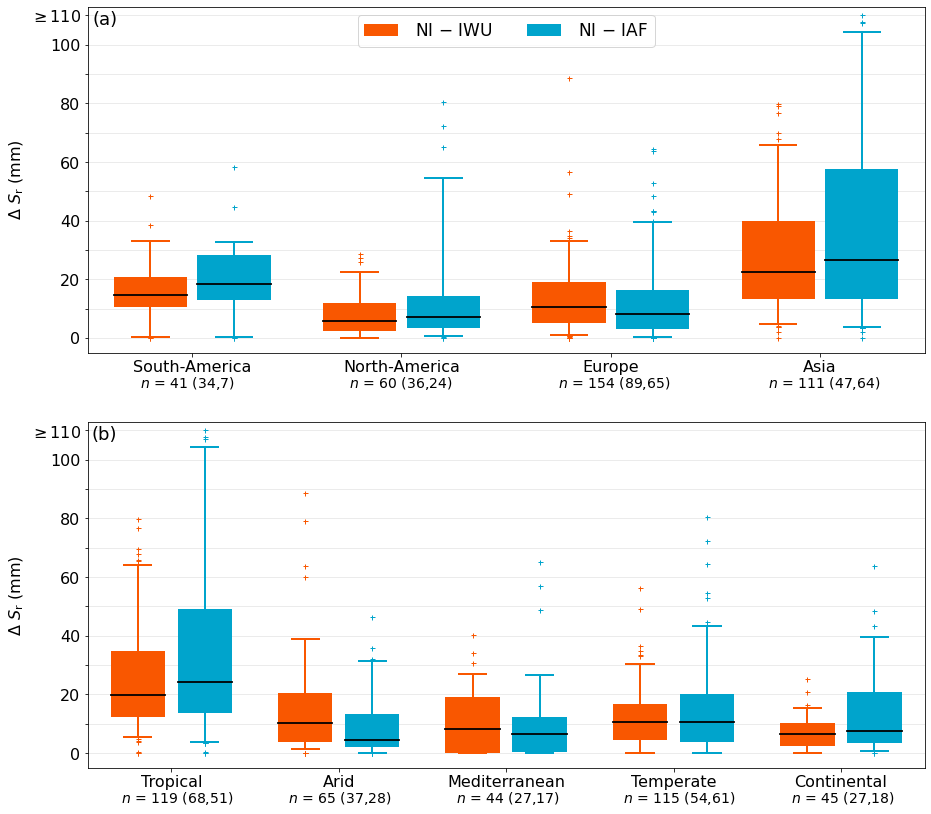

In [40]:
g1 = 'lightgrey'
g2 = 'dimgrey'
c2= '#00A4CCFF'
c3 = '#F95700FF'
c2f = (0, 164/255, 204/255)
c3f = (249/255, 87/255, 0)
c2e = (0, 164/255, 204/255,0)
c3e = (249/255, 87/255, 0,0)

# boxprops1 = dict(facecolor=c2,color="black",linewidth=0.8)
# boxprops2 = dict(facecolor=c3,color="black",linewidth=0.8)
# medianprops = dict(color="black",linewidth=1.5)
# meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
# flierprops = dict(color='black',marker='+',markersize=5)
# capprops = dict(linestyle='-', linewidth=0.8, color='Black')

boxprops1 = dict(facecolor=c3f,edgecolor=c3e,linewidth=2.5)
boxprops2 = dict(facecolor=c2f,edgecolor=c2e,linewidth=2.5)
# medianprops = dict(color="black",linewidth=1.8)
medianprops1 = dict(color='k',linewidth=1.8)
medianprops2 = dict(color='k',linewidth=1.8)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops1 = dict(marker='+',markeredgecolor=c3,markersize=5)
flierprops2 = dict(marker='+',markeredgecolor=c2,markersize=5)
capprops1 = dict(linestyle='-', linewidth=2.0, color=c3)
whiskerprops1 = dict(linestyle='-', linewidth=2.0, color=c3)
capprops2 = dict(linestyle='-', linewidth=2.0, color=c2)
whiskerprops2 = dict(linestyle='-', linewidth=2.0, color=c2)

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(15,14))

# south america
e_df = e_df_s
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
ax = fig.add_subplot(211)
ax.set_axisbelow(True)
ax.grid(axis='y', color='0.9',zorder=0)
bpp1=ax.boxplot(e_df1.iloc[:,0],positions=[1.1],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bpp2=ax.boxplot(e_df1.iloc[:,1],positions=[1.9],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(0.55,-108),size=14)
ax.text(1,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# north america
e_df = e_df_u
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(2.55,-108),size=14)
ax.text(3,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)
p2 = ax.plot(1,-200,'r*',markersize=9)

# europe
e_df = e_df_e
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[5.1],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[5.9],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(4.55,-108),size=14)
ax.text(5,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)
p2 = ax.plot(1,-200,'r*',markersize=9)

# asia
e_df = e_df_as
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
# e_df1.loc[['in_0000052','in_0000053'],'f0_fopt']=-100
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[7.1],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[7.9],widths=0.7,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(6.55,-108),size=14)
ax.text(7,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)
ax.set_ylim(-5,113)
ax.set_xlim(0.5,8.5)
ax.set_xticks([1.5,3.5,5.5,7.5])
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
ax.set_yticklabels(['0','','20','','40','','60','','80','','100','$\geq$110'])
# ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(['South-America','North-America','Europe','Asia'],size=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)

# ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
# ax.hlines(-110,0,10,color='k',linestyle=':',linewidth=0.7)
# ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)

# ax.text(1.1,-17,'$n$ = '+str(e_df0.count()[0]),size=14)
# ax.text(3.15,-17,'$n$ = '+str(e_df1.count()[0]),size=14)
# ax.text(5.15,-17,'$n$ = '+str(e_df5.count()[0]),size=14)
# ax.text(7.2,-17,'$n$ = '+str(e_df10.count()[0]),size=14)

# plot values <-110 at -110
ax.plot(7.9,110,color=c2,marker='+',markersize=5)
ax.text(0.55,107,'(a)',size=18)

ax.legend([bpp1["boxes"][0], bpp2["boxes"][0]],
          ['NI $-$ IWU','NI $-$ IAF'],
          ncol=2,fontsize= 17,loc='upper center',handletextpad=1,labelspacing=1,columnspacing = 2)

boxprops1 = dict(facecolor=c3f,edgecolor=c3e,linewidth=2.5)
boxprops2 = dict(facecolor=c2f,edgecolor=c2e,linewidth=2.5)
# medianprops = dict(color="black",linewidth=1.8)
medianprops1 = dict(color='k',linewidth=1.8)
medianprops2 = dict(color='k',linewidth=1.8)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops1 = dict(marker='+',markeredgecolor=c3,markersize=5)
flierprops2 = dict(marker='+',markeredgecolor=c2,markersize=5)
capprops1 = dict(linestyle='-', linewidth=2.0, color=c3)
whiskerprops1 = dict(linestyle='-', linewidth=2.0, color=c3)
capprops2 = dict(linestyle='-', linewidth=2.0, color=c2)
whiskerprops2 = dict(linestyle='-', linewidth=2.0, color=c2)

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# boxplot of Sr differences - ABS
# fig = plt.figure(figsize=(15,7))

# tropical
e_df = e_df_tr
e_df0 = e_df[(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
ax = fig.add_subplot(212)
ax.set_axisbelow(True)
ax.grid(axis='y', color='0.9',zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[1.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[1.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(0.55,-108),size=14)
ax.text(0.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# t1,t2 = 'lightgrey','dimgrey'
# boxprops1 = dict(facecolor=t1,color="black",linewidth=0.8)
# boxprops2 = dict(facecolor=t2,color="black",linewidth=0.8)
bpp1=ax.boxplot(e_df1.iloc[:,0],positions=[-9.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bpp2=ax.boxplot(e_df1.iloc[:,1],positions=[-9.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)

# arid
e_df = e_df_a
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(2.55,-108),size=14)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.text(2.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# mediterranean
e_df = e_df_m
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[5.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[5.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(4.55,-108),size=14)
ax.text(4.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# temperate
e_df = e_df_tm
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[7.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[7.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(6.55,-108),size=14)
ax.text(6.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# continental
e_df = e_df_c
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[9.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[9.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(8.55,-108),size=14)
ax.text(8.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)
ax.set_ylim(-5,113)
ax.set_xlim(0.5,10.5)
ax.set_xticks([1.5,3.5,5.5,7.5,9.5])
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
ax.set_yticklabels(['0','','20','','40','','60','','80','','100','$\geq$110'])
# ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(['Tropical','Arid','Mediterranean','Temperate','Continental'],size=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)

# ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
# ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
# ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(8.5,-200,20,color='k',linestyle='--',linewidth=1)

# plot values <-100 at -100
ax.plot(1.9,110,color=c2,marker='+',markersize=5)

p2 = ax.plot(1,-200, marker='d', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p1 = ax.plot(1,-200,'r*',markersize=9)
# ax.legend([bpp1["boxes"][0], bpp2["boxes"][0]],
#           ['IWU $-$ NI','IAF $-$ NI'],
#           ncol=2,fontsize= 17,loc='lower center',bbox_to_anchor=(0.5, -0.18),handletextpad=1,labelspacing=1,columnspacing = 2)
# ax.legend([bpp1["boxes"][0], bpp2["boxes"][0]],
#           ['IWU $-$ NI','IAF $-$ NI'],
#           ncol=2,fontsize= 17,loc='upper center',handletextpad=1,labelspacing=1,columnspacing = 2)
ax.text(0.55,107,'(b)',size=18)

fig.savefig(f'{fig_dir}/box_abs_diff_ia_regions_climates.jpg', dpi=300, bbox_inches='tight')

# fig.savefig(f'{fig_dir}/box_abs_diff_ia_regions.jpg', dpi=300, bbox_inches='tight')

In [347]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points2.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

# sr_df = sr_df.astype(int) #int values
                
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)
fopt_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_fopt,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
fopt_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt ,4) 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

e_df = e_df*-1

In [348]:
data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)

er_df['lat'] = c.lat
er_df['lon'] = c.lon
e_df['lat'] = c.lat
e_df['lon'] = c.lon
e_df['cz'] =cz.kg
er_df['cz'] =cz.kg

a = ['Af','Am','Aw']
b1 = ['BWh','BWk']
b2 = ['BSh','BSk']
cz1 = ['Csa','Csb','Csc']
cz2 = ['Cwa','Cwb','Cwc']
cz3 = ['Cfa','Cfb','Cfc']
d1 = ['Dsa','Dsb','Dsc','Dsd']
d2 = ['Dwa','Dwb','Dwc','Dwd']
d3 = ['Dfa','Dfb','Dfc','Dfd']

e_df_tr = e_df[(e_df.cz==a[0])|(e_df.cz==a[1])|(e_df.cz==a[2])]
e_df_a = e_df[(e_df.cz==b1[0])|(e_df.cz==b1[1])|(e_df.cz==b2[0])|(e_df.cz==b2[1])]
e_df_tm = e_df[(e_df.cz==cz3[0])|(e_df.cz==cz3[1])|(e_df.cz==cz3[2])]
e_df_m = e_df[(e_df.cz==cz1[0])|(e_df.cz==cz1[1])|(e_df.cz==cz1[2])]
e_df_c = e_df[(e_df.cz==d3[0])|(e_df.cz==d3[1])|(e_df.cz==d3[2])|(e_df.cz==d3[3])]

er_df_tr = er_df[(er_df.cz==a[0])|(er_df.cz==a[1])|(er_df.cz==a[2])]
er_df_a = er_df[(er_df.cz==b1[0])|(er_df.cz==b1[1])|(er_df.cz==b2[0])|(er_df.cz==b2[1])]
er_df_tm = er_df[(er_df.cz==cz3[0])|(er_df.cz==cz3[1])|(er_df.cz==cz3[2])]
er_df_m = er_df[(er_df.cz==cz1[0])|(er_df.cz==cz1[1])|(er_df.cz==cz1[2])]
er_df_c = er_df[(er_df.cz==d3[0])|(er_df.cz==d3[1])|(er_df.cz==d3[2])|(er_df.cz==d3[3])]

e_df_a = e_df_a.dropna()
er_df_a = er_df_a.dropna()
e_df_a=e_df_a.iloc[:,0:2]
er_df_a=er_df_a.iloc[:,0:2]

e_df_tr = e_df_tr.dropna()
er_df_tr = er_df_tr.dropna()
e_df_tr=e_df_tr.iloc[:,0:2]
er_df_tr=er_df_tr.iloc[:,0:2]

e_df_tm = e_df_tm.dropna()
er_df_tm = er_df_tm.dropna()
e_df_tm=e_df_tm.iloc[:,0:2]
er_df_tm=er_df_tm.iloc[:,0:2]

e_df_m = e_df_m.dropna()
er_df_m = er_df_m.dropna()
e_df_m=e_df_m.iloc[:,0:2]
er_df_m=er_df_m.iloc[:,0:2]

e_df_c = e_df_c.dropna()
er_df_c = er_df_c.dropna()
e_df_c=e_df_c.iloc[:,0:2]
er_df_c=er_df_c.iloc[:,0:2]

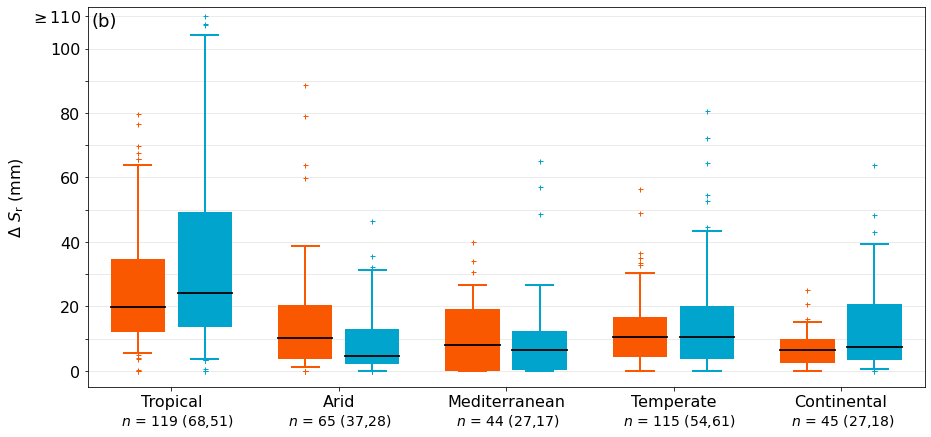

In [375]:
t1= '#00A4CCFF'
t2 = '#F95700FF'

# # t1,t2 = 'lightgreen','darkgreen'
# boxpropst1 = dict(facecolor=t1,color="black",linewidth=0.8)
# boxpropst2 = dict(facecolor=t2,color="black",linewidth=0.8)

# # t1,t2 = 'tomato','darkred'
# boxpropsa1 = dict(facecolor=t1,color="black",linewidth=0.8)
# boxpropsa2 = dict(facecolor=t2,color="black",linewidth=0.8)

# # t1,t2 = 'khaki','darkgoldenrod'
# boxpropsm1 = dict(facecolor=t1,color="black",linewidth=0.8)
# boxpropsm2 = dict(facecolor=t2,color="black",linewidth=0.8)

# # t1,t2 = 'lightblue','mediumblue'
# boxpropstm1 = dict(facecolor=t1,color="black",linewidth=0.8)
# boxpropstm2 = dict(facecolor=t2,color="black",linewidth=0.8)

# # t1,t2 = 'pink','mediumvioletred'
# boxpropsc1 = dict(facecolor=t1,color="black",linewidth=0.8)
# boxpropsc2 = dict(facecolor=t2,color="black",linewidth=0.8)



# medianprops = dict(color="black",linewidth=1.5)
# meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
# flierprops = dict(color='black',marker='+',markersize=5)
# capprops = dict(linestyle='-', linewidth=0.8, color='Black')

boxprops1 = dict(facecolor=c3f,edgecolor=c3e,linewidth=2.5)
boxprops2 = dict(facecolor=c2f,edgecolor=c2e,linewidth=2.5)
# medianprops = dict(color="black",linewidth=1.8)
medianprops1 = dict(color='k',linewidth=1.8)
medianprops2 = dict(color='k',linewidth=1.8)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops1 = dict(marker='+',markeredgecolor=c3,markersize=5)
flierprops2 = dict(marker='+',markeredgecolor=c2,markersize=5)
capprops1 = dict(linestyle='-', linewidth=2.0, color=c3)
whiskerprops1 = dict(linestyle='-', linewidth=2.0, color=c3)
capprops2 = dict(linestyle='-', linewidth=2.0, color=c2)
whiskerprops2 = dict(linestyle='-', linewidth=2.0, color=c2)

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(15,7))

# tropical
e_df = e_df_tr
e_df0 = e_df[(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(axis='y', color='0.9',zorder=0)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[1.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[1.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(0.55,-108),size=14)
ax.text(0.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# t1,t2 = 'lightgrey','dimgrey'
# boxprops1 = dict(facecolor=t1,color="black",linewidth=0.8)
# boxprops2 = dict(facecolor=t2,color="black",linewidth=0.8)
bpp1=ax.boxplot(e_df1.iloc[:,0],positions=[-9.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bpp2=ax.boxplot(e_df1.iloc[:,1],positions=[-9.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)

# arid
e_df = e_df_a
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(2.55,-108),size=14)
p2 = ax.plot(1,-200,'r*',markersize=9)
ax.text(2.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# mediterranean
e_df = e_df_m
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[5.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[5.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(4.55,-108),size=14)
ax.text(4.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# temperate
e_df = e_df_tm
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[7.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[7.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(6.55,-108),size=14)
ax.text(6.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)

# continental
e_df = e_df_c
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[9.1],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops1,meanprops=meanpointprops,whiskerprops=whiskerprops1,flierprops=flierprops1,capprops=capprops1,zorder=1)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[9.9],widths=0.65,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops2,meanprops=meanpointprops,whiskerprops=whiskerprops2,flierprops=flierprops2,capprops=capprops2,zorder=1)
# ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(8.55,-108),size=14)
ax.text(8.9,-17,'$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',size=14)
ax.set_ylim(-5,113)
ax.set_xlim(0.5,10.5)
ax.set_xticks([1.5,3.5,5.5,7.5,9.5])
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
ax.set_yticklabels(['0','','20','','40','','60','','80','','100','$\geq$110'])
# ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(['Tropical','Arid','Mediterranean','Temperate','Continental'],size=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)

# ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
# ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
# ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)
# ax.vlines(8.5,-200,20,color='k',linestyle='--',linewidth=1)

# plot values <-100 at -100
ax.plot(1.9,110,color=c2,marker='+',markersize=5)

p2 = ax.plot(1,-200, marker='d', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p1 = ax.plot(1,-200,'r*',markersize=9)
# ax.legend([bpp1["boxes"][0], bpp2["boxes"][0]],
#           ['IWU $-$ NI','IAF $-$ NI'],
#           ncol=2,fontsize= 17,loc='lower center',bbox_to_anchor=(0.5, -0.18),handletextpad=1,labelspacing=1,columnspacing = 2)
# ax.legend([bpp1["boxes"][0], bpp2["boxes"][0]],
#           ['IWU $-$ NI','IAF $-$ NI'],
#           ncol=2,fontsize= 17,loc='upper center',handletextpad=1,labelspacing=1,columnspacing = 2)
ax.text(0.55,107,'(b)',size=18)

fig.savefig(f'{fig_dir}/box_abs_diff_ia_climates.jpg', dpi=300, bbox_inches='tight')

Text(0.5, 0, 'rel-delta Sr IWU (-)')

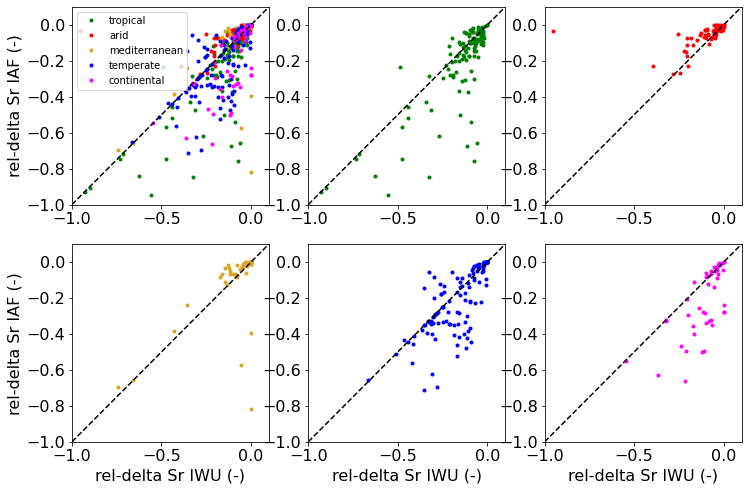

In [107]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(231)
ax.plot(dtr['f0_fiwu'],dtr['f0_fopt'],'o',markersize=3,label='tropical',color='green')
ax.plot(da['f0_fiwu'],da['f0_fopt'],'o',markersize=3,label='arid',color='red')
ax.plot(dm['f0_fiwu'],dm['f0_fopt'],'o',markersize=3,label='mediterranean',color='goldenrod')
ax.plot(dtm['f0_fiwu'],dtm['f0_fopt'],'o',markersize=3,label='temperate',color='blue')
ax.plot(dc['f0_fiwu'],dc['f0_fopt'],'o',markersize=3,label='continental',color='magenta')
ax.plot([-1,1],[-1,1],'k--')
ax.set_xlim(-1,0.1)
ax.set_ylim(-1,0.1)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('rel-delta Sr IAF (-)',size=16)
ax.legend()

ax = fig.add_subplot(232)
ax.plot(dtr['f0_fiwu'],dtr['f0_fopt'],'o',markersize=3,label='tropical',color='green')
ax.plot([-1,1],[-1,1],'k--')
ax.set_xlim(-1,0.1)
ax.set_ylim(-1,0.1)
ax.tick_params(axis='both', which='major', labelsize=16)

ax = fig.add_subplot(233)
ax.plot(da['f0_fiwu'],da['f0_fopt'],'o',markersize=3,label='arid',color='red')
ax.plot([-1,1],[-1,1],'k--')
ax.set_xlim(-1,0.1)
ax.set_ylim(-1,0.1)
ax.tick_params(axis='both', which='major', labelsize=16)

ax = fig.add_subplot(234)
ax.plot(dm['f0_fiwu'],dm['f0_fopt'],'o',markersize=3,label='mediterranean',color='goldenrod')
ax.plot([-1,1],[-1,1],'k--')
ax.set_xlim(-1,0.1)
ax.set_ylim(-1,0.1)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('rel-delta Sr IAF (-)',size=16)
ax.set_xlabel('rel-delta Sr IWU (-)',size=16)

ax = fig.add_subplot(235)
ax.plot(dtm['f0_fiwu'],dtm['f0_fopt'],'o',markersize=3,label='temperate',color='blue')
ax.plot([-1,1],[-1,1],'k--')
ax.set_xlim(-1,0.1)
ax.set_ylim(-1,0.1)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('rel-delta Sr IWU (-)',size=16)

ax = fig.add_subplot(236)
ax.plot(dc['f0_fiwu'],dc['f0_fopt'],'o',markersize=3,label='continental',color='magenta')
ax.plot([-1,1],[-1,1],'k--')
ax.set_xlim(-1,0.1)
ax.set_ylim(-1,0.1)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('rel-delta Sr IWU (-)',size=16)


In [108]:
dtr = e_df_tr[ir>0.05]
da = e_df_a[ir>0.05]
dm = e_df_m[ir>0.05]
dtm = e_df_tm[ir>0.05]
dc = e_df_c[ir>0.05]

Text(0.5, 0, 'abs-delta Sr IWU (mm)')

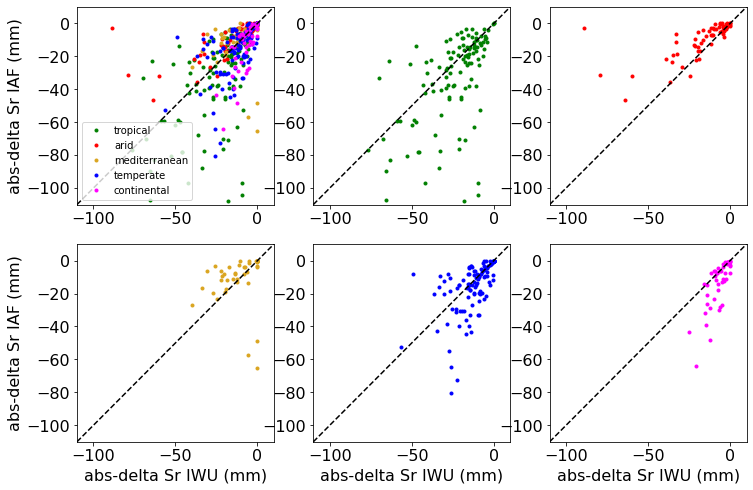

In [111]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(231)
ax.plot(dtr['f0_fiwu'],dtr['f0_fopt'],'o',markersize=3,label='tropical',color='green')
ax.plot(da['f0_fiwu'],da['f0_fopt'],'o',markersize=3,label='arid',color='red')
ax.plot(dm['f0_fiwu'],dm['f0_fopt'],'o',markersize=3,label='mediterranean',color='goldenrod')
ax.plot(dtm['f0_fiwu'],dtm['f0_fopt'],'o',markersize=3,label='temperate',color='blue')
ax.plot(dc['f0_fiwu'],dc['f0_fopt'],'o',markersize=3,label='continental',color='magenta')
ax.plot([-110,10],[-110,10],'k--')
ax.set_xlim(-110,10)
ax.set_ylim(-110,10)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('abs-delta Sr IAF (mm)',size=16)
ax.legend()

ax = fig.add_subplot(232)
ax.plot(dtr['f0_fiwu'],dtr['f0_fopt'],'o',markersize=3,label='tropical',color='green')
ax.plot([-110,10],[-110,10],'k--')
ax.set_xlim(-110,10)
ax.set_ylim(-110,10)
ax.tick_params(axis='both', which='major', labelsize=16)

ax = fig.add_subplot(233)
ax.plot(da['f0_fiwu'],da['f0_fopt'],'o',markersize=3,label='arid',color='red')
ax.plot([-110,10],[-110,10],'k--')
ax.set_xlim(-110,10)
ax.set_ylim(-110,10)
ax.tick_params(axis='both', which='major', labelsize=16)

ax = fig.add_subplot(234)
ax.plot(dm['f0_fiwu'],dm['f0_fopt'],'o',markersize=3,label='mediterranean',color='goldenrod')
ax.plot([-110,10],[-110,10],'k--')
ax.set_xlim(-110,10)
ax.set_ylim(-110,10)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('abs-delta Sr IAF (mm)',size=16)
ax.set_xlabel('abs-delta Sr IWU (mm)',size=16)

ax = fig.add_subplot(235)
ax.plot(dtm['f0_fiwu'],dtm['f0_fopt'],'o',markersize=3,label='temperate',color='blue')
ax.plot([-110,10],[-110,10],'k--')
ax.set_xlim(-110,10)
ax.set_ylim(-110,10)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('abs-delta Sr IWU (mm)',size=16)

ax = fig.add_subplot(236)
ax.plot(dc['f0_fiwu'],dc['f0_fopt'],'o',markersize=3,label='continental',color='magenta')
ax.plot([-110,10],[-110,10],'k--')
ax.set_xlim(-110,10)
ax.set_ylim(-110,10)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('abs-delta Sr IWU (mm)',size=16)


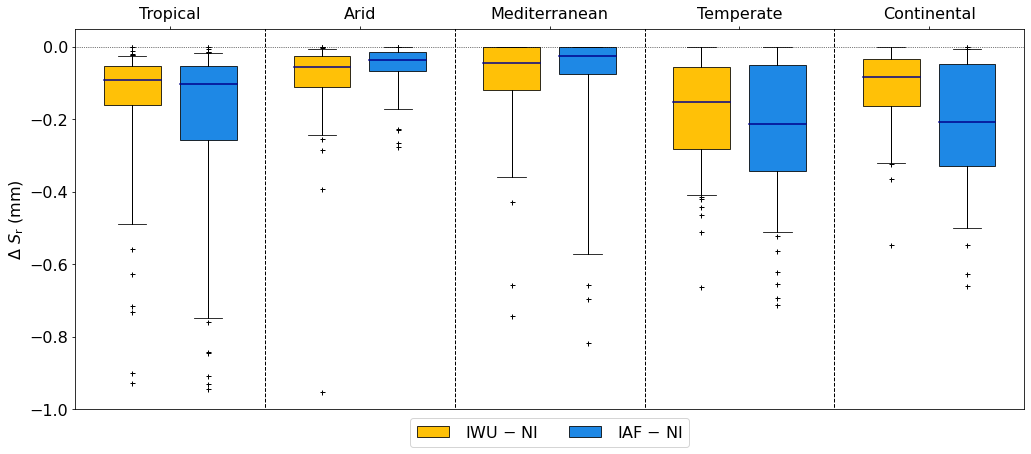

In [52]:
boxprops1 = dict(facecolor=c3,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=c2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(17,7))

# tropical
e_df = er_df_tr
e_df0 = e_df[(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
ax = fig.add_subplot(111)
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[1.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[1.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(0.55,-98),size=14)

# arid
e_df = er_df_a
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(2.55,-98),size=14)
p2 = ax.plot(1,-200,'r*',markersize=9)

# mediterranean
e_df = er_df_m
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[5.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[5.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(4.55,-98),size=14)
p2 = ax.plot(1,-200,'r*',markersize=9)

# temperate
e_df = er_df_tm
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)]
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[7.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[7.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(6.55,-98),size=14)
p2 = ax.plot(1,-200,'r*',markersize=9)

# continental
e_df = er_df_c
e_df0 = e_df[(ir>0)&(ir<=0.05)]
e_df1 = e_df[(ir>0.05)] 
e_df2 = e_df[(ir>0.05)&(ir<=0.1)]
e_df3 = e_df[(ir>0.1)]
bp1=ax.boxplot(e_df1.iloc[:,0],positions=[9.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df1.iloc[:,1],positions=[9.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.annotate('$n$ = '+str(e_df1.count()[0])+' ('+str(e_df2.count()[0])+','+str(e_df3.count()[0])+')',(8.55,-98),size=14)
ax.set_ylim(-1,0.05)
ax.set_xlim(0.5,10.5)
ax.set_xticks([1.5,3.5,5.5,7.5,9.5])
# ax.set_yticks([0,-20,-40,-60,-80,-100])
# ax.set_yticklabels([0,20,40,60,80,'>100'])
ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(['Tropical','Arid','Mediterranean','Temperate','Continental'],size=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)

ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-100,0,11,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(8.5,-200,20,color='k',linestyle='--',linewidth=1)

# plot values <-100 at -100
ax.plot(7.9,-100.591,color='white',marker='+',markersize=5)
ax.plot(7.9,-100.33,color='white',marker='+',markersize=5)
ax.plot(7.9,-101.408,color='white',marker='+',markersize=5)
ax.plot(7.9,-100.29,color='white',marker='+',markersize=5)
ax.plot(7.1,-100,color='black',marker='+',markersize=5)
ax.plot(7.9,-100,color='black',marker='+',markersize=5)

p2 = ax.plot(1,-200, marker='d', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p1 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([bp1["boxes"][0], bp2["boxes"][0]],
          ['IWU $-$ NI','IAF $-$ NI'],
          ncol=2,fontsize= 16,loc='lower center',bbox_to_anchor=(0.5, -0.12),handletextpad=1,labelspacing=1,columnspacing = 2)

fig.savefig(f'{fig_dir}/box_rel_diff_ia_climates.jpg', dpi=300, bbox_inches='tight')


In [53]:
e_df0 = e_df_tr[(ir>0.05)] 
e_df1 = e_df_a[(ir>0.05)] 
e_df2 = e_df_m[(ir>0.05)] 
e_df3 = e_df_tm[(ir>0.05)] 
e_df4 = e_df_c[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
# d['std0']=np.round(e_df0.std(),2).values
# d['iqr0']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values
d['q250']=np.round((e_df0.quantile(0.25)),2).values
d['q750']=np.round((e_df0.quantile(0.75)),2).values

d['med1']=np.round(e_df1.median(),2).values
# d['std1']=np.round(e_df1.std(),2).values
# d['iqr1']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values
d['q251']=np.round((e_df1.quantile(0.25)),2).values
d['q751']=np.round((e_df1.quantile(0.75)),2).values

d['med2']=np.round(e_df2.median(),2).values
# d['std2']=np.round(e_df2.std(),2).values
# d['iqr2']=np.round((e_df2.quantile(0.75)-e_df2.quantile(0.25)),2).values
d['q252']=np.round((e_df2.quantile(0.25)),2).values
d['q752']=np.round((e_df2.quantile(0.75)),2).values

d['med3']=np.round(e_df3.median(),2).values
# d['std3']=np.round(e_df3.std(),2).values
# d['iqr3']=np.round((e_df3.quantile(0.75)-e_df3.quantile(0.25)),2).values
d['q253']=np.round((e_df3.quantile(0.25)),2).values
d['q753']=np.round((e_df3.quantile(0.75)),2).values

d['med4']=np.round(e_df4.median(),2).values
# d['std3']=np.round(e_df3.std(),2).values
# d['iqr4']=np.round((e_df4.quantile(0.75)-e_df3.quantile(0.25)),2).values
d['q254']=np.round((e_df4.quantile(0.25)),2).values
d['q754']=np.round((e_df4.quantile(0.75)),2).values

d


,med0,q250,q750,med1,q251,q751,med2,q252,q752,med3,q253,q753,med4,q254,q754
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-19.89,-34.76,-12.22,-10.30,-20.55,-3.85,-8.19,-19.24,0.00,-10.60,-16.65,-4.41,-6.42,-10.05,-2.52
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-24.20,-49.20,-13.55,-4.55,-13.15,-2.13,-6.45,-12.26,-0.33,-10.64,-20.09,-3.67,-7.55,-20.79,-3.55


In [54]:
e_df0 = er_df_tr[(ir>0.05)] 
e_df1 = er_df_a[(ir>0.05)] 
e_df2 = er_df_m[(ir>0.05)] 
e_df3 = er_df_tm[(ir>0.05)] 
e_df4 = er_df_c[(ir>0.05)] 

d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
# d['std0']=np.round(e_df0.std(),2).values
# d['iqr0']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values
d['q250']=np.round((e_df0.quantile(0.25)),2).values
d['q750']=np.round((e_df0.quantile(0.75)),2).values

d['med1']=np.round(e_df1.median(),2).values
# d['std1']=np.round(e_df1.std(),2).values
# d['iqr1']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values
d['q251']=np.round((e_df1.quantile(0.25)),2).values
d['q751']=np.round((e_df1.quantile(0.75)),2).values

d['med2']=np.round(e_df2.median(),2).values
# d['std2']=np.round(e_df2.std(),2).values
# d['iqr2']=np.round((e_df2.quantile(0.75)-e_df2.quantile(0.25)),2).values
d['q252']=np.round((e_df2.quantile(0.25)),2).values
d['q752']=np.round((e_df2.quantile(0.75)),2).values

d['med3']=np.round(e_df3.median(),2).values
# d['std3']=np.round(e_df3.std(),2).values
# d['iqr3']=np.round((e_df3.quantile(0.75)-e_df3.quantile(0.25)),2).values
d['q253']=np.round((e_df3.quantile(0.25)),2).values
d['q753']=np.round((e_df3.quantile(0.75)),2).values

d['med4']=np.round(e_df4.median(),2).values
# d['std3']=np.round(e_df3.std(),2).values
# d['iqr4']=np.round((e_df4.quantile(0.75)-e_df3.quantile(0.25)),2).values
d['q254']=np.round((e_df4.quantile(0.25)),2).values
d['q754']=np.round((e_df4.quantile(0.75)),2).values

d

,med0,q250,q750,med1,q251,q751,med2,q252,q752,med3,q253,q753,med4,q254,q754
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-0.09,-0.16,-0.05,-0.06,-0.11,-0.03,-0.05,-0.12,0.0,-0.15,-0.28,-0.06,-0.08,-0.16,-0.03
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-0.10,-0.26,-0.05,-0.04,-0.07,-0.01,-0.03,-0.08,-0.0,-0.21,-0.34,-0.05,-0.21,-0.33,-0.05


### scatter dSr vs Ia

In [55]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points2.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

# sr_df = sr_df.astype(int) #int values
                
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)
fopt_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_fopt,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
fopt_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_fopt)/sr_df.sr_2_fopt ,4) 

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e
e_df['fopt_fiwu'] = fopt_iwu_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt','fopt_fiwu'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er
er_df['fopt_fiwu'] = fopt_iwu_er

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi
ir.loc[['es_0001031', 'ca_0004712', 'de_0000252', 'de_0000056', 'fr_0001269','in_0000015', 'dk_0000037', 'us_0005151']]=0.3

e_df['ir'] = ir
er_df['ir'] = ir

# e_df.loc['in_0000026','f0_fiwu'] = -100
e_df.loc['in_0000158','f0_fopt'] = -110

In [56]:
e_df[e_df['f0_fiwu']<-110]

,f0_fiwu,f0_fopt,fopt_fiwu,ir
in_0000026,-118.954,-61.375,-57.58,0.22545


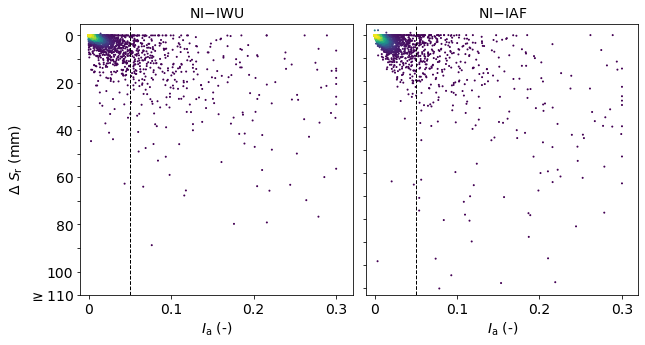

In [57]:
# ABSOLUTE
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(wspace=0.05)
ax = fig.add_subplot(121)
ax.vlines(0.05,-110,10,'k',linestyle='--',linewidth=1)
e_df = e_df.dropna()
x,y = e_df.ir,e_df['f0_fiwu']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1)
ax.set_ylim(-103,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels(['0','','20','','40','','60','','80','','100','$\geq$110'])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.1,0.2,0.3])
ax.set_xticklabels([0,0.1,0.2,0.3])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('NI$-$IWU',size=14)

ax = fig.add_subplot(122)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
e_df = e_df.dropna()
x,y = e_df.ir,e_df['f0_fopt']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1)
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.1,0.2,0.3])
ax.set_xticklabels([0,0.1,0.2,0.3])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('NI$-$IAF',size=14)
fig.savefig(f'{fig_dir}/dsr_ia_allcatchments.jpg', dpi=300, bbox_inches='tight')


In [58]:
data_sources = 'gswp-p_gleam-ep_gswp-t'
c = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_{data_sources}.csv',index_col=0)

er_df['lat'] = c.lat
er_df['lon'] = c.lon
e_df['lat'] = c.lat
e_df['lon'] = c.lon

e_df_as = e_df[(e_df.lat<lat_max_a)&(e_df.lat>lat_min_a)&(e_df.lon<lon_max_a)&(e_df.lon>lon_min_a)]
e_df_e = e_df[(e_df.lat<lat_max_e)&(e_df.lat>lat_min_e)&(e_df.lon<lon_max_e)&(e_df.lon>lon_min_e)]
e_df_u = e_df[(e_df.lat<lat_max_u)&(e_df.lat>lat_min_u)&(e_df.lon<lon_max_u)&(e_df.lon>lon_min_u)]
e_df_s = e_df[(e_df.lat<lat_max_s)&(e_df.lat>lat_min_s)&(e_df.lon<lon_max_s)&(e_df.lon>lon_min_s)]

er_df_as = er_df[(er_df.lat<lat_max_a)&(er_df.lat>lat_min_a)&(er_df.lon<lon_max_a)&(er_df.lon>lon_min_a)]
er_df_e = er_df[(er_df.lat<lat_max_e)&(er_df.lat>lat_min_e)&(er_df.lon<lon_max_e)&(er_df.lon>lon_min_e)]
er_df_u = er_df[(er_df.lat<lat_max_u)&(er_df.lat>lat_min_u)&(er_df.lon<lon_max_u)&(er_df.lon>lon_min_u)]
er_df_s = er_df[(er_df.lat<lat_max_s)&(er_df.lat>lat_min_s)&(er_df.lon<lon_max_s)&(er_df.lon>lon_min_s)]

e_df_as = e_df_as.dropna()
er_df_as = er_df_as.dropna()
e_df_as=e_df_as.iloc[:,0:2]
er_df_as=er_df_as.iloc[:,0:2]

e_df_e = e_df_e.dropna()
er_df_e = er_df_e.dropna()
e_df_e=e_df_e.iloc[:,0:2]
er_df_e=er_df_e.iloc[:,0:2]

e_df_s = e_df_s.dropna()
er_df_s = er_df_s.dropna()
e_df_s=e_df_s.iloc[:,0:2]
er_df_s=er_df_s.iloc[:,0:2]

e_df_u = e_df_u.dropna()
er_df_u = er_df_u.dropna()
e_df_u=e_df_u.iloc[:,0:2]
er_df_u=er_df_u.iloc[:,0:2]

In [66]:
# REGIONS
e_df_as['ir'] = ir
er_df_as['ir']= ir

e_df_u['ir'] = ir
er_df_u['ir'] = ir

e_df_e['ir'] = ir
er_df_e['ir'] = ir

e_df_s['ir'] = ir
er_df_s['ir'] = ir

# CLIMATES
e_df_a['ir'] = ir
er_df_a['ir']= ir

e_df_tr.loc['in_0000158','f0_fopt'] = -110
e_df_tr['ir'] = ir
er_df_tr['ir'] = ir

e_df_tm['ir'] = ir
er_df_tm['ir'] = ir

e_df_m['ir'] = ir
er_df_m['ir'] = ir

e_df_c['ir'] = ir
er_df_c['ir'] = ir


In [68]:
t1,t2 = 'lightgreen','darkgreen'
a1,a2 = 'tomato','darkred'
m1,m2 = 'khaki','darkgoldenrod'
tm1,tm2 = 'lightblue','mediumblue'
c1,c2 = 'pink','mediumvioletred'

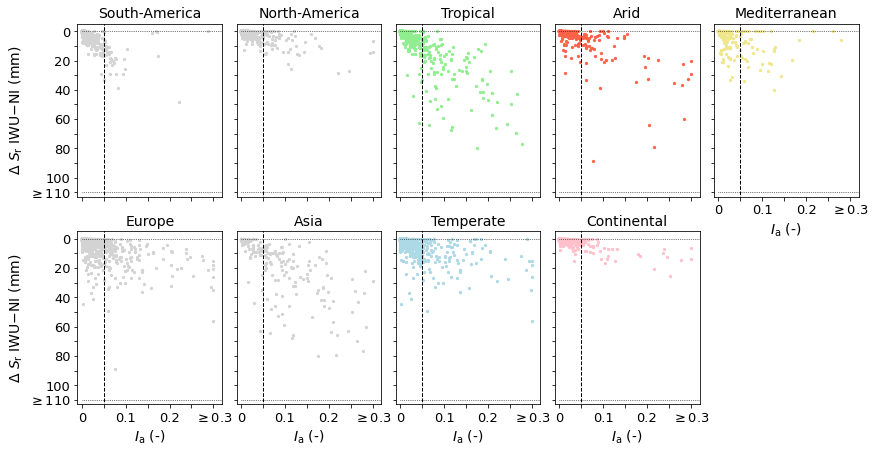

In [87]:
# ABSOLUTE - IWU
fig = plt.figure(figsize=(14,7))
plt.subplots_adjust(wspace=0.1,hspace=0.2)

# regions
ax = fig.add_subplot(251)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_s['ir'],e_df_s['f0_fiwu'],s=5,c='lightgrey',marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels(['0','','20','','40','','60','','80','','100','$\geq$110'])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([])
# ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ IWU$-$NI (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('South-America',size=14)

ax = fig.add_subplot(252)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_u['ir'],e_df_u['f0_fiwu'],s=5,c='lightgrey',marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([])
# ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('North-America',size=14)

ax = fig.add_subplot(256)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_e['ir'],e_df_e['f0_fiwu'],s=5,c='lightgrey',marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels(['0','','20','','40','','60','','80','','100','$\geq$110'])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([0,'',0.1,'',0.2,'','$\geq$0.3'])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ IWU$-$NI (mm)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Europe',size=14)

ax = fig.add_subplot(257)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_as['ir'],e_df_as['f0_fiwu'],s=5,c='lightgrey',marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([0,'',0.1,'',0.2,'','$\geq$0.3'])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Asia',size=14)

# climates
ax = fig.add_subplot(253)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_tr['ir'],e_df_tr['f0_fiwu'],s=5,c=t1,marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([])
# ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Tropical',size=14)

ax = fig.add_subplot(254)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_a['ir'],e_df_a['f0_fiwu'],s=5,c=a1,marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([])
# ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Arid',size=14)

ax = fig.add_subplot(255)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_m['ir'],e_df_m['f0_fiwu'],s=5,c=m1,marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([0,'',0.1,'',0.2,'','$\geq$0.3'])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Mediterranean',size=14)

ax = fig.add_subplot(258)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_tm['ir'],e_df_tm['f0_fiwu'],s=5,c=tm1,marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([0,'',0.1,'',0.2,'','$\geq$0.3'])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Temperate',size=14)

ax = fig.add_subplot(259)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_c['ir'],e_df_c['f0_fiwu'],s=5,c=c1,marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([0,'',0.1,'',0.2,'','$\geq$0.3'])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Continental',size=14)

fig.savefig(f'{fig_dir}/dsr_ia_stratified_iwu.jpg', dpi=300, bbox_inches='tight')


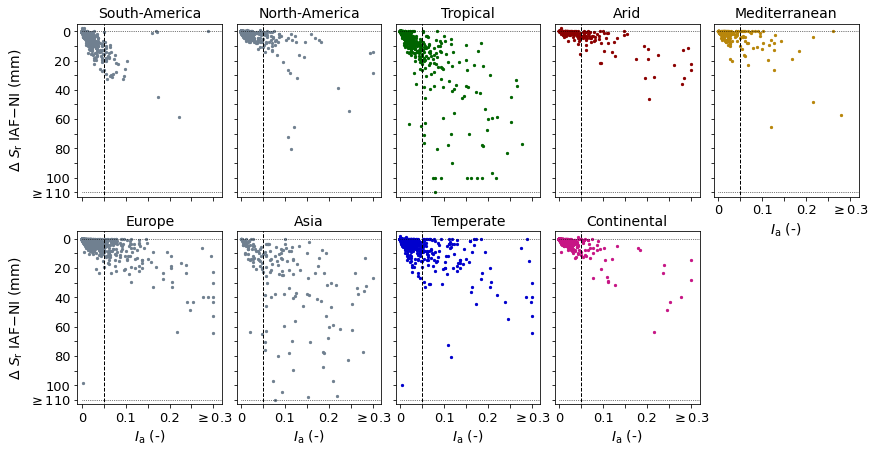

In [88]:
# ABSOLUTE - IAF
fig = plt.figure(figsize=(14,7))
plt.subplots_adjust(wspace=0.1,hspace=0.2)

# regions
ax = fig.add_subplot(251)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_s['ir'],e_df_s['f0_fopt'],s=5,c='slategrey',marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels(['0','','20','','40','','60','','80','','100','$\geq$110'])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([])
# ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ IAF$-$NI (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('South-America',size=14)

ax = fig.add_subplot(252)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_u['ir'],e_df_u['f0_fopt'],s=5,c='slategrey',marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([])
# ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('North-America',size=14)

ax = fig.add_subplot(256)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_e['ir'],e_df_e['f0_fopt'],s=5,c='slategrey',marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels(['0','','20','','40','','60','','80','','100','$\geq$110'])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([0,'',0.1,'',0.2,'','$\geq$0.3'])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ IAF$-$NI (mm)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Europe',size=14)

ax = fig.add_subplot(257)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_as['ir'],e_df_as['f0_fopt'],s=5,c='slategrey',marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([0,'',0.1,'',0.2,'','$\geq$0.3'])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Asia',size=14)

# climates
ax = fig.add_subplot(253)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_tr['ir'],e_df_tr['f0_fopt'],s=5,c=t2,marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([])
# ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Tropical',size=14)

ax = fig.add_subplot(254)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_a['ir'],e_df_a['f0_fopt'],s=5,c=a2,marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([])
# ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Arid',size=14)

ax = fig.add_subplot(255)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_m['ir'],e_df_m['f0_fopt'],s=5,c=m2,marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([0,'',0.1,'',0.2,'','$\geq$0.3'])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Mediterranean',size=14)

ax = fig.add_subplot(258)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_tm['ir'],e_df_tm['f0_fopt'],s=5,c=tm2,marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([0,'',0.1,'',0.2,'','$\geq$0.3'])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Temperate',size=14)

ax = fig.add_subplot(259)
ax.vlines(0.05,-115,10,'k',linestyle='--',linewidth=1)
ax.hlines(0,0,11,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-110,0,11,color='k',linestyle=':',linewidth=0.7)
ax.scatter(e_df_c['ir'],e_df_c['f0_fopt'],s=5,c=c2,marker='o')
ax.set_ylim(-113,5)
ax.set_yticks([0,-10,-20,-30,-40,-50,-60,-70,-80,-90,-100,-110])
ax.set_yticklabels([])
ax.set_xlim(-0.01,0.32)
ax.set_xticks([0,0.05,0.1,0.15,0.2,0.25,0.3])
ax.set_xticklabels([0,'',0.1,'',0.2,'','$\geq$0.3'])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Continental',size=14)
fig.savefig(f'{fig_dir}/dsr_ia_stratified_iaf.jpg', dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'NI-IAF')

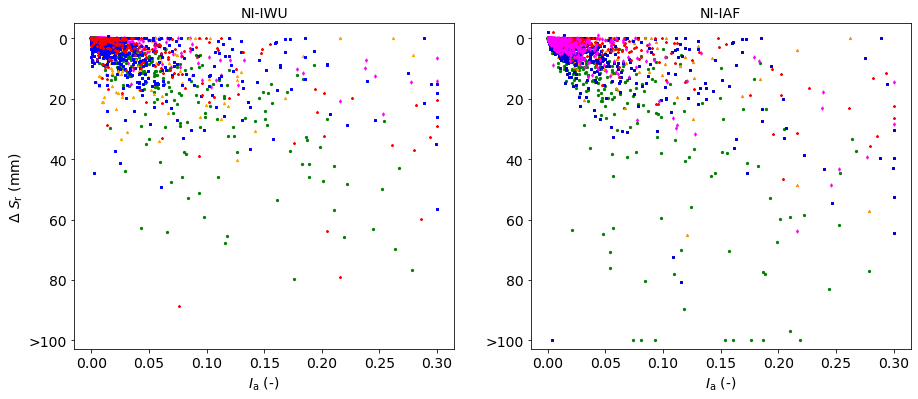

In [64]:
# stratify climates - not very visible!
# ABSOLUTE
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121)
ax.scatter(e_df_c['ir'],e_df_c['f0_fiwu'],s=5,c='fuchsia',marker='d')
ax.scatter(e_df_tr['ir'],e_df_tr['f0_fiwu'],s=5,c='green',marker='o')
ax.scatter(e_df_m['ir'],e_df_m['f0_fiwu'],s=5,c='orange',marker='^')
ax.scatter(e_df_tm['ir'],e_df_tm['f0_fiwu'],s=5,c='blue',marker='s')
ax.scatter(e_df_a['ir'],e_df_a['f0_fiwu'],s=5,c='red',marker='*')
ax.set_ylim(-103,5)
ax.set_yticks([0,-20,-40,-60,-80,-100])
ax.set_yticklabels([0,20,40,60,80,'>100'])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('NI-IWU',size=14)

ax = fig.add_subplot(122)
ax.scatter(e_df_tr['ir'],e_df_tr['f0_fopt'],s=5,c='green',marker='o')
ax.scatter(e_df_m['ir'],e_df_m['f0_fopt'],s=5,c='darkorange',marker='^')
ax.scatter(e_df_tm['ir'],e_df_tm['f0_fopt'],s=5,c='mediumblue',marker='s')
ax.scatter(e_df_a['ir'],e_df_a['f0_fopt'],s=5,c='red',marker='*')
ax.scatter(e_df_c['ir'],e_df_c['f0_fopt'],s=5,c='fuchsia',marker='d')
ax.set_ylim(-103,5)
ax.set_yticks([0,-20,-40,-60,-80,-100])
ax.set_yticklabels([0,20,40,60,80,'>100'])
ax.set_xlabel('$I_\mathrm{a}$ (-)',size=14)
# ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('NI-IAF',size=14)


## Se


In [278]:
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points2.csv', index_col=0)
a = sr_df_f09ia.index

In [280]:
b = ['pa_0000009', 'ca_0001994', 'de_0000525', 'th_0000158', 'es_0000998', '922101B', 'ca_0001761', '206018', 'gb_0000001', 'ch_0000023', 'ca_0003448', 'na_0000037', '212260', 'gb_0000013', 'za_0000279', 'G0050115', 'ca_0000378', 'ca_0000276', 'us_0005928', 'es_0000273', 'gb_0000154', 'de_0000764', 'us_0007077', 'de_0000070', 'ca_0005658', 'ca_0000959', 'ca_0001935', '406214', 'ca_0001747', 'gb_0000208', 'br_0000883', 'ie_0000010', '404207', 'ca_0001951', 'ca_0004451', '221207', 'de_0000813', 'se_0000016', 'ca_0004640', 'es_0001000', 'ITVEN427', 'ITVEN426', 'ITVEN433', 'ITVEN429', 'cz_0000019', 'br_0001406', 'ca_0000408', 'gb_0000021', 'ca_0003665', 'es_0000989', '410061', 'ca_0000037', 'ca_0003854', 'ca_0000976', 'na_0000021', 'es_0001123', 'de_0000163', 'hu_0000012', 'de_0000627', 'ie_0000059', 'ca_0001671', '415207', 'ca_0003500', 'de_0000344', '415226', '138004B', 'ca_0001144', 'sk_0000006', 'ca_0001997', 'gb_0000148', '210006', 'es_0001132', '401212', 'ca_0003521', 'ca_0000355', 'za_0000298', 'ca_0003721', 'ca_0000146', 'de_0000108', 'de_0000001', 'ca_0002006', 'fi_0000113', 'de_0000812', 'ca_0001714', 'ca_0001765', 'ca_0006089', 'ru_0000374', 'de_0000775', 'fr_0000326', '136203A', 'ls_0000016', '613002', 'ca_0004474', '403222', 'om_0000008', 'G8190001', 'de_0000531', 'hu_0000015', 'ca_0001737', 'de_0000232', 'at_0000113', '108002A', 'ca_0001991', 'gb_0000025', 'ca_0005926', '229661A', '116015A', '403221', 'de_0000165', 'de_0000805', 'de_0000083', 'cz_0000022', 'ca_0003495', 'G8110016', 'na_0000044', 'br_0000129', 'ie_0000069', 'de_0000473', 'no_0000131', 'de_0000183', 'de_0000071', 'fi_0000094', 'ca_0003432', '225219', '238208', 'de_0000791', 'ca_0005945', 'G9070142', 'ca_0000125', 'cz_0000024', '112102A', '212209', 'ca_0001417', 'sk_0000015', '116014A', 'ch_0000004', '405248', '215207', 'de_0000413', 'ca_0003816', '222206', 'za_0000196', '408202', 'ca_0001736', 'G0060005', 'de_0000022', 'de_0000666', 'A2390531', 'ca_0003486', 'ca_0003383', 'ca_0005827', 'at_0000176', 'ca_0005907', 'ca_0005638', 'de_0000818', 'ca_0004326', 'de_0000101', '408200', 'A2390519', '145011A', '616065', 'ca_0000991', 'dk_0000012', 'gb_0000221', 'gb_0000006', 'de_0000226', 'za_0000145', 'is_0000020', 'ie_0000055', 'hu_0000028', 'gb_0000204', 'ru_0000445', 'ie_0000013', 'fr_0001283', 'fi_0000110', 'A2390523', 'ca_0000495', '145010A', 'ca_0000357', 'de_0000073', 'ca_0003413', 'ru_0000422', 'no_0000089', 'br_0000093', 'ca_0000038', 'ca_0000270', 'na_0000017', '236213', 'gb_0000009', '146012A', 'br_0001114', 'ca_0003247', 'de_0000078', 'no_0000076', '104001A', 'br_0001937', 'de_0000035', 'ca_0004055', 'ca_0003491', 'ca_0000882', 'bw_0000003', 'de_0000392', '407220', '145101D', 'de_0000130', 'ca_0001697', '116011A', 'br_0003123', 'fi_0000056', 'ca_0005635', 'sk_0000034', 'ca_0004687', 'de_0000532', 'de_0000549', 'ch_0000057', 'ru_0000101', 'de_0000100', 'cz_0000013', 'de_0000077', 'de_0000045', 'br_0000481', 'de_0000364', 'ca_0005678', 'is_0000021', 'cz_0000001', 'ca_0005951', '126003A', 'es_0001161', '143110A', 'de_0000410', '405209', 'se_0000017', '410731', 'de_0000032', 'ca_0000351', 'na_0000039', 'de_0000459', 'de_0000391', '422319B', 'br_0001656', '229650A', 'de_0000020', 'ie_0000006', '401210', 'ca_0002540', '146010A', 'gb_0000183', 'ca_0001992', 'gb_0000215', 'A5130501', 'ca_0004894', 'ca_0005943', 'G8210010', 'de_0000339', 'de_0000356', 'ca_0001642', 'ca_0004113', 'de_0000639', 'ca_0001680', 'ca_0005661', 'ca_0001816', 'de_0000044', '925001A', 'at_0000072', 'se_0000008', 'na_0000045', 'de_0000030', 'de_0000231', 'de_0000695', 'de_0000819', 'A5040523', 'br_0000036', 'bw_0000004', '422313B', 'ca_0001626', 'ca_0001119', 'G8150018', '407253', 'cz_0000017', 'fi_0000093', 'ca_0000838', '208009', 'ca_0002012', 'de_0000107', 'sk_0000001', 'ca_0000343', 'ca_0003516', 'hu_0000013', 'gb_0000207', 'br_0001115', 'de_0000412', 'se_0000078', 'ca_0005957', '610008', 'de_0000334', 'us_0006993', 'gb_0000175', 'hu_0000021', 'ca_0005932', 'ca_0000479', 'ca_0003479', 'ca_0001543', 'ru_0000404', 'de_0000696', 'de_0000109', '137101A', '407214', 'ca_0003422', 'de_0000357', 'de_0000227', 'ca_0000136', 'at_0000117', 'fi_0000095', 'ca_0005893', 'ca_0001057', 'gb_0000036', 'ca_0004325', '112002A', '137201A', 'ca_0002426', '405218', 'na_0000024', 'ca_0001968', 'de_0000522', 'de_0000467', 'G8140161', 'ca_0004169', 'de_0000233', '401015', 'ca_0006020', 'de_0000065', 'ca_0003945', 'br_0000102', '218001', 'ca_0006114', 'ie_0000014', '216002', 'de_0000213', 'ca_0004641', 'br_0000126', 'ro_0000039', 'de_0000039', 'ch_0000069', 'gb_0000023', 'hu_0000020', 'de_0000098', 'ca_0003993', 'es_0001127', '614044', 'fi_0000055', 'ca_0003405', 'at_0000029', 'fi_0000157', 'ca_0005958', 'ca_0000129', 'ca_0001660', 'ie_0000060', 'de_0000185', 'ie_0000071', 'de_0000053', 'de_0000046', 'no_0000180', '227227', 'ca_0003384', 'ca_0000332', 'ch_0000005', '401208', '105101A', 'ca_0005861', '219001', '917107A', 'ca_0003447', 'gb_0000020', '604053', 'ca_0002903', 'sk_0000016', '919201A', '402213', 'ca_0001640', 'bw_0000008', '122004A', '113004A', 'cz_0000008', 'ls_0000019', 'cz_0000015', 'ca_0003498', 'ca_0002026', '401012', 'ca_0006071', '422306A', 'de_0000205', '410734', 'ca_0001682', 'ca_0002000', 'na_0000023', 'de_0000530', 'ca_0000377', 'ca_0004380', 'ar_0000029', '138009A', 'de_0000036', 'de_0000694', 'ca_0003237', 'de_0000476', 'na_0000028', 'at_0000164', 'de_0000396', '422334A', 'ca_0003315', 'us_0007002', '223202', '145107A', 'A5050517', 'ca_0000363', 'ru_0000259', '405219', 'th_0000035', 'de_0000697', '606002', '225110A', '401009', 'de_0000397', 'ca_0003483', 'fr_0001345', 'de_0000019', 'de_0000172', 'ca_0000248', 'ca_0003366', 'ca_0000333', 'de_0000025', 'de_0000625', 'ca_0001734', 'br_0000031', 'de_0000106', 'de_0000063', 'de_0000626', 'ca_0001183', 'hu_0000008', '138113A', 'ca_0000368', 'ru_0000130', 'ca_0003728', 'ca_0003408', 'ca_0004364', 'de_0000709', 'ru_0000325', '401217', 'ca_0003526', 'de_0000457', '804001', '405245', 'de_0000735', 'gb_0000206', 'A5030502', 'fi_0000088', 'cz_0000007', 'de_0000451', 'ca_0005978', 'ca_0002055', 'ca_0003987', 'cz_0000010', 'ca_0000346', '402206', 'ca_0005668', 'ca_0001573', 'ca_0001767', 'ca_0003446', 'ca_0000420', 'ca_0003853', 'de_0000826', '224213A', '616002', 'ca_0003855', 'de_0000067', 'no_0000045', 'na_0000029', 'ca_0004321', '226222', 'de_0000029', 'de_0000798', 'na_0000048', 'fi_0000134', 'by_0000021', '215004', '231213', '412028', 'ca_0005777', 'gy_0000004', '407230', 'sk_0000023', 'de_0000524', 'ca_0001966', '809310', 'cz_0000020', 'ca_0005899', '919003A', 'gb_0000153', 'in_0000070', 'za_0000021', 'de_0000405', 'sk_0000032', '226407', 'gb_0000177', '422394A', 'ca_0003507', 'ca_0001690', 'A5040517', 'de_0000416', 'ro_0000042', 'de_0000049', 'ca_0001418', 'ca_0005939', 'na_0000047', '318076', 'cz_0000004', 'ru_0000219', 'is_0000022', 'de_0000535', 'ca_0003518', 'de_0000408', 'fi_0000107', 'ch_0000026', '102101A', 'fi_0000105', '308145', 'za_0000307', 'de_0000042', 'es_0001165', '405205', 'na_0000036', '402217', 'ca_0000979', '803003', 'de_0000464', 'ca_0003686', 'ca_0003742', '222213', 'de_0000229', 'ca_0003409', '418014', 'in_0000077', 'no_0000208', 'ca_0005371', 'ca_0001695', 'no_0000150', 'gb_0000192', 'ca_0003519', 'de_0000380', 'at_0000071', 'br_0001938', 'ca_0000275', 'de_0000427', 'ca_0003431', 'ca_0001706', 'ca_0000417', 'lt_0000006', 'at_0000017', 'ca_0003337', 'gb_0000019', 'ca_0002020', '216004', '227226', 'es_0001169', 'ca_0001363', 'ca_0002520', 'gb_0000179', 'sk_0000033', 'ca_0005573', 'fi_0000104', '206014', 'pa_0000010', 'ca_0001713', 'de_0000477', 'ca_0003433', 'ls_0000020', '405251', 'no_0000021', 'ca_0005624', 'hu_0000024', 'ca_0000034', 'ca_0006093', 'gb_0000174', '224206', 'ar_0000025', 'de_0000456', 'ca_0004771', 'se_0000064', 'de_0000636', 'ca_0001961', 'ca_0004721', 'de_0000806', 'ch_0000088', 'de_0000037', '136208A', 'ca_0004739', 'ca_0001676', 'de_0000523', 'de_0000180', '606001', 'ca_0000052', '412066', 'dk_0000036', 'zm_0000027', 'ca_0005802', 'br_0000633', 'hu_0000019', 'no_0000036', 'ca_0003589', 'de_0000033', 'ru_0000425', 'ca_0001755', 'de_0000099', 'ca_0004762', '315450', 'ca_0004274', 'ca_0003365', 'ca_0002537', 'br_0003063', '405217', 'de_0000804', 'za_0000270', 'de_0000542', 'de_0000349', '304497', 'ru_0000329', '403217', 'de_0000060', '616013', 'fi_0000049', '405226', 'cz_0000018', 'ca_0005935', 'ca_0002019', 'ca_0005938', 'ca_0000392', '305202', 'br_0000145', 'ca_0001987', 'br_0000293', 'es_0001172', 'ca_0003480', '314213', 'gb_0000147', 'ca_0005768', 'fi_0000127', '405238', 'ru_0000324', 'fi_0000103', 'th_0000094', 'ca_0001746', 'ca_0004314', 'ca_0000461', 'ca_0000341', 'na_0000018', 'ca_0006035', 'ca_0000916', 'fi_0000001', 'ca_0001938', 'de_0000023', 'de_0000345', 'de_0000027', 'br_0000058', 'ca_0001768', 'ru_0000457', 'cz_0000002', '402204', 'br_0000088', 'gb_0000005', 'ie_0000008', 'ca_0006067', 'ca_0004424', 'ca_0000135', 'de_0000478', 'ca_0002516', 'ca_0005965', '405215', 'ca_0001638', 'ca_0001945', 'gb_0000033', 'za_0000032', 'ca_0000423', 'ca_0000968', 'de_0000342', 'sk_0000024', 'gb_0000213', 'G9030124', 'ca_0000468', 'ca_0001959', 'ca_0001981', 'ca_0004509', 'ca_0003316', 'ca_0005880', 'ca_0000299', 'ca_0001691', 'ca_0004459', 'de_0000387', 'ru_0000328', 'ca_0001722', 'ca_0001718', 'gb_0000184', 'na_0000025', 'ca_0000372', 'ie_0000018', 'na_0000027', 'ca_0004365', '406213', '405264', 'de_0000341', 'sk_0000002', 'ca_0002014', 'ru_0000417', 'ru_0000470', 'ca_0005955', '422321B', 'za_0000165', 'ca_0006074', '415237', 'fi_0000112', 'na_0000035', 'gb_0000002', '116013A', 'de_0000551', '221210', 'de_0000064', 'ca_0001742', '308799', 'ca_0000385', 'za_0000176', 'sk_0000041', 'gb_0000024', 'ca_0003406', 'de_0000368', 'ca_0006113', '143009A', '403232', '606185', 'si_0000026', 'ca_0003845', 'ca_0001180', 'ca_0000350', 'ie_0000061', 'fr_0000231', '613146', 'dk_0000010', 'za_0000285', 'gb_0000210', '416008', 'de_0000026', 'de_0000074', '403226', 'si_0000003', 'ca_0000111', 'ca_0005986', 'ca_0006009', 'ca_0002532', 'cz_0000016', 'gb_0000026', '407215', '227225A', 'de_0000460', 'ca_0004145', 'de_0000395', 'ca_0005906', 'de_0000015', 'ca_0001964', 'de_0000350', 'de_0000393', 'ca_0001641', 'ca_0001131', 'ca_0003373', 'za_0000247', 'de_0000660', '105102A', 'ca_0003688', 'de_0000469', 'br_0003189', 'ca_0002902', 'de_0000034', 'de_0000362', 'at_0000040', '146014A', 'ca_0005572', 'ca_0005973', 'ca_0003477', 'za_0000256', '215002', 'ca_0001508', 'G0010005', '116006B', '608002', 'ca_0001973', 'G8140001', 'de_0000533', 'ca_0002527', '926002A', '418005', 'de_0000190', '401216', 'fi_0000149', 'G8110004', '607155', 'bw_0000006', 'de_0000144', 'ch_0000049', 'ca_0000039', 'de_0000031', 'gb_0000144', 'ar_0000024', 'at_0000052', 'ca_0005625', 'br_0000554', 'ca_0003722', 'ch_0000024', 'ca_0006011', 'cz_0000027', 'de_0000736', 'ca_0000406', 'sk_0000005', 'ru_0000446', 'de_0000050', 'ie_0000052', 'ch_0000035', 'de_0000028', '145018A', 'ru_0000431', 'ca_0003434', '422202B', 'za_0000054', '211008', 'no_0000068', 'ca_0003926', 'fi_0000108', 'de_0000409', 'ca_0001655', '314207', 'se_0000072', 'ca_0006101', 'gb_0000181', 'es_0001020', 'ca_0001117', 'de_0000343', '224214A', 'ca_0003332', 'ru_0000468', 'ca_0003912', 'de_0000207', 'gb_0000142', 'fi_0000067', 'ie_0000076', '302214', '405274', 'de_0000521', 'ca_0003650', 'ca_0001341', '230210', '405263', 'fr_0000611', 'sk_0000031', 'br_0000025', 'de_0000436', 'no_0000172', '412050', '405227', 'de_0000040', 'se_0000039', 'ca_0005933', 'de_0000474', '210011', 'de_0000048', 'br_0000094', 'ca_0002378', 'br_0000028', 'de_0000453', 'ca_0001898', 'ca_0001928', 'ca_0001651', 'de_0000286', 'ca_0005798', 'de_0000066', '401203', 'ca_0005987', 'gb_0000185', 'ie_0000015', 'gb_0000008', 'gb_0000216', '116012A', '107001B', 'ca_0003857', 'fr_0000148', 'ca_0003803', 'ca_0004419', 'de_0000043', 'ca_0000354', 'ru_0000409', 'de_0000147', 'ca_0003318', 'ru_0000395', 'de_0000394', 'de_0000475', 'ca_0000382', 'br_0000484', 'ca_0005979', 'de_0000659', 'ca_0005679', 'ca_0000059', 'gb_0000182', 'ca_0000150', '136202D', '919309A', 'ca_0000286', 'ca_0003188', 'sk_0000009', '406208', 'fr_0000776', 'gb_0000151', 'ca_0006102', '204034', 'gb_0000180', 'de_0000075', 'de_0000072', 'de_0000366', 'ca_0001023', 'de_0000796', 'ru_0000476', 'ca_0003429', 'cz_0000023', 'ca_0000319', 'hu_0000014', 'gb_0000150', 'de_0000024', 'de_0000644', 'de_0000018', 'za_0000248', '226220', 'by_0000023', 'ch_0000055', 'gb_0000193', 'de_0000200', 'de_0000141', 'ca_0003391', '410705', 'gb_0000018', 'de_0000354', 'es_0001125', 'ca_0003484', '403209A', '138010A', 'ca_0006122', 'ca_0003428', '208007', 'ca_0003485', 'hu_0000016', 'ca_0001995', 'fi_0000116', 'de_0000778', 'de_0000825', 'gb_0000211', 'es_0001092', 'fi_0000092', 'de_0000538', 'ca_0001940', 'ca_0000419', '143303A', 'ca_0003678', 'cz_0000011', 'ca_0000373', 'ca_0001989', 'fi_0000060', 'ar_0000031', 'de_0000381', 'de_0000097', 'de_0000471', 'gb_0000007', 'ca_0003497', 'ca_0005985', 'ca_0003878', 'ca_0002334', 'br_0000213', 'ch_0000061', 'gb_0000176', 'de_0000204', '419005', 'ca_0003317', 'ca_0003403', 'ca_0000381', 'gb_0000202', 'se_0000015', 'in_0000076', '403214', 'ca_0005974', 'hu_0000017', 'hu_0000005', 'de_0000210', '105105A', '410761', 'G8170002', 'ca_0004346', 'fr_0000610', 'ca_0001709', 'es_0001016', 'de_0000164', 'za_0000189', 'de_0000543', 'ca_0000050', 'ca_0005628', 'gb_0000209', 'ru_0000415', 'ca_0001977', 'no_0000209', 'ca_0005622', '403213A', 'fr_0000113', 'hu_0000022', 'de_0000360', 'fi_0000148', 'ca_0001199', 'de_0000021', '410057', 'ca_0003379', 'ca_0006072', '416003', '410730', 'ar_0000026', '406224', 'de_0000623', 'de_0000117', 'G8200045', '116010A', 'ca_0000371', 'ca_0001339', 'br_0003193', 'de_0000817', 'de_0000161', 'no_0000032', '915011A', 'de_0000797', 'ca_0000215', '121001A', 'ca_0002079', '146095A']
len(b)

1040

In [284]:
ir.loc[b].median()

0.0

In [295]:
se = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/se_combined.csv',index_col=0)

In [297]:
se = se.loc[ir>0.05]
se

,se_mean,se_med,se_std,se_u_mean,se_u_med,se_u_std
br_0000727,226.684079,192.824605,186.655857,13.242197,11.264229,10.903870
br_0000728,245.990076,208.859594,200.596431,14.191528,12.049416,11.572702
br_0000771,325.726359,280.636007,224.035743,16.017892,13.800533,11.017163
br_0001335,271.280634,225.860873,260.613729,36.585691,30.460251,35.147122
br_0001613,667.438412,649.961329,225.216970,41.471761,40.385810,13.994017
...,...,...,...,...,...,...
ITTOS387,67.852619,0.000000,102.876946,6.211546,0.000000,9.417837
ITTOS395,96.043585,94.678087,97.811094,9.746560,9.607989,9.925928
ITTOS349,70.878224,0.000000,96.214916,4.641354,0.000000,6.300489
ITTOS340,41.942939,0.000000,80.742223,2.533487,0.000000,4.877087


In [292]:
se2 = pd.DataFrame(index=b, columns=se.columns)
se2.iloc[:,0] = np.zeros(len(se2))
se2.iloc[:,1] = np.zeros(len(se2))
se2.iloc[:,2] = np.zeros(len(se2))
se2.iloc[:,3] = np.zeros(len(se2))
se2.iloc[:,4] = np.zeros(len(se2))
se2.iloc[:,5] = np.zeros(len(se2))
se3 = pd.concat([se,se2])
se3

,se_mean,se_med,se_std,se_u_mean,se_u_med,se_u_std
ITEMI002,41.712954,0.000000,82.807757,0.965027,0.000000,1.915754
at_0000002,269.894526,238.107419,151.437294,0.068769,0.060670,0.038586
at_0000008,429.602336,472.816511,164.004743,0.217547,0.239431,0.083051
at_0000012,1061.950651,1119.515191,274.121193,0.415793,0.438332,0.107329
at_0000039,959.123427,919.755027,276.938776,0.002597,0.002491,0.000750
...,...,...,...,...,...,...
de_0000797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ca_0000215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
121001A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ca_0002079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [302]:
med = e_df_m.loc[ir>0.05].index
tr = e_df_tr.loc[ir>0.05].index
tm = e_df_tm.loc[ir>0.05].index
ar = e_df_a.loc[ir>0.05].index
co = e_df_c.loc[ir>0.05].index
print(len(med),len(tr),len(tm),len(ar),len(co))

44 119 115 65 45


In [307]:
def se_mean(catch_list):
    # get fiwu values for catchments with ia>0, se only written for ia>0, sd for all catchments
    f = '0.9ia'
    fm = []
    fs = []
    fmd = []
    ufm = []
    ufs = []
    ufmd = []
    c = []
    for catch_id in catch_list:
        if os.path.exists(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f{f}/se/{catch_id}_f{f}.csv'):
            if ((os.stat(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f{f}/se/{catch_id}_f{f}.csv').st_size == 0)==False):
                d = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f{f}/se/{catch_id}_f{f}.csv',index_col=0)
                semean = d['se'][:-1].mean()
                sestd = d['se'][:-1].std()
                semed = d['se'][:-1].median()
                usemean = d['se_used'][:-1].mean()
                usestd = d['se_used'][:-1].std()
                usemed = d['se_used'][:-1].median()
                fm.append(semean)
                fs.append(sestd)
                fmd.append(semed)
                ufm.append(usemean)
                ufs.append(usestd)
                ufmd.append(usemed)
                c.append(catch_id)
    print(len(fm))
    df = pd.DataFrame(index=c, columns=['se_mean','se_med','se_std','se_u_mean','se_u_med','se_u_std'])
    df['se_mean'] = fm
    df['se_med'] = fmd
    df['se_std'] = fs
    df['se_u_mean'] = ufm
    df['se_u_med'] = ufmd
    df['se_u_std'] = ufs
    return df

In [308]:
med_mean_ss = se_mean(med).se_mean.mean()
ar_mean_ss = se_mean(ar).se_mean.mean()

37
64


In [309]:
print(med_mean_ss)
print(ar_mean_ss)

243.7128732750046
124.0262586453867


In [310]:
tm_mean_ss = se_mean(tm).se_mean.mean()
tr_mean_ss = se_mean(tr).se_mean.mean()
co_mean_ss = se_mean(co).se_mean.mean()

107
117
45


In [311]:
print(tr_mean_ss)
print(tm_mean_ss)
print(co_mean_ss)

715.5763176820341
486.43249534206427
305.4196041513023


## STRATIFY ARIDITY IA>0.05

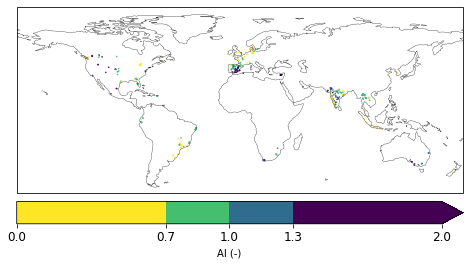

In [226]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

# sr_df = sr_df.astype(int) #int values
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er

# drop pos catchments
# ix_drop = ['us_0006081','br_0000699','za_0000167','us_0005876','us_0004753','ca_0000774'] natchments with sr increasing with irri compared to no-irri
# sr_df = sr_df.drop(index=ix_drop)
# e_df = e_df.drop(index=ix_drop)
# er_df = er_df.drop(index=ix_drop)

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

e_df = e_df[ir>0.05]
er_df = er_df[ir>0.05]

bounds = [0,0.7,1,1.3,2]
bounds2 =[0,0.7,1,1.3,2]
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
ai = cc.ai
cc = cc.loc[e_df.index]

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cc.lon,cc.lat,c=(cc['ai']),s=0.3,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='AI (-)',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
# ax.set_title('AI (-)',size=14)
fig.savefig(f'{fig_dir}/ai_map.jpg',bbox_inches='tight',dpi=300)

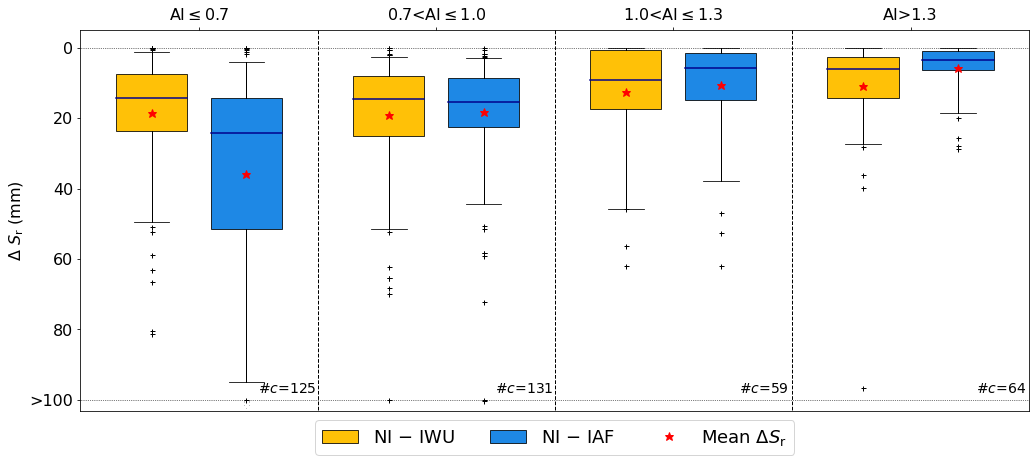

In [227]:
#abs - IA bins
e_df0 = e_df[(ai<=0.7)]
e_df1 = e_df[(ai>0.7)&(ai<=1)]
e_df2 = e_df[(ai>1)&(ai<=1.3)]
e_df3 = e_df[(ai>1.3)]

boxprops1 = dict(facecolor=c3,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=c2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(17,7))
ax = fig.add_subplot(111)
plt.subplots_adjust(wspace=0.05)
ax.boxplot(e_df0.iloc[:,0],positions=[1.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[1.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)

ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)

ax.boxplot(e_df2.iloc[:,0],positions=[5.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df2.iloc[:,1],positions=[5.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
# ax.plot([5.1,5.9],e_df2.loc[ca3].values,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

bp1=ax.boxplot(e_df3.iloc[:,0],positions=[7.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df3.iloc[:,1],positions=[7.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
# ax.plot([7.1,7.9],e_df3.loc[ca4].values,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

ax.annotate('$n$='+str(e_df0.count()[0]),(2,-98),size=14)
ax.annotate('$n$='+str(e_df1.count()[0]),(4,-98),size=14)
ax.annotate('$n$='+str(e_df2.count()[0]),(6.05,-98),size=14)
ax.annotate('$n$='+str(e_df3.count()[0]),(8.05,-98),size=14)

ax.set_ylim(-103,5)
ax.set_xlim(0.5,8.5)
ax.set_xticks([1.5,3.5,5.5,7.5])
ax.set_yticks([0,-20,-40,-60,-80,-100])
ax.set_yticklabels([0,20,40,60,80,'>100'])
ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(['AI$\leq$0.7','0.7<AI$\leq$1.0','1.0<AI$\leq$1.3','AI>1.3'],size=16)
ax.set_ylabel('$\Delta$ $S_\mathrm{r}$ (mm)',size=16)

ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-100,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)

# plot values <-100 at -100
ax.plot(1.9,-100.591,color='white',marker='+',markersize=5)
ax.plot(1.9,-100.33,color='white',marker='+',markersize=5)
ax.plot(1.9,-101.408,color='white',marker='+',markersize=5)
ax.plot(1.9,-100,color='black',marker='+',markersize=5)
ax.plot(3.1,-100,color='black',marker='+',markersize=5)
ax.plot(3.9,-100,color='black',marker='+',markersize=5)

p1 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0]],
          ['NI $-$ IWU','NI $-$ IAF','Mean $\Delta$$S_\mathrm{r}$'],
          ncol=3,fontsize= 18,loc='lower center',bbox_to_anchor=(0.5, -0.14),handletextpad=0.8,labelspacing=3,columnspacing = 2)

fig.savefig(f'{fig_dir}/box_abs_diff_AI.jpg', dpi=300, bbox_inches='tight')

In [171]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
# d['std0']=np.round(e_df0.std(),2).values
d['iqr0']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values
d['q250']=np.round((e_df0.quantile(0.25)),2).values
d['q750']=np.round((e_df0.quantile(0.75)),2).values

d['med1']=np.round(e_df1.median(),2).values
# d['std1']=np.round(e_df1.std(),2).values
d['iqr1']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values
d['q251']=np.round((e_df1.quantile(0.25)),2).values
d['q751']=np.round((e_df1.quantile(0.75)),2).values

d['med2']=np.round(e_df2.median(),2).values
# d['std2']=np.round(e_df2.std(),2).values
d['iqr2']=np.round((e_df2.quantile(0.75)-e_df2.quantile(0.25)),2).values
d['q252']=np.round((e_df2.quantile(0.25)),2).values
d['q752']=np.round((e_df2.quantile(0.75)),2).values

d['med3']=np.round(e_df3.median(),2).values
# d['std3']=np.round(e_df3.std(),2).values
d['iqr3']=np.round((e_df3.quantile(0.75)-e_df3.quantile(0.25)),2).values
d['q253']=np.round((e_df3.quantile(0.25)),2).values
d['q753']=np.round((e_df3.quantile(0.75)),2).values

d

,med0,iqr0,q250,q750,med1,iqr1,q251,q751,med2,iqr2,q252,q752,med3,iqr3,q253,q753
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-14.42,16.27,-23.80,-7.53,-14.45,17.10,-25.19,-8.09,-9.18,16.68,-17.45,-0.77,-5.97,11.80,-14.42,-2.62
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-24.26,37.22,-51.49,-14.27,-15.36,14.12,-22.66,-8.54,-5.76,13.43,-14.83,-1.40,-3.46,5.52,-6.48,-0.96


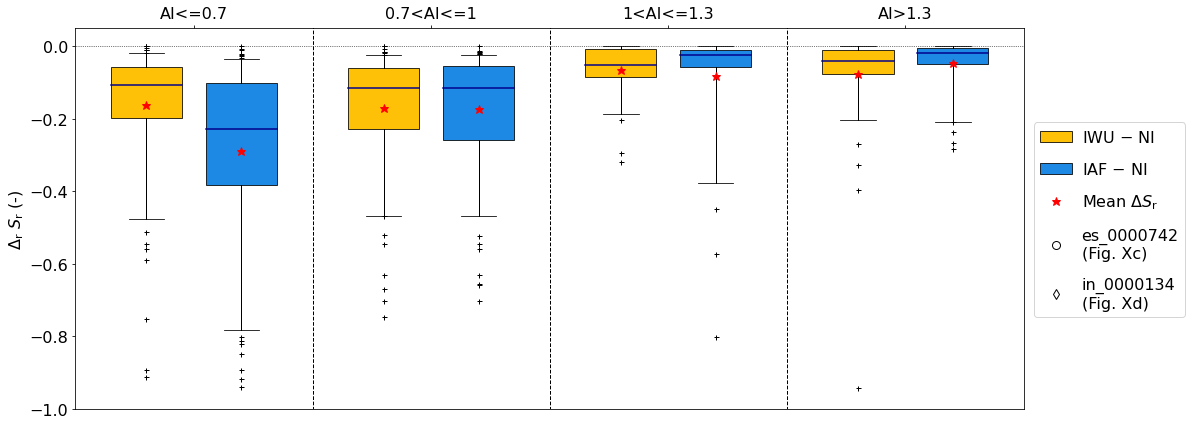

In [172]:
#abs - IA bins
e_df0 = er_df[(ai<0.7)]
e_df1 = er_df[(ai>0.7)&(ai<=1)]
e_df2 = er_df[(ai>1)&(ai<=1.3)]
e_df3 = er_df[(ai>1.3)]

e_df0 = e_df0.dropna()

# e_df1.loc['in_0000026']['f0_fiwu']=-100
# e_df0.loc['id_0000009']['f0_fopt']=-100.001
# e_df0.loc['in_0000281']['f0_fopt']=-100.001

boxprops1 = dict(facecolor=c3,color="black",linewidth=0.8)
boxprops2 = dict(facecolor=c2,color="black",linewidth=0.8)
medianprops = dict(color="darkblue",linewidth=1.5)
meanpointprops = dict(marker='*', markeredgecolor='red',markerfacecolor='red',linestyle='None',markersize=9)
flierprops = dict(color='black',marker='+',markersize=5)
capprops = dict(linestyle='-', linewidth=0.8, color='Black')

# boxplot of Sr differences - ABS
fig = plt.figure(figsize=(17,7))
ax = fig.add_subplot(111)
plt.subplots_adjust(wspace=0.05)
ax.boxplot(e_df0.iloc[:,0],positions=[1.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df0.iloc[:,1],positions=[1.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)

ax.boxplot(e_df1.iloc[:,0],positions=[3.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df1.iloc[:,1],positions=[3.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)

ax.boxplot(e_df2.iloc[:,0],positions=[5.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
ax.boxplot(e_df2.iloc[:,1],positions=[5.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
# ax.plot([5.1,5.9],e_df2.loc[ca3].values,marker='s',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

bp1=ax.boxplot(e_df3.iloc[:,0],positions=[7.1],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops1,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
bp2=ax.boxplot(e_df3.iloc[:,1],positions=[7.9],widths=0.6,whis=[5,95],patch_artist=True,showmeans=False,boxprops=boxprops2,medianprops=medianprops,meanprops=meanpointprops,flierprops=flierprops,capprops=capprops,zorder=0)
# ax.plot([7.1,7.9],e_df3.loc[ca4].values,marker='d',linestyle='None', markeredgecolor='black',markerfacecolor='white',markersize=8,zorder=1)

ax.annotate('$n$='+str(e_df0.count()[0]),(2,-98),size=14)
ax.annotate('$n$='+str(e_df1.count()[0]),(4,-98),size=14)
ax.annotate('$n$='+str(e_df2.count()[0]),(6.05,-98),size=14)
ax.annotate('$n$='+str(e_df3.count()[0]),(8.05,-98),size=14)


# p3 = ax.plot(1,-200, marker='^', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
# p2 = ax.plot(1,-200,'r*',markersize=9)

ax.set_ylim(-1,0.05)
ax.set_xlim(0.5,8.5)
ax.set_xticks([1.5,3.5,5.5,7.5])
# ax.set_yticks([0,-20,-40,-60,-80,-100])
# ax.set_yticklabels([0,-20,-40,-60,-80,'< -100'])
ax.set_xticklabels(['AI<=0.7','0.7<AI<=1','1<AI<=1.3','AI>1.3'],size=18)
ax.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('$\Delta_\mathrm{r}$ $S_\mathrm{r}$ (-)',size=16)

ax.hlines(0,0,10,color='k',linestyle=':',linewidth=0.7)
ax.hlines(-100,0,10,color='k',linestyle=':',linewidth=0.7)
ax.vlines(2.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(4.5,-200,20,color='k',linestyle='--',linewidth=1)
ax.vlines(6.5,-200,20,color='k',linestyle='--',linewidth=1)

p2 = ax.plot(1,-200, marker='d', markeredgecolor='black',markerfacecolor='white',linestyle = 'None',markersize=7.5)
p1 = ax.plot(1,-200,'r*',markersize=9)
ax.legend([bp1["boxes"][0], bp2["boxes"][0],p1[0],p3[0],p2[0]],
          ['IWU $-$ NI','IAF $-$ NI','Mean $\Delta$$S_\mathrm{r}$',
           '\n'.join(wrap(f'{ca3} (Fig. Xc)', 10)),'\n'.join(wrap(f'{ca4} (Fig. Xd)', 10))],
          ncol=1,fontsize= 16,loc='lower center',bbox_to_anchor=(1.09, 0.22),handletextpad=0.6,labelspacing=1,columnspacing = 0.5)

fig.savefig(f'{fig_dir}/box_rel_diff_AI.jpg', dpi=300, bbox_inches='tight')

In [173]:
d = pd.DataFrame(index=['$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI','$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI'])
d['med0']=np.round(e_df0.median(),2).values
# d['std0']=np.round(e_df0.std(),2).values
d['iqr0']=np.round((e_df0.quantile(0.75)-e_df0.quantile(0.25)),2).values
d['q250']=np.round((e_df0.quantile(0.25)),2).values
d['q750']=np.round((e_df0.quantile(0.75)),2).values

d['med1']=np.round(e_df1.median(),2).values
# d['std1']=np.round(e_df1.std(),2).values
d['iqr1']=np.round((e_df1.quantile(0.75)-e_df1.quantile(0.25)),2).values
d['q251']=np.round((e_df1.quantile(0.25)),2).values
d['q751']=np.round((e_df1.quantile(0.75)),2).values

d['med2']=np.round(e_df2.median(),2).values
# d['std2']=np.round(e_df2.std(),2).values
d['iqr2']=np.round((e_df2.quantile(0.75)-e_df2.quantile(0.25)),2).values
d['q252']=np.round((e_df2.quantile(0.25)),2).values
d['q752']=np.round((e_df2.quantile(0.75)),2).values

d['med3']=np.round(e_df3.median(),2).values
# d['std3']=np.round(e_df3.std(),2).values
d['iqr3']=np.round((e_df3.quantile(0.75)-e_df3.quantile(0.25)),2).values
d['q253']=np.round((e_df3.quantile(0.25)),2).values
d['q753']=np.round((e_df3.quantile(0.75)),2).values


d

,med0,iqr0,q250,q750,med1,iqr1,q251,q751,med2,iqr2,q252,q752,med3,iqr3,q253,q753
$S_\mathrm{r}$-IWU $-$ $S_{\mathrm{r}}$-NI,-0.11,0.14,-0.20,-0.06,-0.11,0.17,-0.23,-0.06,-0.05,0.08,-0.08,-0.01,-0.04,0.07,-0.08,-0.01
$S_\mathrm{r}$-IA $-$ $S_\mathrm{r}$-NI,-0.23,0.28,-0.38,-0.10,-0.11,0.20,-0.26,-0.05,-0.02,0.05,-0.06,-0.01,-0.02,0.04,-0.05,-0.01


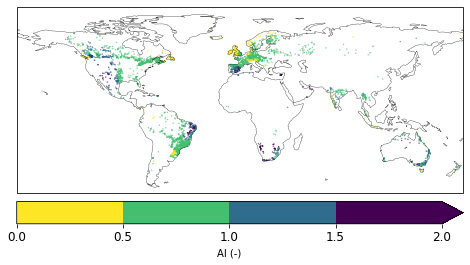

In [54]:
# combine Sr output in dataframe
sr_df_ni = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_points.csv', index_col=0)
sr_df_f09ia = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/f0.9ia/sr_irri_f0.9ia_combined_points.csv', index_col=0)
sr_df_fiwu2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/fiwu2/sr_irri_fiwu2_combined_points.csv', index_col=0)

sr_df = pd.DataFrame(index=sr_df_ni.index)
sr_df['sr_2_f0'] = sr_df_ni['k3']
sr_df['sr_2_fiwu'] = sr_df_fiwu2['k3']
sr_df['sr_2_fopt'] = sr_df_f09ia['k3']

sr_df = sr_df.astype(int) #int values
sr_df = sr_df.dropna()

# dataframes with errors
f0_iwu_e = np.round(sr_df.sr_2_fiwu-sr_df.sr_2_f0,3)
f0_opt_e = np.round(sr_df.sr_2_fopt-sr_df.sr_2_f0,3)

f0_iwu_er = np.round((sr_df.sr_2_fiwu-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)
f0_opt_er = np.round((sr_df.sr_2_fopt-sr_df.sr_2_f0)/sr_df.sr_2_f0 ,4)

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt'])
e_df['f0_fiwu'] = f0_iwu_e
e_df['f0_fopt'] = f0_opt_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f0_fopt'])
er_df['f0_fiwu'] = f0_iwu_er
er_df['f0_fopt'] = f0_opt_er

# drop pos catchments
ix_drop = ['us_0006081','br_0000699','za_0000167','us_0005876','us_0004753','ca_0000774'] natchments with sr increasing with irri compared to no-irri
sr_df = sr_df.drop(index=ix_drop)
e_df = e_df.drop(index=ix_drop)
er_df = er_df.drop(index=ix_drop)

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi

# e_df = e_df[ir>0.01]
# er_df = er_df[ir>0.01]

bounds = [0,0.5,1,1.5,2]
bounds2 =[0,0.5,1,1.5,2]
norm = mpl.colors.BoundaryNorm(bounds, cmap_vd2.N)

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
ai = cc.ai
cc = cc.loc[e_df.index]

# no irrigation
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(cc.lon,cc.lat,c=(cc['ai']),s=0.1,cmap=cmap_vd2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='AI (-)',spacing='proportional',extend='max', pad=0.02, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
# ax.set_title('AI (-)',size=14)
fig.savefig(f'{fig_dir}/ai_map2.jpg',bbox_inches='tight',dpi=300)

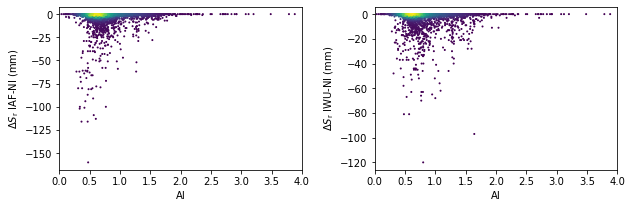

In [58]:
e_df = e_df.dropna()

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
e_df['ai'] = cc.ai

e_df = e_df.dropna()
x = e_df['ai']
y = e_df['f0_fopt']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(10,3))
plt.subplots_adjust(wspace=0.3)
ax = fig.add_subplot(121)
ax.scatter(x,y,c=z,s=1)
ax.set_ylabel('$\Delta$$S_\mathrm{r}$ IAF-NI (mm)')
ax.set_xlabel('AI')
ax.set_xlim(0,4)

e_df = e_df.dropna()

cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
e_df['ai'] = cc.ai

e_df = e_df.dropna()
x = e_df['ai']
y = e_df['f0_fiwu']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

ax = fig.add_subplot(122)
ax.scatter(x,y,c=z,s=1)
ax.set_ylabel('$\Delta$$S_\mathrm{r}$ IWU-NI (mm)')
ax.set_xlabel('AI')
ax.set_xlim(0,4)

fig.savefig(f'{fig_dir}/dsr_vs_ai.jpg', dpi=300, bbox_inches='tight')

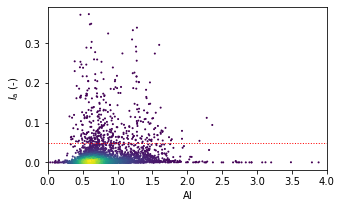

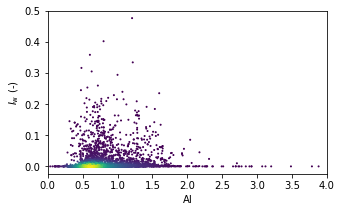

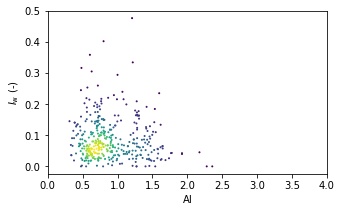

In [70]:
cc = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
cc.ai = 1/cc.ai
e_df['ai'] = cc.ai

ir2 = pd.read_csv(f'{work_dir}/data/irrigated_area/output/combined_ia.csv',index_col=0) 
ir = ir2.hi
e_df['ir'] = ir2.hi

iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments2.csv',index_col=0) # read iwu data
e_df['iwu'] = iwu['iwu_mean_mmday']

e_df = e_df.dropna()
x = e_df['ai']
y = e_df['ir']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
ax.scatter(x,y,c=z,s=1)
ax.hlines(0.05,0,4,color='r',linestyle=':',linewidth=1)
ax.set_ylabel('$I_\mathrm{a}$ (-)')
ax.set_xlabel('AI')
ax.set_xlim(0,4)
fig.savefig(f'{fig_dir}/ia_vs_ai.jpg', dpi=300, bbox_inches='tight')

x = e_df['ai']
y = e_df['iwu']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
ax.scatter(x,y,c=z,s=1)
# ax.hlines(0.05,0,4,color='r',linestyle=':',linewidth=1)
ax.set_ylabel('$I_\mathrm{w}$ (-)')
ax.set_xlabel('AI')
ax.set_xlim(0,4)
fig.savefig(f'{fig_dir}/iw_vs_ai.jpg', dpi=300, bbox_inches='tight')




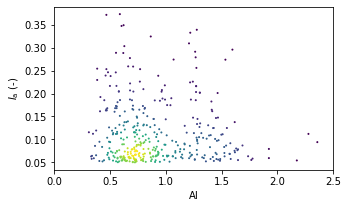

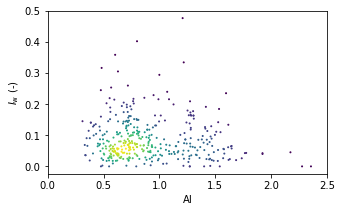

In [73]:
x = e_df.ai[e_df.ir>0.05]
y = e_df.ir[e_df.ir>0.05]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
ax.scatter(x,y,c=z,s=1)
ax.set_ylabel('$I_\mathrm{a}$ (-)')
ax.set_xlabel('AI')
ax.set_xlim(0,2.5)
fig.savefig(f'{fig_dir}/ia2_vs_ai.jpg', dpi=300, bbox_inches='tight')


x = e_df.ai[e_df.ir>0.05]
y = e_df.iwu[e_df.ir>0.05]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
ax.scatter(x,y,c=z,s=1)
# ax.hlines(0.05,0,4,color='r',linestyle=':',linewidth=1)
ax.set_ylabel('$I_\mathrm{w}$ (-)')
ax.set_xlabel('AI')
ax.set_xlim(0,2.5)
fig.savefig(f'{fig_dir}/iw2_vs_ai.jpg', dpi=300, bbox_inches='tight')

### DRALLE DATA

In [189]:
a = xr.open_dataset(f'{work_dir}/data/dralle_data/S_R_withSnow_2003_2017_0.05_selbox_time_band1.nc') # dir of netcdf forcing files
b = xr.open_dataset(f'{work_dir}/data/dralle_data/S_R_withSnow_2003_2017_0.05_selbox_time_band2.nc') # dir of netcdf forcing files
c = xr.open_dataset(f'{work_dir}/data/dralle_data/S_R_withSnow_2003_2017_0.05_selbox_time_band3.nc') # dir of netcdf forcing files
a = a.Band1.mean(dim='time')
b = b.Band2.mean(dim='time')
c = c.Band3.mean(dim='time')

snow_cover=[10,20,30,40,50,60,70,80]
d = []
for i in snow_cover:
    a = a.where(c>i)
    b = b.where(c>i)
    dd = (a-b).mean().values
    d.append(dd)
d

[array(5.54388126),
 array(6.33923507),
 array(8.29063673),
 array(11.11411891),
 array(12.37531524),
 array(15.65086036),
 array(26.47185067),
 array(27.59091068)]

In [190]:
a = xr.open_dataset(f'{work_dir}/data/dralle_data/S_R_withSnow_2003_2017_0.05_selbox_time_band1.nc') # dir of netcdf forcing files
b = xr.open_dataset(f'{work_dir}/data/dralle_data/S_R_withSnow_2003_2017_0.05_selbox_time_band2.nc') # dir of netcdf forcing files
c = xr.open_dataset(f'{work_dir}/data/dralle_data/S_R_withSnow_2003_2017_0.05_selbox_time_band3.nc') # dir of netcdf forcing files
a = a.Band1.mean(dim='time')
b = b.Band2.mean(dim='time')
c = c.Band3.mean(dim='time')

snow_cover=[10,20,30,40,50,60,70,80]
d = []
for i in snow_cover:
    a = a.where(c>i)
    b = b.where(c>i)
    dd = (a-b).median().values
    d.append(dd)
d

[array(0.76871023),
 array(1.16239242),
 array(2.49647031),
 array(5.06529569),
 array(6.69473656),
 array(9.60645215),
 array(18.54216947),
 array(26.37773877)]

In [191]:
a = xr.open_dataset(f'{work_dir}/data/dralle_data/S_R_withSnow_2003_2017_0.05_selbox_time_band1.nc') # dir of netcdf forcing files
b = xr.open_dataset(f'{work_dir}/data/dralle_data/S_R_withSnow_2003_2017_0.05_selbox_time_band2.nc') # dir of netcdf forcing files
c = xr.open_dataset(f'{work_dir}/data/dralle_data/S_R_withSnow_2003_2017_0.05_selbox_time_band3.nc') # dir of netcdf forcing files
a = a.Band1.mean(dim='time')
b = b.Band2.mean(dim='time')
c = c.Band3.mean(dim='time')

snow_cover=[10,20,30,40,50,60,70,80]
d = []
for i in snow_cover:
    a = a.where(c>i)
    b = b.where(c>i)
    dd = ((a-b)/a).mean().values
    d.append(dd)

d

[array(0.0216386),
 array(0.02518386),
 array(0.03383529),
 array(0.0472923),
 array(0.05797447),
 array(0.0822468),
 array(0.15934427),
 array(0.1730399)]

In [192]:
a = xr.open_dataset(f'{work_dir}/data/dralle_data/S_R_withSnow_2003_2017_0.05_selbox_time_band1.nc') # dir of netcdf forcing files
b = xr.open_dataset(f'{work_dir}/data/dralle_data/S_R_withSnow_2003_2017_0.05_selbox_time_band2.nc') # dir of netcdf forcing files
c = xr.open_dataset(f'{work_dir}/data/dralle_data/S_R_withSnow_2003_2017_0.05_selbox_time_band3.nc') # dir of netcdf forcing files
a = a.Band1.mean(dim='time')
b = b.Band2.mean(dim='time')
c = c.Band3.mean(dim='time')

snow_cover=[10,20,30,40,50,60,70,80]
d = []
for i in snow_cover:
    a = a.where(c>i)
    b = b.where(c>i)
    dd = ((a-b)/a).median().values
    d.append(dd)
d

[array(0.00395704),
 array(0.00568647),
 array(0.01192983),
 array(0.02391791),
 array(0.03253432),
 array(0.05115898),
 array(0.12621169),
 array(0.17605904)]